### This notebook attempts to create a score prediction model for IPL tournament. The files have been sourced from the website - https://www.iplt20.com/ (sample refeence - https://www.iplt20.com/match/2019/01)

#### Motivation 
The IPL - Indian Premerier League is a major cricket tournament held once every year during the summer time (April - June) in India. There are in total 9-10 teams participating in this tournament. The matches played are of 20 overs each. Each team play against each other twice as a part of round robin stage. Post the round robin stage top 4 teams qualify for the semi-finals follwed by the finals between the winners of the semi final stage. The total number of matches played in the tournament are in the range 60 -70 (depending on number of teams participating). The T20 games are pretty exciting and given the nature of the IPL torunament, almost all the games go down the wire and thus these matches are never short of providing thrills to the public. Post end of 5 overs of every innings, projected score is calculated which is product of 20*Net Run Rate. Given the volatile nature of the game, it seldom happens that a team would arrive at the projected score at the end of 20 overs. This tournament began in 2008. There is a data of last 11 years (approx 750 matches).For each and every innings of the matches played, the innings score at the end of 5 overs and at the end of the 20 overs is available. Taking this data, an attempt has been made to create and train a ML model to predict the innings score at the end of 20 overs for a given innings score at the end of 5 overs.       

#### Scrape the iplt20 website and create iplt20 json files

In [1]:
import requests
import json
import glob
import pandas as pd
import numpy as np

#### SampleURL - https://www.iplt20.com/match/2019/01
#### Requested URL - https://cricketapi.platform.iplt20.com//fixtures/11137/scoring

#### The below piece of code will create the json files, will run the sequence from 1 to 15000. Just to mention, this site consists of 20 over matches played across the world - example Champions League, Big Bash League, T-20 worldcup etc. Our focus is only the IPL Tournament.

In [6]:
for i in range(1,15000):
    rcheck=requests.get(url='https://cricketapi.platform.iplt20.com//fixtures/'+str(i)+'/scoring')
    try:
        dcheck=rcheck.json()
        #dcheck['matchInfo']['additionalInfo']['photostream.link']
        fname=dcheck['matchId']['name']
        if('ipl' in fname):
            print(fname)
            f=open('D:\\Learning\\Matches_IPL\\iplt20_Files\\Download_Files\\'+fname+'.json','w')
            f.write(json.dumps(dcheck))
            f.close()
    except:
        print('No Url')
    

No Url


#### Exploring one Json File

In [8]:
file='D:\\Learning\\Matches_IPL\\iplt20_Files\\Ipl_Matches\\ipl2008-01.json'
dcheck=json.load(open(file))
dcheck.keys()

dict_keys(['matchId', 'innings', 'currentState', 'matchInfo'])

In [9]:
dcheck

{'currentState': {'currentBatsmen': [77, -1],
  'currentBowler': 88,
  'currentBowlerCurrentSpell': {'d': 1,
   'e': '6.00',
   'maid': 0,
   'nb': 0,
   'ov': '0.1',
   'playerId': 88,
   'r': 1,
   'w': 1,
   'wd': 1},
  'currentInningsIndex': 1,
  'currentPartnership': 12,
  'facingBatsman': -1,
  'inProgress': False,
  'nonFacingBatsman': 77,
  'partnership': {'balls': 12, 'runRate': '6.00', 'runs': 12},
  'phase': 'C',
  'previousBowler': 38,
  'previousBowlerCurrentSpell': {'d': 4,
   'e': '3.00',
   'maid': 0,
   'nb': 0,
   'ov': '1',
   'playerId': 38,
   'r': 3,
   'w': 0,
   'wd': 1},
  'recentOvers': [{'ovBalls': ['.', '.', '.', '1', '4', '.'], 'ovNo': 11},
   {'ovBalls': ['1W', '.', '.', '1', '.', '1'], 'ovNo': 12},
   {'ovBalls': ['6', '2Wd', '1', '1', '.', '.', '1'], 'ovNo': 13},
   {'ovBalls': ['W', '1', '.', '.', '.', '6'], 'ovNo': 14},
   {'ovBalls': ['1Wd', '.', '.', '1', '1Lb', '1', '.'], 'ovNo': 15},
   {'ovBalls': ['1Wd', 'W'], 'ovNo': 16}]},
 'innings': [{'declar

In [13]:
dcheck['innings'][0]['overHistory'][0:21]

[{'ovBalls': ['1Lb', '.', '1Wd', '.', '.', '.', '1Lb'], 'ovNo': 1},
 {'ovBalls': ['.', '4', '4', '6', '4', '.'], 'ovNo': 2},
 {'ovBalls': ['.', '.', '1Lb', '4', '1', '.'], 'ovNo': 3},
 {'ovBalls': ['5Wd', '6', '1Lb', '4', '.', '1', '6'], 'ovNo': 4},
 {'ovBalls': ['4', '1', '4', '.', '1', '.'], 'ovNo': 5},
 {'ovBalls': ['1', 'W', '.', '.', '.', '.'], 'ovNo': 6},
 {'ovBalls': ['1', '1', '1', '2', '1', '1'], 'ovNo': 7},
 {'ovBalls': ['.', '1', '1', '1', '1', '1'], 'ovNo': 8},
 {'ovBalls': ['.', '.', '.', '1', '1', '2'], 'ovNo': 9},
 {'ovBalls': ['1', '1', '1', '.', '6', '1'], 'ovNo': 10},
 {'ovBalls': ['1', '4', '.', '6', '.', '4B'], 'ovNo': 11},
 {'ovBalls': ['.', '6', '2', '1', '.', '1'], 'ovNo': 12},
 {'ovBalls': ['W', '4', '.', '2', '1Wd', '4', '1'], 'ovNo': 13},
 {'ovBalls': ['1', '.', '1', '1', '1', '2'], 'ovNo': 14},
 {'ovBalls': ['4', '1', '6', '4', '2Wd', '1', '6'], 'ovNo': 15},
 {'ovBalls': ['.', '1', '2', '.', '1', '.'], 'ovNo': 16},
 {'ovBalls': ['1', '2', '1', '6', '2', '2'],

In [14]:
dcheck['innings'][1]['overHistory'][0:21]

[{'ovBalls': ['1', '1Wd', '.', '1', '1', '.', '.'], 'ovNo': 1},
 {'ovBalls': ['W', '.', '4Lb', '1', '.', '.'], 'ovNo': 2},
 {'ovBalls': ['.', 'W', '1', '.', '1Wd', '.', '1'], 'ovNo': 3},
 {'ovBalls': ['2', '1', '.', '1Lb', '.', '.'], 'ovNo': 4},
 {'ovBalls': ['1', '1', '.', '6', 'W', '.'], 'ovNo': 5},
 {'ovBalls': ['.', 'W', '.', '1', '1', '.'], 'ovNo': 6},
 {'ovBalls': ['.', '.', '1', '1Wd', '1Wd', '.', '.', '4'], 'ovNo': 7},
 {'ovBalls': ['1', '1Lb', '1', '2', 'W', '.'], 'ovNo': 8},
 {'ovBalls': ['.', 'W', '.', '1Wd', '1Wd', '1', '2', 'W'], 'ovNo': 9},
 {'ovBalls': ['1', '.', '.', '1Wd', '1Lb', '4', '1'], 'ovNo': 10},
 {'ovBalls': ['.', '.', '.', '1', '4', '.'], 'ovNo': 11},
 {'ovBalls': ['1W', '.', '.', '1', '.', '1'], 'ovNo': 12},
 {'ovBalls': ['6', '2Wd', '1', '1', '.', '.', '1'], 'ovNo': 13},
 {'ovBalls': ['W', '1', '.', '.', '.', '6'], 'ovNo': 14},
 {'ovBalls': ['1Wd', '.', '.', '1', '1Lb', '1', '.'], 'ovNo': 15},
 {'ovBalls': ['1Wd', 'W'], 'ovNo': 16}]

#### Reading the iplt20 json files and create data frame consisting of Player Name, Runs Scored, Balls Faced, Runs Conceded, Overs Bowled, Wickets Taken

In [2]:
players_dict={}
for file in glob.glob('D:\\Learning\\Matches_IPL\\iplt20_Files\\ipl_matches\\*.*'):
    #check=json.load(open('D:\\Learning\\Matches_IPL\\iplt20_Files\\ipl_matches\\ipl2012-01.json'))
    print(file)
    check=json.load(open(file))
    for player in check['matchInfo']['teams'][0]['players']:
        if(player['id'] not in players_dict):
            players_dict[player['id']]=player['fullName']
    for player in check['matchInfo']['teams'][1]['players']:
        if(player['id'] not in players_dict):
            players_dict[player['id']]=player['fullName']


D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-01.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-02.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-03.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-04.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-05.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-06.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-07.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-08.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-09.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-10.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-11.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-12.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-13.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-14.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-15.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-13.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-14.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-15.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-16.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-17.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-18.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-19.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-20.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-21.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-22.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-23.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-24.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-25.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-26.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-27.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-14.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-15.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-16.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-17.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-18.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-19.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-20.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-21.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-22.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-23.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-24.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-25.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-26.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-27.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-28.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-37.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-38.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-39.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-40.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-41.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-42.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-43.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-44.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-45.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-46.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-47.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-48.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-49.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-50.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-51.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-01.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-02.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-03.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-04.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-05.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-06.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-07.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-08.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-09.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-10.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-11.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-12.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-13.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-14.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2017-15.json
D:\Learning\Matches_IPL\i

In [3]:
players_dict

{1: 'MS Dhoni',
 2: 'Abhinav Mukund',
 5: 'Joginder Sharma',
 7: 'Murali Vijay',
 8: 'Ravichandran Ashwin',
 9: 'Ravindra Jadeja',
 10: 'Shadab Jakati',
 11: 'Srikkanth Anirudha',
 12: 'Subramaniam Badrinath',
 13: 'Sudeep Tyagi',
 14: 'Suresh Raina',
 15: 'Yo Mahesh',
 16: 'Wriddhiman Saha',
 17: 'Ben Hilfenhaus',
 18: 'Doug Bollinger',
 19: 'George Bailey',
 20: 'Michael Hussey',
 21: 'Suraj Randiv',
 22: 'Scott Styris',
 23: 'Nuwan Kulasekara',
 24: 'Faf du Plessis',
 25: 'Dwayne Bravo',
 26: 'Albie Morkel',
 27: 'Kumar Sangakkara',
 29: 'Akshath Reddy',
 30: 'Amit Mishra',
 31: 'Anand Rajan',
 32: 'Ankit Sharma',
 33: 'Arjun Yadav',
 34: 'Ashish Reddy',
 35: 'Bharat Chipli',
 36: 'Dwaraka Ravi Teja',
 37: 'Ishank Jaggi',
 38: 'Ishant Sharma',
 39: 'Kedar Devdhar',
 40: 'Manpreet Gony',
 41: 'Shikhar Dhawan',
 42: 'Sunny Sohal',
 43: 'Tanmay Srivastava',
 44: 'Parthiv Patel',
 45: 'Virender Sehwag',
 46: 'Aavishkar Salvi',
 47: 'Ajit Agarkar',
 48: 'Ashok Dinda',
 49: 'Irfan Pathan'

In [4]:
matches_played_dict={}
runs_scored_dict={}
wickets_taken_dict={}
balls_bowled_dict={}
balls_faced_dict={}
runs_conceded_dict={}
#check=json.load(open('D:\\Learning\\Matches_IPL\\iplt20_Files\\ipl_matches\\ipl2012-01.json'))
#check.keys() # dict_keys(['currentState', 'matchInfo', 'innings', 'matchId'])

for file in glob.glob('D:\\Learning\\Matches_IPL\\iplt20_Files\\ipl_matches\\*.*'):
    print(file)
    check=json.load(open(file))
    for player in check['matchInfo']['teams'][0]['players']:
        if(player['id'] not in matches_played_dict):
            matches_played_dict[player['id']]=1
            runs_scored_dict[player['id']]=0
            balls_faced_dict[player['id']]=0
            runs_conceded_dict[player['id']]=0
            wickets_taken_dict[player['id']]=0
            balls_bowled_dict[player['id']]=0
            
            
        else:
            matches_played_dict[player['id']]+=1
        
    for player in check['matchInfo']['teams'][1]['players']:
        if(player['id'] not in  matches_played_dict):
            matches_played_dict[player['id']]=1
            runs_scored_dict[player['id']]=0
            balls_faced_dict[player['id']]=0
            runs_conceded_dict[player['id']]=0
            wickets_taken_dict[player['id']]=0
            balls_bowled_dict[player['id']]=0

        else:
            matches_played_dict[player['id']]+=1
    
    try:

        for l in check['innings'][0]['scorecard']['battingStats']:
            pid=l['playerId']
            runs_scored_dict[pid]+=l['r']
            balls_faced_dict[pid]+=l['b']
        for l in check['innings'][0]['scorecard']['bowlingStats']:
            pid=l['playerId']
            runs_conceded_dict[pid]+=l['r']
            wickets_taken_dict[pid]+=l['w']
            if('.' in l['ov']):
                balls_bowled=int(l['ov'].split('.')[0])*6 + int(l['ov'].split('.')[1])
            else:
                balls_bowled=int(l['ov'].split('.')[0])*6
            balls_bowled_dict[pid]+=balls_bowled

        for l in check['innings'][1]['scorecard']['battingStats']:
            pid=l['playerId']
            runs_scored_dict[pid]+=l['r']
            balls_faced_dict[pid]+=l['b']
        for l in check['innings'][1]['scorecard']['bowlingStats']:
            pid=l['playerId']
            runs_conceded_dict[pid]+=l['r']
            wickets_taken_dict[pid]+=l['w']
            if('.' in l['ov']):
                balls_bowled=int(l['ov'].split('.')[0])*6 + int(l['ov'].split('.')[1])
            else:
                balls_bowled=int(l['ov'].split('.')[0])*6
            balls_bowled_dict[pid]+=balls_bowled
    except :
        print('Incomplete Match')

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-01.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-02.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-03.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-04.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-05.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-06.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-07.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-08.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-09.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-10.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-11.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-12.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-13.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-14.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2008-15.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-20.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-21.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-22.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-23.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-24.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-25.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-26.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-27.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-28.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-29.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-30.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-31.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-32.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-33.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2010-34.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-17.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-18.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-19.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-20.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-21.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-22.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-23.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-24.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-25.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-26.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-27.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-28.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-29.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-30.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2012-31.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2013-71.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2013-72.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2013-73.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2013-74.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2013-75.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2013-76.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-01.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-02.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-03.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-04.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-05.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-06.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-07.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-08.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2014-09.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-14.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-15.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-16.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-17.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-18.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-19.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-20.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-21.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-22.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-23.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-24.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-25.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-26.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-27.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2016-28.json
D:\Learning\Matches_IPL\i

D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-30.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-31.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-32.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-33.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-34.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-35.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-36.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-37.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-38.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-39.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-40.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-41.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-42.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-43.json
D:\Learning\Matches_IPL\iplt20_Files\ipl_matches\ipl2018-44.json
D:\Learning\Matches_IPL\i

In [5]:
#matches_played_dict
#runs_scored_dict
#wickets_taken_dict
#balls_bowled_dict
#balls_faced_dict
#runs_conceded_dict
def convert_dict_to_df(dict1,col ):
    dict2list=[]
    #for i in runs_conceded_dict.keys():
    for i in dict1.keys():
        dict2={}
        dict2['Player_Id']=i
        #dict1['Runs_Conceded']=runs_conceded_dict[i]
        dict2[col]=dict1[i]
        #runs_conceded_dict_list.append(dict1)
        dict2list.append(dict2)
        dict2listdf=pd.DataFrame(dict2list, columns=['Player_Id', col])
    return(dict2listdf)

    
    


In [7]:
import pandas as pd
runs_conceded_dict_list_df=convert_dict_to_df(runs_conceded_dict, 'Runs_Conceded')
balls_faced_dict_list_df=convert_dict_to_df(balls_faced_dict, 'Balls_Faced')
balls_bowled_dict_list_df=convert_dict_to_df(balls_bowled_dict, 'Balls_Bowled')
wickets_taken_dict_list_df=convert_dict_to_df(wickets_taken_dict, 'Wickets_Taken')
runs_scored_dict_list_df=convert_dict_to_df(runs_scored_dict, 'Runs_Scored')
matches_played_dict_list_df=convert_dict_to_df(matches_played_dict, 'Matches_Played')
players_dict_list_df=convert_dict_to_df(players_dict, 'Player_Name')

In [8]:
import pandas as pd
from functools import reduce
#runs_conceded_dict_df=pd.DataFrame(runs_conceded_dict_list, columns=['Player_Id', 'Runs_Conceded'])
#runs_conceded_dict_df
#merge_df=pd.merge()
dfs = [players_dict_list_df, matches_played_dict_list_df, runs_scored_dict_list_df, wickets_taken_dict_list_df,balls_bowled_dict_list_df,balls_faced_dict_list_df,runs_conceded_dict_list_df]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Player_Id'), dfs)

In [9]:
df_final

,Player_Id,Player_Name,Matches_Played,Runs_Scored,Wickets_Taken,Balls_Bowled,Balls_Faced,Runs_Conceded
0,1,MS Dhoni,190,4432,0,0,3215,0
1,2,Abhinav Mukund,3,19,0,0,22,0
2,5,Joginder Sharma,16,36,12,256,30,419
3,7,Murali Vijay,103,2587,0,36,2106,49
4,8,Ravichandran Ashwin,139,375,125,2924,339,3310
5,9,Ravindra Jadeja,170,1927,108,2495,1572,3152
6,10,Shadab Jakati,59,28,47,1085,29,1450
7,11,Srikkanth Anirudha,20,136,0,0,113,0
8,12,Subramaniam Badrinath,95,1441,0,0,1212,0
9,13,Sudeep Tyagi,14,3,6,209,4,295


### Preparing Training Data

#### The following columns are extracted from the json files for each innings
'Batting_Team', 'First_Innings', 'Match_City', 'Match_Number','Match_Teams', 'Match_Year', 'Toss_Won', 'Total_Runs', 'Total_Wickets','5_Over_Runs', '5_Over_Wickets'
#### For each overs from 1 to 5 , captured run scored on each delivery. 
'Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets','Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6','Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3','Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets','Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6','Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3', 'Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets'.

#### Referring Paper - Cricket Matches Prediction Paper, presented in European Conference on Machine Learning and Principles and Practice of Knowledge Discovery in Databases, presented by Madan Gopal Jhawar, Vikram Pudi created two variables.
'Batting_Team_Score', 'Bowling_Team_Score'


In [2]:
i=1
dictfile={}
for file in glob.glob('D:\\Learning\\Matches_IPL\\iplt20_Files\\Ipl_Matches\\*.*'):
    dictfile[file]=i
    i+=1

In [3]:
def fow(d1,i):
    wicket_ids=[]
    for w in d1['innings'][i]['scorecard']['fow']:
        if (w['bp']['over']<6):
            wicket_ids.append(w['playerId'])
    return(wicket_ids)
#fow(data,0)

In [4]:
def calc_batting_bowling_score(fcounter, batids, bowlids):
    bowling_score_list=[]
    for p in bowlids:
        wickets_taken_list=[]
        runs_conceded_list=[]
        economy_rate_list=[]
        num_matches=0
        num_matches_bowled=0
        num_3_wickets=0
        bowling_score=0
        #num_70=0
        for file in glob.glob('D:\\Learning\\Matches_IPL\\iplt20_Files\\Ipl_Matches\\*.*')[:fcounter-1]:
            try:
                player_ids=[]
                data=json.load(open(file))
                for q in [0,1]:
                    for i in data['matchInfo']['teams'][q]['players']:
                        player_ids.append(i['id'])
                if(p in player_ids):
                    num_matches=num_matches+1
                    for q in [0,1]:               
                        for i in  data['innings'][q]['scorecard']['bowlingStats']:
                            if(i['playerId']==p):
                                wickets_taken_list.append(i['w'])
                                runs_conceded_list.append(i['r'])
                                economy_rate_list.append(float(i['e']))
                                num_matches_bowled+=1
            except:
                print('Match-Incomplete')
        if(num_matches!=0):
            u=np.round(np.sqrt(num_matches_bowled/num_matches),2)
        else:
            u=0
        #40, #70
        if(sum(wickets_taken_list)!=0):
            bowling_avg=np.round((sum(runs_conceded_list)/sum(wickets_taken_list)),2)
        else:
            bowling_avg=sum(runs_conceded_list)
        if(len(economy_rate_list)>0):
            eco_avg=np.round((sum(economy_rate_list)/len(economy_rate_list)),2)
        else:
            eco_avg=0
        for i in wickets_taken_list:
            if(i>2):
                num_3_wickets=num_3_wickets+1

        v=10*num_3_wickets + sum(wickets_taken_list)
        w=bowling_avg*eco_avg
        if(w!=0):
            bowling_score_list.append(np.round(u*v/w,2))
        else:
            bowling_score_list.append(0)
    bws=sum(bowling_score_list)

    cslist=[]
    rslist=[]
    bts=0
    for p in batids:
        playerscore=[]
        num_matches=0
        num_matches_batted=0
        num_40=0
        num_70=0
        for file in glob.glob('D:\\Learning\\Matches_IPL\\iplt20_Files\\Ipl_Matches\\*.*')[:fcounter-1]:
            try:
                player_ids=[]
                data=json.load(open(file))
                for q in [0,1]:
                    for i in data['matchInfo']['teams'][q]['players']:
                        player_ids.append(i['id'])
                if(p in player_ids):
                    num_matches=num_matches+1
                    for q in [0,1]:               
                        for i in  data['innings'][q]['scorecard']['battingStats']:
                            if(i['playerId']==p):
                                playerscore.append(i['r'])
                                num_matches_batted+=1
            except:
                print('Match-Incomplete')
        if(num_matches!=0):
            u=np.round(np.sqrt(num_matches_batted/num_matches),2)
        else:
            u=0
        #40, #70
        if(len(playerscore)>0):
            avg_score=np.round((sum(playerscore)/len(playerscore)),2)
            rs=np.round((sum(playerscore[-4:])/len(playerscore[-4:])),2)
        else:
            avg_score=0
            rs=0
        for i in playerscore:
            #if(i>69):
            if(i>99):
                num_70=num_70+1
            #if(i>39):
            if(i>49 and i<99):
                num_40=num_40+1
        v=20*num_70 + 5*num_40
        w=0.3*v + 0.7 * avg_score
        cs=np.round(u*v,2)
        #rs=np.round((sum(playerscore[-4:])/len(playerscore[-4:])),2)
        #print(str(p)+ '-'+str(playerscore)+'-'+str(sum(playerscore)/len())+'-'+str(num_matches)+'-'+str(num_matches_batted))
        #print(str(p)+'-'+str(u)+'-'+str(v)+'-'+str(cs)+'-'+str(rs))
        cslist.append(cs)
        rslist.append(rs)

    #playerscore
    #print(cslist)
    #print(rslist)
    if(len(cslist) > 0 and len(rslist) > 0):
        csmax=max(cslist)
        rsmax=max(rslist)
        for i in range(len(cslist)):
            bts=bts+np.round((0.35*(cslist[i]/csmax) + 0.65*(rslist[i]/rsmax)),2)
    else:
        bts=0
    return(bts,bws)
    

In [5]:
import numpy as np
import pandas as pd
#runs=0
#wickets=0
over_dict_list=[]
for file in glob.glob('D:\\Learning\\Matches_IPL\\iplt20_Files\\Model_Train_Files\\*.*'):
    #filecounter=dictfile['D:\\Learning\\Matches_IPL\\iplt20_Files\\Ipl_Matches\\ipl2018-21.json']
    try:
        filecounter=dictfile['D:\\Learning\\Matches_IPL\\iplt20_Files\\Ipl_Matches\\'+file.split('\\')[-1]]
        print(file)
        data=json.load(open(file))


        match_num=int(data['matchId']['name'].split('-')[1])
        match_year=int(data['matchId']['name'].split('-')[0].replace('ipl',''))
        match_team=data['matchInfo']['teams'][0]['team']['fullName'] + '-' + data['matchInfo']['teams'][1]['team']['fullName']
        match_city=data['matchInfo']['venue']['city']
        innings=1
        toss_text=data['matchInfo']['additionalInfo']['toss.elected']
        b=0

        for q in data['matchInfo']['battingOrder']:
            #print(q)
            wicket_fallen_ids = fow(data,q)
            #print(wicket_fallen_ids)
            batting_player_ids=[]
            bowling_player_ids=[]
            runs=0
            wickets=0
            over_dict={}
            over_dict['Batting_Team']=data['matchInfo']['teams'][q]['team']['fullName']
            for i in data['matchInfo']['teams'][q]['players']:
                #batting_player_ids.append(i['id'])
                if(len(wicket_fallen_ids)>0 and i['id'] not in wicket_fallen_ids):
                    batting_player_ids.append(i['id'])
                if(len(wicket_fallen_ids)==0):
                    batting_player_ids.append(i['id'])
            if(q==1):
                for i in data['matchInfo']['teams'][0]['players']:
                    bowling_player_ids.append(i['id'])
            if(q==0):
                for i in data['matchInfo']['teams'][1]['players']:
                    bowling_player_ids.append(i['id'])

            #print(batting_player_ids)
            #print(bowling_player_ids)
            over_dict['Batting_Team_Score'],over_dict['Bowling_Team_Score']=calc_batting_bowling_score(filecounter, batting_player_ids, bowling_player_ids)
            if(innings==1 and 'bat' in toss_text):
                over_dict['Toss_Won']=1
            elif(innings==1 and 'field' in toss_text):
                over_dict['Toss_Won']=0
            elif(innings==0 and 'field' in toss_text):
                over_dict['Toss_Won']=1
            elif(innings==0 and 'bat' in toss_text):
                over_dict['Toss_Won']=0
            else:
                over_dict['Toss_Won']='No Info'
    
            for ovr in data['innings'][b]['overHistory'][0:20]:
                over_val=str(ovr['ovNo'])
                ballnum=0
                if( ovr['ovNo']<6):
                #over_dict['Over_'+over_val+'_wickets']=0
                    wickets_in_over=0
                    over_dict['Over_'+over_val+'_wickets']=0
                    over_dict['Over_'+over_val+'_extras']=0
                for ball in ovr['ovBalls']:
                    ballnum=ballnum+1
                    if(ball=='.' or ball=='W'):
                        run=0
                    else:
                        run=int(ball[0])
                    if(ball=='W'):
                        wickets=wickets+1
                        wickets_in_over+=1
                    #over_dict['Over_'+over_val+'_wickets']+=1
                    runs+=run
                    if(ballnum<7 and ovr['ovNo']<6 ):
                        over_dict['Over_'+over_val+'_'+str(ballnum)]=run
                    if(ballnum>6 and ovr['ovNo']<6 ):
                        over_dict['Over_'+over_val+'_extras']+=run
        

                if(ovr['ovNo']<6):    
                    runs_5over=runs
                    wickets_5=wickets
                    over_dict['Over_'+over_val+'_wickets']+=wickets_in_over

            
       
    #if(ovr['ovNo']<6):
        
        
        #if(ballnum<7):
        #    over_dict['Over_'+over_val+'_'+str(ballnum)]=run
    
            over_dict['Total_Runs']=runs
            over_dict['Total_Wickets']=wickets
            over_dict['5_Over_Runs']=runs_5over
            over_dict['5_Over_Wickets']=wickets_5
            over_dict['Match_Number']=match_num
            over_dict['Match_Year']=match_year
            over_dict['Match_Teams']=match_team
            over_dict['First_Innings']=innings
            over_dict['Match_City']=match_city
            over_dict_list.append(over_dict)
            innings=innings-1
            b=b+1
    except Exception as e:
        print(e)

#print(runs)
#print(wickets)
#print(runs_5over)
#print(wickets_5)
#over_dict

D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-01.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-02.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-03.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-04.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-05.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-06.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-07.json
list index out of range
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-08.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-09.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-10.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-11.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-12.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2009-13.json
list index out of range
D:\Learning\Matches_IPL\iplt2

D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2010-57.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2010-58.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2010-59.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2010-60.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-01.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-02.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-03.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-04.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-05.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-06.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-07.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-08.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-09.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2011-10.json
D:\Lea

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-20.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-21.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-22.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-23.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-24.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-25.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Trai

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-58.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-59.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-60.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-61.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2012-62.json

D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-15.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-16.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-17.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-18.json
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-19.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-51.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-52.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-53.json
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-54.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2013-55.json

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-13.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-14.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-15.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-16.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-47.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-48.json
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2014-49.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match

Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-21.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-22.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-23.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-24.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-25.json
'toss.elected'
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-26.jso

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-47.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2015-48.json
Match-In

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-06.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-07.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-08.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-30.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-31.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-In

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-53.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-54.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2016-55.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\i

Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-19.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-20.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-21.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match

Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-48.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-49.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-50.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-51.json
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2017-52.json
Match-Incomplete
Match-Incomplete

Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2018-19.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2018-20.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2018-21.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\i

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2018-49.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2018-50.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2018-51.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-16.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-17.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-18.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match

Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-46.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-47.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-48.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in double_scalars


Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-50.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-51.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-52.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
Match-Incomplete
D:\Learning\Matches_IPL\iplt20_Files\Model_Train_Files\ipl2019-53.json
Match-Incomplete
Match-Incomplete
Match-Incomplete
Ma

In [6]:
over_dict_df=pd.DataFrame(data=over_dict_list)
over_dict_df

,5_Over_Runs,5_Over_Wickets,Batting_Team,Batting_Team_Score,Bowling_Team_Score,First_Innings,Match_City,Match_Number,Match_Teams,Match_Year,...,Over_5_2,Over_5_3,Over_5_4,Over_5_5,Over_5_6,Over_5_extras,Over_5_wickets,Toss_Won,Total_Runs,Total_Wickets
0,35,0,Mumbai Indians,3.07,0.20,1,Cape Town,1,Chennai Super Kings-Mumbai Indians,2009,...,0.0,4.0,1.0,0.0,2.0,0.0,0.0,0,165,7
1,33,2,Chennai Super Kings,3.83,0.38,0,Cape Town,1,Chennai Super Kings-Mumbai Indians,2009,...,0.0,4.0,0.0,1.0,6.0,3.0,0.0,1,146,7
2,17,3,Royal Challengers Bangalore,1.90,0.42,1,Cape Town,2,Royal Challengers Bangalore-Rajasthan Royals,2009,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,133,8
3,13,2,Rajasthan Royals,2.13,0.28,0,Cape Town,2,Royal Challengers Bangalore-Rajasthan Royals,2009,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0,58,10
4,52,0,Kings XI Punjab,2.38,0.23,1,Cape Town,3,Delhi Capitals-Kings XI Punjab,2009,...,6.0,2.0,1.0,1.0,0.0,0.0,0.0,0,104,7
5,58,0,Delhi Capitals,3.18,0.38,0,Cape Town,3,Delhi Capitals-Kings XI Punjab,2009,...,2.0,1.0,1.0,1.0,6.0,0.0,0.0,1,58,0
6,15,2,Kolkata Knight Riders,2.35,0.20,1,Cape Town,4,Deccan Chargers-Kolkata Knight Riders,2009,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,101,10
7,35,2,Deccan Chargers,4.04,0.32,0,Cape Town,4,Deccan Chargers-Kolkata Knight Riders,2009,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0,104,2
8,56,0,Chennai Super Kings,4.09,0.44,1,Port Elizabeth,5,Royal Challengers Bangalore-Chennai Super Kings,2009,...,4.0,4.0,1.0,1.0,6.0,0.0,0.0,1,179,5
9,40,1,Royal Challengers Bangalore,3.38,0.44,0,Port Elizabeth,5,Royal Challengers Bangalore-Chennai Super Kings,2009,...,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0,87,10


In [7]:
over_dict_df.to_csv('Batting_Bowling_Score_5_Over_Detail_Modified_1.csv', sep='|')
over_dict_df=pd.read_csv('Batting_Bowling_Score_5_Over_Detail_Modified_1.csv',sep='|')

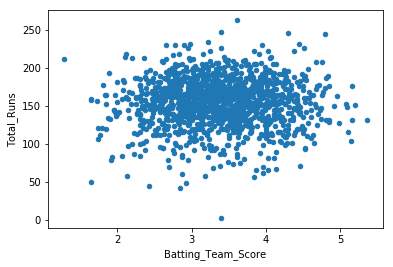

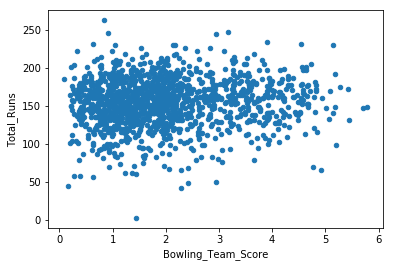

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#over_dict_df['Batting_Score']=over_dict_df['Batting_Team_Score'] * over_dict_df['Bowling_Team_Score']
over_dict_df.plot(x='Batting_Team_Score', y ='Total_Runs', kind='scatter')
over_dict_df.plot(x='Bowling_Team_Score', y ='Total_Runs', kind='scatter')

In [9]:
over_dict_df[['Batting_Team_Score', 'Total_Runs']].corr() #0.020201

,Batting_Team_Score,Total_Runs
Batting_Team_Score,1.000000,0.020626
Total_Runs,0.020626,1.000000


In [10]:
over_dict_df[['Bowling_Team_Score', 'Total_Runs']].corr() #0.076305

,Bowling_Team_Score,Total_Runs
Bowling_Team_Score,1.000000,0.076305
Total_Runs,0.076305,1.000000


### Model Training

In [13]:
over_dict_df.columns

Index(['Unnamed: 0', '5_Over_Runs', '5_Over_Wickets', 'Batting_Team',
       'Batting_Team_Score', 'Bowling_Team_Score', 'First_Innings',
       'Match_City', 'Match_Number', 'Match_Teams', 'Match_Year', 'Over_1_1',
       'Over_1_2', 'Over_1_3', 'Over_1_4', 'Over_1_5', 'Over_1_6',
       'Over_1_extras', 'Over_1_wickets', 'Over_2_1', 'Over_2_2', 'Over_2_3',
       'Over_2_4', 'Over_2_5', 'Over_2_6', 'Over_2_extras', 'Over_2_wickets',
       'Over_3_1', 'Over_3_2', 'Over_3_3', 'Over_3_4', 'Over_3_5', 'Over_3_6',
       'Over_3_extras', 'Over_3_wickets', 'Over_4_1', 'Over_4_2', 'Over_4_3',
       'Over_4_4', 'Over_4_5', 'Over_4_6', 'Over_4_extras', 'Over_4_wickets',
       'Over_5_1', 'Over_5_2', 'Over_5_3', 'Over_5_4', 'Over_5_5', 'Over_5_6',
       'Over_5_extras', 'Over_5_wickets', 'Toss_Won', 'Total_Runs',
       'Total_Wickets'],
      dtype='object')

In [14]:
over_dict_df['Match_Year'].value_counts()

2013    152
2012    148
2011    145
2019    120
2018    120
2016    120
2014    120
2010    120
2017    118
2015    117
2009    114
Name: Match_Year, dtype: int64

#### Matches from 2008 to 2018 are part of Training Set (632 matches, 1264 innings)
#### Matches for the year 2019 are a part of Test Set (60 matches, 120 innings)

In [15]:
#dftrain=
dftest=over_dict_df[over_dict_df['Match_Year']>2018]
dftrain=over_dict_df[over_dict_df['Match_Year']<2019]


In [16]:
drop_cols=['Match_City','Match_Teams', 'Match_Year','Total_Wickets','Batting_Team','Unnamed: 0']
dftrain1=dftrain.drop(drop_cols,axis=1)
dftrain2=dftrain1[dftrain1['Toss_Won']!='No Info']
dftrain2.dropna(inplace=True)
dftest1=dftest.drop(drop_cols,axis=1)
dftest1.dropna(inplace=True)

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
X=dftrain2.drop(['Total_Runs'], axis=1)
X_test=dftest1.drop(['Total_Runs'], axis=1)
y=dftrain2['Total_Runs']
y_test=dftest1['Total_Runs']

In [18]:
X.columns

Index(['5_Over_Runs', '5_Over_Wickets', 'Batting_Team_Score',
       'Bowling_Team_Score', 'First_Innings', 'Match_Number', 'Over_1_1',
       'Over_1_2', 'Over_1_3', 'Over_1_4', 'Over_1_5', 'Over_1_6',
       'Over_1_extras', 'Over_1_wickets', 'Over_2_1', 'Over_2_2', 'Over_2_3',
       'Over_2_4', 'Over_2_5', 'Over_2_6', 'Over_2_extras', 'Over_2_wickets',
       'Over_3_1', 'Over_3_2', 'Over_3_3', 'Over_3_4', 'Over_3_5', 'Over_3_6',
       'Over_3_extras', 'Over_3_wickets', 'Over_4_1', 'Over_4_2', 'Over_4_3',
       'Over_4_4', 'Over_4_5', 'Over_4_6', 'Over_4_extras', 'Over_4_wickets',
       'Over_5_1', 'Over_5_2', 'Over_5_3', 'Over_5_4', 'Over_5_5', 'Over_5_6',
       'Over_5_extras', 'Over_5_wickets', 'Toss_Won'],
      dtype='object')

In [19]:
import sklearn
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [20]:
params = {'num_leaves': 30,#30
         'min_data_in_leaf': 5,#10
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,#0.01
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'r2',
         "lambda_l1": 0.1,
         "verbosity": -1}

In [21]:
xg = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

lg=lgb.LGBMRegressor(**params, n_estimators = 225, nthread = 4, n_jobs = -1)

In [22]:
X['Toss_Won']=X['Toss_Won'].astype('int')
X_test['Toss_Won']=X_test['Toss_Won'].astype('int')

In [23]:

print(np.mean(cross_val_score(xg, X, y,cv=3,scoring='r2')))
print(np.mean(cross_val_score(lg, X, y,cv=3,scoring='r2')))

0.11812023529792277
0.15199552820276133


In [24]:
rn=RANSACRegressor()
rf=RandomForestRegressor()
#svr = SVR(gamma='scale', C=100, epsilon=0.2, kernel='linear')
enet=ElasticNet()
ls=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, warm_start=False)
rdg=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()

In [62]:
m4=lgb.LGBMRegressor(**params, n_estimators = 650, nthread = 4, n_jobs = -1)#225,#900,#850,650
#m4=lgb.LGBMRegressor(**params1, n_estimators = 650, nthread = 4, n_jobs = -1)#225,#900,#850
#m4=LinearRegression() #5
#m4=rn #--> 24
#m4=rf # -->34
#m4=enet # --> 40
#m4=ls # --> 39
#m4=rdg # --> 38
#m4=dt # --> 18
m4.fit(X,y)
y_predlg=m4.predict(X_test)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
#preddflr['Predicted_Score']=preddflr['Predicted_log_Score'].apply(lambda a : np.expm1(a))
#actdflr['Actual_Score']=actdflr['Actual_log_Score'].apply(lambda a : np.expm1(a))
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
len(a[a['Diff']<1])
#a['Diff'].mean()

8

In [63]:
a['Diff'].mean()

20.816358025646107

In [64]:
X.columns

Index(['5_Over_Runs', '5_Over_Wickets', 'Batting_Team_Score',
       'Bowling_Team_Score', 'First_Innings', 'Match_Number', 'Over_1_1',
       'Over_1_2', 'Over_1_3', 'Over_1_4', 'Over_1_5', 'Over_1_6',
       'Over_1_extras', 'Over_1_wickets', 'Over_2_1', 'Over_2_2', 'Over_2_3',
       'Over_2_4', 'Over_2_5', 'Over_2_6', 'Over_2_extras', 'Over_2_wickets',
       'Over_3_1', 'Over_3_2', 'Over_3_3', 'Over_3_4', 'Over_3_5', 'Over_3_6',
       'Over_3_extras', 'Over_3_wickets', 'Over_4_1', 'Over_4_2', 'Over_4_3',
       'Over_4_4', 'Over_4_5', 'Over_4_6', 'Over_4_extras', 'Over_4_wickets',
       'Over_5_1', 'Over_5_2', 'Over_5_3', 'Over_5_4', 'Over_5_5', 'Over_5_6',
       'Over_5_extras', 'Over_5_wickets', 'Toss_Won'],
      dtype='object')

#### From the test set of 120 records, for 38 records, the difference between predicted score and actual score is less than 10 runs. For 9 records, the difference is less than 1.
The below code reduces the training feature set to 5 columns ('5_Over_Runs', '5_Over_Wickets', 'First_Innings', 'Match_Number','Toss_Won')  to demonstrate usefulness of the above features

In [65]:
X_reduced=X.drop(['Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets',
       'Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6',
       'Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3',
       'Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets',
       'Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6',
       'Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3',
       'Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets','Batting_Team_Score',
       'Bowling_Team_Score'], axis=1)#,'Combined_Score'], axis=1)

X_test_reduced=X_test.drop(['Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets',
       'Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6',
       'Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3',
       'Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets',
       'Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6',
       'Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3',
       'Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets','Batting_Team_Score',
       'Bowling_Team_Score',], axis=1)#'Combined_Score'], axis=1)

In [60]:
X_reduced1=X.drop(['Batting_Team_Score','Bowling_Team_Score','Combined_Score'], axis=1)
X_test_reduced1=X_test.drop(['Batting_Team_Score','Bowling_Team_Score','Combined_Score'], axis=1)

In [66]:
X_reduced.columns

Index(['5_Over_Runs', '5_Over_Wickets', 'First_Innings', 'Match_Number',
       'Toss_Won'],
      dtype='object')

In [67]:
m4=lgb.LGBMRegressor(**params, n_estimators = 650, nthread = 4, n_jobs = -1)#225
#m4=LinearRegression()
#m4=rn #--> 24
#m4=rf # -->34
#m4=enet # --> 40
#m4=ls # --> 39
#m4=rdg # --> 38
#m4=dt # --> 18
m4.fit(X_reduced,y)
y_predlg=m4.predict(X_test_reduced)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
#preddflr['Predicted_Score']=preddflr['Predicted_log_Score'].apply(lambda a : np.expm1(a))
#actdflr['Actual_Score']=actdflr['Actual_log_Score'].apply(lambda a : np.expm1(a))
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
len(a[a['Diff']<1])
#a#a['Diff'].mean()

6

In [68]:
a['Diff'].mean()

21.93976674254479

#### Note ,if the columns are dropped and only a reduced set of columns considered - '5_Over_Runs', '5_Over_Wickets', 'First_Innings', 'Match_Number','Toss_Won  - 6 number of records have devaition less than 1. 
With the total feature set, the number of predictions with deviation less than 1 increases to 9 (50% increase).
The root mean squared deviation falls to 20.69 from 22.15 (7% decrease)

In [69]:
m4

LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       lambda_l1=0.1, learning_rate=0.01, max_depth=5, metric='r2',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=5,
       min_split_gain=0.0, n_estimators=650, n_jobs=-1, nthread=4,
       num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [70]:
from itertools import combinations
colslist1=list(X.columns)
valid_comblist1=[]
#for i in range (3):
#    print(i)
valid_comb1 = combinations(colslist1, 3)
for j in valid_comb1: 
    valid_comblist1.append(list(j))
    
len(valid_comblist1) 

16215

In [71]:
baseline=10
interactions=[]

In [72]:
#X.columns
i=1
for subset in valid_comblist1:
    subsetdftrain=X[subset]
    subsetdftest=X_test[subset]
    subsetdftrain['interaction']=subsetdftrain.product(axis=1)
    subsetdftest['interaction']=subsetdftest.product(axis=1)
    X['interaction']= subsetdftrain['interaction']
    X_test['interaction']= subsetdftest['interaction']
    m4.fit(X,y)
    y_predlg=m4.predict(X_test)
    preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
    actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
    #preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
    #actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
    preactdflg=preddflg.join(actdflg)
    preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
    a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
    #print(len(a[a['Diff']<10]))
    score=len(a[a['Diff']<1])
    print(str(i) + ' - ' + str(score))
    i=i+1        
    #a['Diff'].mean()
    if score > baseline:
        interactions.append((subset, round(score,3)))

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1 - 8
2 - 5
3 - 5
4 - 9
5 - 7
6 - 8
7 - 6
8 - 4
9 - 8
10 - 8
11 - 6
12 - 7
13 - 5
14 - 3
15 - 7
16 - 6
17 - 9
18 - 3
19 - 8
20 - 7
21 - 5
22 - 5
23 - 5
24 - 7
25 - 9
26 - 4
27 - 4
28 - 7
29 - 8
30 - 10
31 - 6
32 - 5
33 - 8
34 - 7
35 - 7
36 - 7
37 - 6
38 - 8
39 - 3
40 - 6
41 - 6
42 - 6
43 - 6
44 - 7
45 - 4
46 - 5
47 - 6
48 - 7
49 - 7
50 - 7
51 - 6
52 - 6
53 - 7
54 - 4
55 - 5
56 - 7
57 - 9
58 - 6
59 - 4
60 - 6
61 - 2
62 - 4
63 - 8
64 - 8
65 - 5
66 - 6
67 - 6
68 - 5
69 - 6
70 - 6
71 - 9
72 - 4
73 - 8
74 - 7
75 - 4
76 - 8
77 - 7
78 - 8
79 - 4
80 - 7
81 - 4
82 - 6
83 - 4
84 - 3
85 - 5
86 - 9
87 - 5
88 - 6
89 - 2
90 - 6
91 - 3
92 - 7
93 - 6
94 - 3
95 - 3
96 - 7
97 - 6
98 - 7
99 - 5
100 - 5
101 - 4
102 - 4
103 - 3
104 - 5
105 - 4
106 - 7
107 - 9
108 - 3
109 - 6
110 - 7
111 - 8
112 - 4
113 - 5
114 - 6
115 - 3
116 - 4
117 - 5
118 - 5
119 - 4
120 - 9
121 - 6
122 - 7
123 - 6
124 - 4
125 - 8
126 - 6
127 - 4
128 - 5
129 - 5
130 - 7
131 - 8
132 - 6
133 - 6
134 - 4
135 - 6
136 - 7
137 - 2
138 - 8
139

1032 - 5
1033 - 7
1034 - 7
1035 - 5
1036 - 7
1037 - 7
1038 - 8
1039 - 6
1040 - 5
1041 - 5
1042 - 6
1043 - 6
1044 - 9
1045 - 6
1046 - 8
1047 - 6
1048 - 5
1049 - 8
1050 - 7
1051 - 8
1052 - 5
1053 - 7
1054 - 6
1055 - 7
1056 - 6
1057 - 5
1058 - 6
1059 - 8
1060 - 8
1061 - 4
1062 - 7
1063 - 4
1064 - 7
1065 - 6
1066 - 10
1067 - 8
1068 - 10
1069 - 5
1070 - 6
1071 - 8
1072 - 4
1073 - 8
1074 - 5
1075 - 5
1076 - 8
1077 - 6
1078 - 8
1079 - 4
1080 - 7
1081 - 5
1082 - 6
1083 - 6
1084 - 4
1085 - 3
1086 - 9
1087 - 8
1088 - 5
1089 - 6
1090 - 5
1091 - 5
1092 - 5
1093 - 7
1094 - 6
1095 - 8
1096 - 6
1097 - 5
1098 - 7
1099 - 4
1100 - 7
1101 - 3
1102 - 4
1103 - 8
1104 - 7
1105 - 7
1106 - 7
1107 - 5
1108 - 5
1109 - 4
1110 - 6
1111 - 7
1112 - 7
1113 - 9
1114 - 7
1115 - 7
1116 - 7
1117 - 5
1118 - 9
1119 - 5
1120 - 6
1121 - 6
1122 - 5
1123 - 9
1124 - 7
1125 - 8
1126 - 7
1127 - 9
1128 - 5
1129 - 10
1130 - 6
1131 - 5
1132 - 6
1133 - 8
1134 - 5
1135 - 5
1136 - 8
1137 - 3
1138 - 9
1139 - 5
1140 - 5
1141 - 5
1142 - 

1938 - 7
1939 - 6
1940 - 5
1941 - 4
1942 - 8
1943 - 7
1944 - 8
1945 - 8
1946 - 7
1947 - 7
1948 - 8
1949 - 6
1950 - 5
1951 - 8
1952 - 11
1953 - 3
1954 - 6
1955 - 7
1956 - 5
1957 - 6
1958 - 9
1959 - 10
1960 - 7
1961 - 7
1962 - 1
1963 - 5
1964 - 7
1965 - 9
1966 - 6
1967 - 7
1968 - 4
1969 - 3
1970 - 8
1971 - 7
1972 - 5
1973 - 9
1974 - 7
1975 - 5
1976 - 6
1977 - 6
1978 - 7
1979 - 7
1980 - 7
1981 - 6
1982 - 7
1983 - 4
1984 - 6
1985 - 5
1986 - 7
1987 - 8
1988 - 5
1989 - 5
1990 - 6
1991 - 5
1992 - 6
1993 - 9
1994 - 4
1995 - 5
1996 - 7
1997 - 7
1998 - 6
1999 - 5
2000 - 7
2001 - 7
2002 - 9
2003 - 4
2004 - 6
2005 - 8
2006 - 6
2007 - 7
2008 - 6
2009 - 8
2010 - 2
2011 - 5
2012 - 7
2013 - 7
2014 - 8
2015 - 6
2016 - 5
2017 - 6
2018 - 7
2019 - 6
2020 - 6
2021 - 6
2022 - 5
2023 - 5
2024 - 6
2025 - 6
2026 - 6
2027 - 5
2028 - 7
2029 - 4
2030 - 3
2031 - 4
2032 - 6
2033 - 3
2034 - 8
2035 - 6
2036 - 6
2037 - 6
2038 - 8
2039 - 6
2040 - 7
2041 - 7
2042 - 5
2043 - 6
2044 - 5
2045 - 4
2046 - 6
2047 - 9
2048 - 7

2846 - 6
2847 - 5
2848 - 4
2849 - 9
2850 - 5
2851 - 6
2852 - 8
2853 - 7
2854 - 7
2855 - 6
2856 - 8
2857 - 8
2858 - 7
2859 - 10
2860 - 10
2861 - 7
2862 - 3
2863 - 5
2864 - 6
2865 - 8
2866 - 4
2867 - 6
2868 - 8
2869 - 6
2870 - 8
2871 - 6
2872 - 7
2873 - 5
2874 - 4
2875 - 5
2876 - 10
2877 - 7
2878 - 9
2879 - 6
2880 - 7
2881 - 7
2882 - 8
2883 - 6
2884 - 7
2885 - 7
2886 - 7
2887 - 4
2888 - 6
2889 - 9
2890 - 9
2891 - 9
2892 - 4
2893 - 6
2894 - 8
2895 - 6
2896 - 5
2897 - 9
2898 - 8
2899 - 4
2900 - 4
2901 - 6
2902 - 7
2903 - 6
2904 - 5
2905 - 7
2906 - 8
2907 - 6
2908 - 6
2909 - 7
2910 - 7
2911 - 5
2912 - 4
2913 - 3
2914 - 8
2915 - 5
2916 - 7
2917 - 8
2918 - 5
2919 - 4
2920 - 6
2921 - 5
2922 - 8
2923 - 8
2924 - 7
2925 - 8
2926 - 4
2927 - 5
2928 - 6
2929 - 5
2930 - 11
2931 - 6
2932 - 7
2933 - 9
2934 - 7
2935 - 8
2936 - 5
2937 - 7
2938 - 8
2939 - 6
2940 - 6
2941 - 9
2942 - 8
2943 - 5
2944 - 9
2945 - 4
2946 - 7
2947 - 8
2948 - 7
2949 - 5
2950 - 6
2951 - 5
2952 - 7
2953 - 7
2954 - 7
2955 - 7
2956 -

3754 - 8
3755 - 6
3756 - 6
3757 - 5
3758 - 10
3759 - 8
3760 - 9
3761 - 10
3762 - 4
3763 - 7
3764 - 4
3765 - 6
3766 - 8
3767 - 6
3768 - 8
3769 - 6
3770 - 6
3771 - 7
3772 - 3
3773 - 6
3774 - 5
3775 - 6
3776 - 7
3777 - 6
3778 - 6
3779 - 11
3780 - 10
3781 - 7
3782 - 4
3783 - 7
3784 - 7
3785 - 8
3786 - 8
3787 - 7
3788 - 7
3789 - 7
3790 - 7
3791 - 5
3792 - 4
3793 - 7
3794 - 8
3795 - 5
3796 - 5
3797 - 6
3798 - 5
3799 - 5
3800 - 6
3801 - 6
3802 - 6
3803 - 4
3804 - 6
3805 - 8
3806 - 9
3807 - 6
3808 - 6
3809 - 6
3810 - 4
3811 - 5
3812 - 4
3813 - 7
3814 - 9
3815 - 7
3816 - 7
3817 - 7
3818 - 4
3819 - 4
3820 - 10
3821 - 7
3822 - 5
3823 - 4
3824 - 5
3825 - 5
3826 - 7
3827 - 4
3828 - 6
3829 - 7
3830 - 4
3831 - 6
3832 - 5
3833 - 7
3834 - 5
3835 - 5
3836 - 9
3837 - 6
3838 - 5
3839 - 5
3840 - 7
3841 - 8
3842 - 5
3843 - 8
3844 - 5
3845 - 5
3846 - 8
3847 - 7
3848 - 7
3849 - 7
3850 - 8
3851 - 3
3852 - 5
3853 - 6
3854 - 5
3855 - 6
3856 - 10
3857 - 8
3858 - 5
3859 - 4
3860 - 7
3861 - 6
3862 - 8
3863 - 7
3864

4661 - 9
4662 - 4
4663 - 4
4664 - 4
4665 - 9
4666 - 9
4667 - 7
4668 - 8
4669 - 8
4670 - 7
4671 - 8
4672 - 8
4673 - 4
4674 - 7
4675 - 7
4676 - 5
4677 - 3
4678 - 7
4679 - 9
4680 - 7
4681 - 7
4682 - 9
4683 - 7
4684 - 5
4685 - 7
4686 - 5
4687 - 8
4688 - 6
4689 - 8
4690 - 6
4691 - 5
4692 - 8
4693 - 4
4694 - 8
4695 - 8
4696 - 8
4697 - 9
4698 - 5
4699 - 6
4700 - 3
4701 - 7
4702 - 8
4703 - 6
4704 - 5
4705 - 10
4706 - 6
4707 - 8
4708 - 9
4709 - 8
4710 - 8
4711 - 6
4712 - 8
4713 - 4
4714 - 5
4715 - 4
4716 - 9
4717 - 4
4718 - 9
4719 - 8
4720 - 7
4721 - 10
4722 - 7
4723 - 7
4724 - 6
4725 - 5
4726 - 6
4727 - 5
4728 - 4
4729 - 9
4730 - 7
4731 - 5
4732 - 6
4733 - 6
4734 - 6
4735 - 6
4736 - 4
4737 - 4
4738 - 6
4739 - 6
4740 - 7
4741 - 7
4742 - 5
4743 - 9
4744 - 4
4745 - 5
4746 - 6
4747 - 7
4748 - 9
4749 - 6
4750 - 7
4751 - 6
4752 - 9
4753 - 5
4754 - 6
4755 - 6
4756 - 5
4757 - 7
4758 - 5
4759 - 4
4760 - 4
4761 - 5
4762 - 6
4763 - 4
4764 - 8
4765 - 7
4766 - 9
4767 - 8
4768 - 4
4769 - 6
4770 - 4
4771 - 8

5568 - 5
5569 - 7
5570 - 8
5571 - 4
5572 - 7
5573 - 6
5574 - 6
5575 - 5
5576 - 8
5577 - 8
5578 - 3
5579 - 5
5580 - 5
5581 - 11
5582 - 6
5583 - 8
5584 - 6
5585 - 4
5586 - 7
5587 - 7
5588 - 4
5589 - 5
5590 - 3
5591 - 6
5592 - 4
5593 - 6
5594 - 4
5595 - 7
5596 - 4
5597 - 7
5598 - 6
5599 - 8
5600 - 5
5601 - 8
5602 - 7
5603 - 6
5604 - 6
5605 - 8
5606 - 6
5607 - 8
5608 - 7
5609 - 4
5610 - 8
5611 - 7
5612 - 8
5613 - 6
5614 - 8
5615 - 9
5616 - 7
5617 - 6
5618 - 6
5619 - 4
5620 - 7
5621 - 8
5622 - 6
5623 - 8
5624 - 4
5625 - 6
5626 - 9
5627 - 6
5628 - 7
5629 - 10
5630 - 8
5631 - 4
5632 - 7
5633 - 6
5634 - 7
5635 - 6
5636 - 8
5637 - 6
5638 - 7
5639 - 6
5640 - 6
5641 - 4
5642 - 6
5643 - 7
5644 - 9
5645 - 7
5646 - 8
5647 - 6
5648 - 5
5649 - 10
5650 - 4
5651 - 8
5652 - 7
5653 - 8
5654 - 7
5655 - 8
5656 - 7
5657 - 7
5658 - 9
5659 - 8
5660 - 9
5661 - 8
5662 - 6
5663 - 7
5664 - 8
5665 - 7
5666 - 6
5667 - 5
5668 - 6
5669 - 6
5670 - 5
5671 - 7
5672 - 9
5673 - 5
5674 - 5
5675 - 7
5676 - 9
5677 - 4
5678 - 

6476 - 7
6477 - 8
6478 - 6
6479 - 7
6480 - 9
6481 - 7
6482 - 6
6483 - 8
6484 - 6
6485 - 5
6486 - 7
6487 - 5
6488 - 8
6489 - 6
6490 - 7
6491 - 6
6492 - 8
6493 - 5
6494 - 6
6495 - 6
6496 - 6
6497 - 7
6498 - 7
6499 - 6
6500 - 9
6501 - 5
6502 - 6
6503 - 7
6504 - 7
6505 - 6
6506 - 8
6507 - 7
6508 - 4
6509 - 10
6510 - 7
6511 - 7
6512 - 6
6513 - 8
6514 - 8
6515 - 4
6516 - 9
6517 - 6
6518 - 8
6519 - 6
6520 - 5
6521 - 6
6522 - 7
6523 - 9
6524 - 6
6525 - 6
6526 - 4
6527 - 6
6528 - 8
6529 - 6
6530 - 6
6531 - 6
6532 - 6
6533 - 5
6534 - 6
6535 - 4
6536 - 8
6537 - 7
6538 - 5
6539 - 8
6540 - 6
6541 - 6
6542 - 7
6543 - 8
6544 - 6
6545 - 8
6546 - 8
6547 - 7
6548 - 5
6549 - 5
6550 - 6
6551 - 4
6552 - 3
6553 - 6
6554 - 1
6555 - 5
6556 - 5
6557 - 5
6558 - 7
6559 - 9
6560 - 6
6561 - 6
6562 - 8
6563 - 10
6564 - 5
6565 - 4
6566 - 4
6567 - 7
6568 - 6
6569 - 6
6570 - 8
6571 - 6
6572 - 7
6573 - 6
6574 - 4
6575 - 7
6576 - 6
6577 - 7
6578 - 6
6579 - 6
6580 - 7
6581 - 9
6582 - 6
6583 - 7
6584 - 6
6585 - 5
6586 - 9

7383 - 5
7384 - 7
7385 - 5
7386 - 8
7387 - 6
7388 - 3
7389 - 3
7390 - 5
7391 - 8
7392 - 8
7393 - 5
7394 - 6
7395 - 10
7396 - 8
7397 - 8
7398 - 3
7399 - 8
7400 - 8
7401 - 9
7402 - 8
7403 - 7
7404 - 7
7405 - 5
7406 - 7
7407 - 4
7408 - 6
7409 - 8
7410 - 5
7411 - 3
7412 - 6
7413 - 7
7414 - 8
7415 - 6
7416 - 4
7417 - 3
7418 - 6
7419 - 7
7420 - 4
7421 - 9
7422 - 5
7423 - 6
7424 - 6
7425 - 8
7426 - 5
7427 - 6
7428 - 7
7429 - 8
7430 - 7
7431 - 7
7432 - 6
7433 - 8
7434 - 6
7435 - 9
7436 - 6
7437 - 8
7438 - 4
7439 - 7
7440 - 5
7441 - 6
7442 - 6
7443 - 7
7444 - 6
7445 - 7
7446 - 6
7447 - 6
7448 - 5
7449 - 6
7450 - 6
7451 - 7
7452 - 6
7453 - 6
7454 - 5
7455 - 5
7456 - 7
7457 - 9
7458 - 5
7459 - 6
7460 - 6
7461 - 8
7462 - 6
7463 - 9
7464 - 7
7465 - 7
7466 - 9
7467 - 5
7468 - 7
7469 - 6
7470 - 9
7471 - 7
7472 - 7
7473 - 6
7474 - 5
7475 - 8
7476 - 6
7477 - 8
7478 - 6
7479 - 8
7480 - 7
7481 - 7
7482 - 6
7483 - 5
7484 - 6
7485 - 7
7486 - 7
7487 - 5
7488 - 6
7489 - 6
7490 - 10
7491 - 4
7492 - 7
7493 - 5

8292 - 6
8293 - 9
8294 - 11
8295 - 7
8296 - 8
8297 - 7
8298 - 8
8299 - 7
8300 - 8
8301 - 3
8302 - 7
8303 - 7
8304 - 9
8305 - 7
8306 - 6
8307 - 10
8308 - 10
8309 - 7
8310 - 7
8311 - 2
8312 - 7
8313 - 7
8314 - 5
8315 - 7
8316 - 10
8317 - 6
8318 - 8
8319 - 5
8320 - 6
8321 - 7
8322 - 4
8323 - 6
8324 - 6
8325 - 8
8326 - 6
8327 - 7
8328 - 6
8329 - 7
8330 - 7
8331 - 4
8332 - 7
8333 - 7
8334 - 9
8335 - 7
8336 - 6
8337 - 8
8338 - 8
8339 - 6
8340 - 8
8341 - 7
8342 - 5
8343 - 5
8344 - 10
8345 - 5
8346 - 6
8347 - 6
8348 - 8
8349 - 5
8350 - 8
8351 - 3
8352 - 7
8353 - 6
8354 - 5
8355 - 9
8356 - 7
8357 - 8
8358 - 6
8359 - 5
8360 - 7
8361 - 5
8362 - 10
8363 - 6
8364 - 5
8365 - 8
8366 - 8
8367 - 6
8368 - 5
8369 - 6
8370 - 6
8371 - 4
8372 - 5
8373 - 6
8374 - 9
8375 - 5
8376 - 9
8377 - 7
8378 - 6
8379 - 7
8380 - 6
8381 - 7
8382 - 6
8383 - 7
8384 - 5
8385 - 5
8386 - 7
8387 - 7
8388 - 10
8389 - 6
8390 - 6
8391 - 6
8392 - 6
8393 - 7
8394 - 7
8395 - 6
8396 - 7
8397 - 8
8398 - 7
8399 - 6
8400 - 6
8401 - 6
840

9199 - 5
9200 - 7
9201 - 7
9202 - 8
9203 - 9
9204 - 8
9205 - 8
9206 - 4
9207 - 6
9208 - 3
9209 - 8
9210 - 8
9211 - 8
9212 - 5
9213 - 9
9214 - 7
9215 - 8
9216 - 7
9217 - 10
9218 - 9
9219 - 6
9220 - 7
9221 - 9
9222 - 8
9223 - 6
9224 - 6
9225 - 5
9226 - 5
9227 - 9
9228 - 9
9229 - 5
9230 - 9
9231 - 6
9232 - 8
9233 - 9
9234 - 6
9235 - 7
9236 - 8
9237 - 6
9238 - 7
9239 - 5
9240 - 6
9241 - 5
9242 - 9
9243 - 7
9244 - 6
9245 - 9
9246 - 8
9247 - 6
9248 - 6
9249 - 10
9250 - 7
9251 - 9
9252 - 9
9253 - 6
9254 - 8
9255 - 8
9256 - 7
9257 - 9
9258 - 7
9259 - 10
9260 - 8
9261 - 8
9262 - 9
9263 - 7
9264 - 8
9265 - 7
9266 - 7
9267 - 9
9268 - 7
9269 - 6
9270 - 9
9271 - 1
9272 - 6
9273 - 7
9274 - 6
9275 - 6
9276 - 6
9277 - 10
9278 - 6
9279 - 7
9280 - 5
9281 - 6
9282 - 8
9283 - 10
9284 - 6
9285 - 5
9286 - 8
9287 - 6
9288 - 5
9289 - 5
9290 - 5
9291 - 8
9292 - 8
9293 - 11
9294 - 8
9295 - 7
9296 - 7
9297 - 6
9298 - 4
9299 - 9
9300 - 9
9301 - 10
9302 - 7
9303 - 8
9304 - 6
9305 - 7
9306 - 8
9307 - 5
9308 - 5
930

10097 - 5
10098 - 4
10099 - 8
10100 - 6
10101 - 4
10102 - 6
10103 - 5
10104 - 6
10105 - 7
10106 - 9
10107 - 6
10108 - 6
10109 - 8
10110 - 6
10111 - 6
10112 - 8
10113 - 9
10114 - 7
10115 - 5
10116 - 6
10117 - 7
10118 - 6
10119 - 6
10120 - 7
10121 - 6
10122 - 7
10123 - 7
10124 - 7
10125 - 6
10126 - 7
10127 - 4
10128 - 8
10129 - 5
10130 - 7
10131 - 9
10132 - 4
10133 - 7
10134 - 6
10135 - 5
10136 - 7
10137 - 7
10138 - 6
10139 - 6
10140 - 4
10141 - 6
10142 - 8
10143 - 7
10144 - 7
10145 - 8
10146 - 6
10147 - 9
10148 - 7
10149 - 9
10150 - 8
10151 - 6
10152 - 6
10153 - 10
10154 - 9
10155 - 6
10156 - 11
10157 - 8
10158 - 5
10159 - 8
10160 - 7
10161 - 6
10162 - 7
10163 - 8
10164 - 5
10165 - 6
10166 - 6
10167 - 10
10168 - 8
10169 - 7
10170 - 9
10171 - 5
10172 - 5
10173 - 7
10174 - 6
10175 - 4
10176 - 11
10177 - 8
10178 - 10
10179 - 6
10180 - 8
10181 - 6
10182 - 6
10183 - 8
10184 - 8
10185 - 8
10186 - 8
10187 - 8
10188 - 9
10189 - 7
10190 - 9
10191 - 7
10192 - 7
10193 - 8
10194 - 6
10195 - 8
10196

10914 - 6
10915 - 7
10916 - 7
10917 - 4
10918 - 8
10919 - 6
10920 - 6
10921 - 8
10922 - 5
10923 - 5
10924 - 9
10925 - 7
10926 - 8
10927 - 6
10928 - 6
10929 - 8
10930 - 5
10931 - 7
10932 - 8
10933 - 7
10934 - 8
10935 - 7
10936 - 9
10937 - 7
10938 - 6
10939 - 6
10940 - 7
10941 - 7
10942 - 7
10943 - 6
10944 - 6
10945 - 7
10946 - 5
10947 - 7
10948 - 7
10949 - 6
10950 - 6
10951 - 8
10952 - 7
10953 - 7
10954 - 11
10955 - 7
10956 - 6
10957 - 5
10958 - 9
10959 - 6
10960 - 6
10961 - 6
10962 - 10
10963 - 4
10964 - 3
10965 - 9
10966 - 4
10967 - 10
10968 - 7
10969 - 8
10970 - 7
10971 - 9
10972 - 6
10973 - 6
10974 - 6
10975 - 6
10976 - 9
10977 - 6
10978 - 5
10979 - 6
10980 - 3
10981 - 8
10982 - 5
10983 - 4
10984 - 8
10985 - 9
10986 - 8
10987 - 7
10988 - 8
10989 - 5
10990 - 6
10991 - 5
10992 - 8
10993 - 5
10994 - 9
10995 - 5
10996 - 5
10997 - 4
10998 - 2
10999 - 6
11000 - 9
11001 - 7
11002 - 5
11003 - 9
11004 - 7
11005 - 4
11006 - 10
11007 - 7
11008 - 8
11009 - 4
11010 - 5
11011 - 8
11012 - 5
11013 

11731 - 5
11732 - 7
11733 - 7
11734 - 7
11735 - 9
11736 - 11
11737 - 6
11738 - 9
11739 - 6
11740 - 6
11741 - 6
11742 - 9
11743 - 4
11744 - 5
11745 - 8
11746 - 7
11747 - 5
11748 - 5
11749 - 4
11750 - 9
11751 - 5
11752 - 6
11753 - 8
11754 - 7
11755 - 6
11756 - 7
11757 - 7
11758 - 6
11759 - 7
11760 - 6
11761 - 8
11762 - 9
11763 - 9
11764 - 10
11765 - 4
11766 - 7
11767 - 8
11768 - 6
11769 - 7
11770 - 6
11771 - 8
11772 - 4
11773 - 5
11774 - 6
11775 - 7
11776 - 6
11777 - 6
11778 - 8
11779 - 7
11780 - 5
11781 - 5
11782 - 8
11783 - 5
11784 - 4
11785 - 7
11786 - 7
11787 - 8
11788 - 4
11789 - 8
11790 - 7
11791 - 6
11792 - 8
11793 - 3
11794 - 8
11795 - 6
11796 - 6
11797 - 9
11798 - 8
11799 - 4
11800 - 7
11801 - 6
11802 - 6
11803 - 6
11804 - 5
11805 - 7
11806 - 5
11807 - 5
11808 - 5
11809 - 6
11810 - 5
11811 - 5
11812 - 6
11813 - 8
11814 - 6
11815 - 7
11816 - 5
11817 - 7
11818 - 8
11819 - 8
11820 - 8
11821 - 6
11822 - 6
11823 - 6
11824 - 6
11825 - 9
11826 - 8
11827 - 7
11828 - 6
11829 - 7
11830 - 

12548 - 6
12549 - 6
12550 - 6
12551 - 7
12552 - 7
12553 - 9
12554 - 6
12555 - 7
12556 - 8
12557 - 4
12558 - 6
12559 - 5
12560 - 7
12561 - 5
12562 - 6
12563 - 9
12564 - 6
12565 - 7
12566 - 4
12567 - 8
12568 - 4
12569 - 7
12570 - 8
12571 - 7
12572 - 9
12573 - 6
12574 - 3
12575 - 5
12576 - 5
12577 - 5
12578 - 7
12579 - 5
12580 - 10
12581 - 5
12582 - 6
12583 - 6
12584 - 7
12585 - 5
12586 - 8
12587 - 6
12588 - 9
12589 - 5
12590 - 7
12591 - 8
12592 - 6
12593 - 8
12594 - 6
12595 - 8
12596 - 7
12597 - 6
12598 - 5
12599 - 7
12600 - 6
12601 - 6
12602 - 7
12603 - 6
12604 - 4
12605 - 5
12606 - 9
12607 - 9
12608 - 6
12609 - 8
12610 - 6
12611 - 10
12612 - 6
12613 - 7
12614 - 4
12615 - 8
12616 - 8
12617 - 9
12618 - 8
12619 - 8
12620 - 6
12621 - 6
12622 - 7
12623 - 5
12624 - 10
12625 - 8
12626 - 4
12627 - 6
12628 - 7
12629 - 6
12630 - 8
12631 - 6
12632 - 8
12633 - 8
12634 - 10
12635 - 10
12636 - 4
12637 - 7
12638 - 8
12639 - 8
12640 - 5
12641 - 7
12642 - 7
12643 - 5
12644 - 6
12645 - 5
12646 - 7
12647

13364 - 6
13365 - 5
13366 - 6
13367 - 6
13368 - 6
13369 - 2
13370 - 6
13371 - 6
13372 - 6
13373 - 8
13374 - 8
13375 - 7
13376 - 6
13377 - 5
13378 - 6
13379 - 5
13380 - 6
13381 - 3
13382 - 6
13383 - 7
13384 - 7
13385 - 6
13386 - 8
13387 - 6
13388 - 7
13389 - 4
13390 - 4
13391 - 9
13392 - 7
13393 - 5
13394 - 9
13395 - 6
13396 - 6
13397 - 6
13398 - 4
13399 - 7
13400 - 8
13401 - 8
13402 - 3
13403 - 6
13404 - 7
13405 - 5
13406 - 9
13407 - 6
13408 - 7
13409 - 6
13410 - 7
13411 - 4
13412 - 4
13413 - 8
13414 - 5
13415 - 8
13416 - 7
13417 - 7
13418 - 5
13419 - 8
13420 - 5
13421 - 8
13422 - 7
13423 - 6
13424 - 7
13425 - 7
13426 - 7
13427 - 6
13428 - 10
13429 - 7
13430 - 8
13431 - 6
13432 - 7
13433 - 6
13434 - 9
13435 - 4
13436 - 7
13437 - 6
13438 - 5
13439 - 7
13440 - 5
13441 - 6
13442 - 6
13443 - 9
13444 - 8
13445 - 8
13446 - 8
13447 - 6
13448 - 7
13449 - 6
13450 - 8
13451 - 6
13452 - 8
13453 - 8
13454 - 7
13455 - 7
13456 - 6
13457 - 7
13458 - 7
13459 - 6
13460 - 8
13461 - 8
13462 - 7
13463 - 6

14181 - 6
14182 - 7
14183 - 6
14184 - 6
14185 - 6
14186 - 9
14187 - 7
14188 - 7
14189 - 5
14190 - 4
14191 - 5
14192 - 6
14193 - 9
14194 - 6
14195 - 5
14196 - 6
14197 - 2
14198 - 7
14199 - 6
14200 - 6
14201 - 8
14202 - 5
14203 - 8
14204 - 5
14205 - 9
14206 - 6
14207 - 4
14208 - 8
14209 - 5
14210 - 6
14211 - 7
14212 - 6
14213 - 7
14214 - 5
14215 - 3
14216 - 9
14217 - 8
14218 - 4
14219 - 6
14220 - 4
14221 - 4
14222 - 7
14223 - 3
14224 - 6
14225 - 7
14226 - 5
14227 - 5
14228 - 8
14229 - 3
14230 - 4
14231 - 8
14232 - 6
14233 - 8
14234 - 7
14235 - 8
14236 - 5
14237 - 8
14238 - 7
14239 - 7
14240 - 10
14241 - 8
14242 - 6
14243 - 8
14244 - 5
14245 - 6
14246 - 8
14247 - 5
14248 - 6
14249 - 11
14250 - 6
14251 - 5
14252 - 9
14253 - 9
14254 - 8
14255 - 4
14256 - 5
14257 - 5
14258 - 5
14259 - 7
14260 - 7
14261 - 1
14262 - 7
14263 - 6
14264 - 8
14265 - 5
14266 - 5
14267 - 5
14268 - 9
14269 - 6
14270 - 4
14271 - 7
14272 - 4
14273 - 5
14274 - 7
14275 - 2
14276 - 7
14277 - 8
14278 - 9
14279 - 8
14280 - 

14998 - 8
14999 - 10
15000 - 7
15001 - 4
15002 - 5
15003 - 7
15004 - 4
15005 - 6
15006 - 7
15007 - 9
15008 - 5
15009 - 5
15010 - 7
15011 - 4
15012 - 7
15013 - 5
15014 - 5
15015 - 6
15016 - 5
15017 - 8
15018 - 7
15019 - 6
15020 - 7
15021 - 7
15022 - 7
15023 - 6
15024 - 6
15025 - 6
15026 - 6
15027 - 9
15028 - 8
15029 - 8
15030 - 6
15031 - 8
15032 - 9
15033 - 7
15034 - 6
15035 - 8
15036 - 5
15037 - 6
15038 - 8
15039 - 5
15040 - 6
15041 - 9
15042 - 5
15043 - 7
15044 - 7
15045 - 7
15046 - 7
15047 - 7
15048 - 6
15049 - 4
15050 - 9
15051 - 7
15052 - 9
15053 - 6
15054 - 6
15055 - 8
15056 - 7
15057 - 6
15058 - 7
15059 - 6
15060 - 7
15061 - 7
15062 - 6
15063 - 5
15064 - 8
15065 - 5
15066 - 4
15067 - 5
15068 - 8
15069 - 7
15070 - 8
15071 - 7
15072 - 6
15073 - 6
15074 - 6
15075 - 4
15076 - 6
15077 - 6
15078 - 9
15079 - 5
15080 - 7
15081 - 7
15082 - 7
15083 - 8
15084 - 9
15085 - 7
15086 - 9
15087 - 6
15088 - 8
15089 - 7
15090 - 8
15091 - 8
15092 - 7
15093 - 9
15094 - 6
15095 - 7
15096 - 8
15097 - 8

15815 - 6
15816 - 7
15817 - 6
15818 - 7
15819 - 7
15820 - 7
15821 - 7
15822 - 8
15823 - 6
15824 - 6
15825 - 4
15826 - 5
15827 - 6
15828 - 10
15829 - 6
15830 - 7
15831 - 9
15832 - 6
15833 - 6
15834 - 6
15835 - 6
15836 - 10
15837 - 9
15838 - 6
15839 - 6
15840 - 6
15841 - 7
15842 - 9
15843 - 7
15844 - 7
15845 - 7
15846 - 7
15847 - 6
15848 - 8
15849 - 6
15850 - 7
15851 - 2
15852 - 7
15853 - 6
15854 - 7
15855 - 9
15856 - 8
15857 - 7
15858 - 10
15859 - 7
15860 - 7
15861 - 4
15862 - 8
15863 - 8
15864 - 4
15865 - 8
15866 - 4
15867 - 7
15868 - 7
15869 - 9
15870 - 8
15871 - 8
15872 - 6
15873 - 7
15874 - 7
15875 - 7
15876 - 7
15877 - 6
15878 - 4
15879 - 6
15880 - 6
15881 - 5
15882 - 6
15883 - 8
15884 - 7
15885 - 9
15886 - 5
15887 - 6
15888 - 7
15889 - 8
15890 - 7
15891 - 6
15892 - 5
15893 - 8
15894 - 9
15895 - 4
15896 - 6
15897 - 8
15898 - 7
15899 - 5
15900 - 5
15901 - 4
15902 - 10
15903 - 7
15904 - 12
15905 - 7
15906 - 6
15907 - 7
15908 - 2
15909 - 9
15910 - 6
15911 - 6
15912 - 7
15913 - 5
15914

In [73]:
for  q in interactions:
    if(q[1]>10):
        print(q[0], q[1])

['5_Over_Runs', 'Over_1_1', 'Over_2_6'] 11
['5_Over_Runs', 'Over_1_5', 'Over_5_4'] 11
['5_Over_Runs', 'Over_1_extras', 'Over_4_5'] 11
['5_Over_Runs', 'Over_1_extras', 'Over_4_6'] 13
['5_Over_Runs', 'Over_3_6', 'Over_5_1'] 11
['5_Over_Runs', 'Over_5_2', 'Over_5_3'] 11
['5_Over_Wickets', 'Over_1_3', 'Over_4_wickets'] 11
['5_Over_Wickets', 'Over_1_6', 'Over_4_wickets'] 12
['5_Over_Wickets', 'Over_2_4', 'Over_2_wickets'] 11
['5_Over_Wickets', 'Over_4_5', 'Over_5_2'] 11
['Batting_Team_Score', 'Over_1_6', 'Over_2_extras'] 11
['Batting_Team_Score', 'Over_1_wickets', 'Over_2_3'] 11
['Batting_Team_Score', 'Over_2_1', 'Over_2_6'] 11
['Batting_Team_Score', 'Over_3_1', 'Over_3_wickets'] 11
['Batting_Team_Score', 'Over_4_wickets', 'Over_5_4'] 11
['Bowling_Team_Score', 'Match_Number', 'Over_4_2'] 12
['Bowling_Team_Score', 'Over_2_5', 'Over_4_3'] 11
['Bowling_Team_Score', 'Over_2_extras', 'Over_3_5'] 11
['Bowling_Team_Score', 'Over_4_3', 'Over_5_5'] 11
['First_Innings', 'Over_3_1', 'Over_4_4'] 11
['F

In [57]:
#interaction = ['First_Innings', 'Match_Number', 'Over_4_3'] 13

In [33]:
colslist1[-1]

'Combined_Score'

In [86]:
from itertools import combinations
colslist2=list(X.columns)
colslist2.remove('Combined_Score')
valid_comblist2=[]
#for i in range (3):
#    print(i)
valid_comb2= combinations(colslist2,4)
for j in valid_comb2: 
    valid_comblist2.append(list(j))
    
len(valid_comblist2) 

194580

In [69]:
len(X.columns)

49

In [87]:
interactions2=[]

In [88]:
m4=LinearRegression()

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
#X.columns
#m4=LinearRegression()
i=1
for subset in valid_comblist2:
    subsetdftrain=X[subset]
    subsetdftest=X_test[subset]
    subsetdftrain['interaction']=subsetdftrain.product(axis=1)
    subsetdftest['interaction']=subsetdftest.product(axis=1)
    X['interaction']= subsetdftrain['interaction']
    X_test['interaction']= subsetdftest['interaction']
    m4.fit(X,y)
    y_predlg=m4.predict(X_test)
    preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
    actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
    #preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
    #actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
    preactdflg=preddflg.join(actdflg)
    preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
    a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
    #print(len(a[a['Diff']<10]))
    score=len(a[a['Diff']<1])
    print(str(i) + ' - ' + str(score))
    i=i+1        
    #a['Diff'].mean()
    if score > baseline:
        interactions2.append((subset, round(score,3)))

1 - 5
2 - 4
3 - 5
4 - 6
5 - 5
6 - 4
7 - 6
8 - 3
9 - 7
10 - 6
11 - 5
12 - 5
13 - 1
14 - 7
15 - 5
16 - 5
17 - 5
18 - 4
19 - 6
20 - 5
21 - 4
22 - 3
23 - 4
24 - 5
25 - 5
26 - 5
27 - 6
28 - 3
29 - 5
30 - 5
31 - 4
32 - 4
33 - 4
34 - 5
35 - 6
36 - 4
37 - 6
38 - 2
39 - 5
40 - 5
41 - 8
42 - 6
43 - 5
44 - 5
45 - 5
46 - 7
47 - 3
48 - 4
49 - 5
50 - 6
51 - 5
52 - 3
53 - 5
54 - 5
55 - 5
56 - 5
57 - 3
58 - 5
59 - 5
60 - 4
61 - 5
62 - 4
63 - 6
64 - 2
65 - 5
66 - 7
67 - 5
68 - 5
69 - 7
70 - 5
71 - 5
72 - 5
73 - 5
74 - 5
75 - 6
76 - 5
77 - 5
78 - 5
79 - 6
80 - 6
81 - 5
82 - 4
83 - 5
84 - 5
85 - 6
86 - 5
87 - 6
88 - 5
89 - 5
90 - 5
91 - 7
92 - 5
93 - 5
94 - 5
95 - 5
96 - 1
97 - 5
98 - 5
99 - 2
100 - 3
101 - 5
102 - 4
103 - 5
104 - 5
105 - 5
106 - 4
107 - 5
108 - 5
109 - 6
110 - 7
111 - 5
112 - 5
113 - 5
114 - 6
115 - 5
116 - 5
117 - 6
118 - 5
119 - 6
120 - 5
121 - 6
122 - 4
123 - 7
124 - 5
125 - 5
126 - 5
127 - 4
128 - 6
129 - 5
130 - 5
131 - 5
132 - 6
133 - 3
134 - 5
135 - 4
136 - 6
137 - 3
138 - 5
139 

1036 - 2
1037 - 5
1038 - 5
1039 - 5
1040 - 5
1041 - 5
1042 - 5
1043 - 5
1044 - 5
1045 - 5
1046 - 5
1047 - 2
1048 - 6
1049 - 5
1050 - 4
1051 - 5
1052 - 5
1053 - 5
1054 - 6
1055 - 6
1056 - 5
1057 - 5
1058 - 5
1059 - 5
1060 - 5
1061 - 6
1062 - 6
1063 - 3
1064 - 3
1065 - 6
1066 - 6
1067 - 5
1068 - 5
1069 - 6
1070 - 4
1071 - 6
1072 - 5
1073 - 5
1074 - 6
1075 - 5
1076 - 5
1077 - 6
1078 - 6
1079 - 5
1080 - 6
1081 - 6
1082 - 6
1083 - 6
1084 - 5
1085 - 5
1086 - 4
1087 - 4
1088 - 5
1089 - 5
1090 - 1
1091 - 5
1092 - 5
1093 - 4
1094 - 4
1095 - 4
1096 - 5
1097 - 3
1098 - 5
1099 - 5
1100 - 5
1101 - 3
1102 - 5
1103 - 5
1104 - 3
1105 - 5
1106 - 4
1107 - 3
1108 - 6
1109 - 6
1110 - 6
1111 - 6
1112 - 4
1113 - 5
1114 - 6
1115 - 2
1116 - 4
1117 - 5
1118 - 4
1119 - 5
1120 - 3
1121 - 5
1122 - 5
1123 - 5
1124 - 5
1125 - 5
1126 - 5
1127 - 4
1128 - 5
1129 - 6
1130 - 5
1131 - 5
1132 - 5
1133 - 5
1134 - 7
1135 - 4
1136 - 6
1137 - 4
1138 - 6
1139 - 5
1140 - 5
1141 - 5
1142 - 4
1143 - 4
1144 - 5
1145 - 5
1146 - 6
1

1947 - 6
1948 - 5
1949 - 5
1950 - 5
1951 - 6
1952 - 5
1953 - 4
1954 - 6
1955 - 6
1956 - 5
1957 - 5
1958 - 5
1959 - 6
1960 - 5
1961 - 6
1962 - 5
1963 - 5
1964 - 6
1965 - 5
1966 - 5
1967 - 5
1968 - 6
1969 - 5
1970 - 5
1971 - 4
1972 - 5
1973 - 5
1974 - 5
1975 - 6
1976 - 4
1977 - 4
1978 - 5
1979 - 5
1980 - 5
1981 - 5
1982 - 2
1983 - 6
1984 - 5
1985 - 4
1986 - 5
1987 - 5
1988 - 4
1989 - 4
1990 - 6
1991 - 5
1992 - 5
1993 - 5
1994 - 5
1995 - 5
1996 - 5
1997 - 5
1998 - 6
1999 - 5
2000 - 5
2001 - 5
2002 - 5
2003 - 5
2004 - 5
2005 - 3
2006 - 6
2007 - 5
2008 - 6
2009 - 4
2010 - 4
2011 - 6
2012 - 5
2013 - 5
2014 - 2
2015 - 3
2016 - 4
2017 - 5
2018 - 4
2019 - 4
2020 - 4
2021 - 5
2022 - 5
2023 - 5
2024 - 6
2025 - 6
2026 - 5
2027 - 5
2028 - 5
2029 - 5
2030 - 5
2031 - 5
2032 - 5
2033 - 5
2034 - 5
2035 - 5
2036 - 1
2037 - 6
2038 - 5
2039 - 4
2040 - 4
2041 - 4
2042 - 5
2043 - 4
2044 - 5
2045 - 5
2046 - 4
2047 - 4
2048 - 5
2049 - 5
2050 - 4
2051 - 7
2052 - 5
2053 - 4
2054 - 7
2055 - 7
2056 - 5
2057 - 6
2

2858 - 5
2859 - 3
2860 - 5
2861 - 5
2862 - 6
2863 - 5
2864 - 5
2865 - 5
2866 - 4
2867 - 5
2868 - 5
2869 - 5
2870 - 5
2871 - 6
2872 - 4
2873 - 4
2874 - 6
2875 - 5
2876 - 4
2877 - 5
2878 - 5
2879 - 5
2880 - 4
2881 - 5
2882 - 5
2883 - 6
2884 - 5
2885 - 5
2886 - 4
2887 - 5
2888 - 6
2889 - 5
2890 - 5
2891 - 6
2892 - 5
2893 - 4
2894 - 5
2895 - 5
2896 - 5
2897 - 6
2898 - 5
2899 - 4
2900 - 5
2901 - 5
2902 - 5
2903 - 6
2904 - 4
2905 - 6
2906 - 5
2907 - 6
2908 - 5
2909 - 5
2910 - 6
2911 - 5
2912 - 4
2913 - 5
2914 - 8
2915 - 6
2916 - 6
2917 - 5
2918 - 5
2919 - 4
2920 - 7
2921 - 6
2922 - 5
2923 - 4
2924 - 5
2925 - 6
2926 - 5
2927 - 5
2928 - 2
2929 - 5
2930 - 5
2931 - 4
2932 - 5
2933 - 5
2934 - 5
2935 - 6
2936 - 6
2937 - 5
2938 - 4
2939 - 5
2940 - 5
2941 - 5
2942 - 5
2943 - 5
2944 - 5
2945 - 4
2946 - 5
2947 - 5
2948 - 5
2949 - 4
2950 - 4
2951 - 4
2952 - 6
2953 - 5
2954 - 5
2955 - 7
2956 - 5
2957 - 7
2958 - 5
2959 - 5
2960 - 5
2961 - 5
2962 - 5
2963 - 8
2964 - 5
2965 - 6
2966 - 4
2967 - 6
2968 - 6
2

3769 - 5
3770 - 5
3771 - 5
3772 - 5
3773 - 5
3774 - 5
3775 - 5
3776 - 4
3777 - 5
3778 - 5
3779 - 4
3780 - 5
3781 - 5
3782 - 5
3783 - 5
3784 - 5
3785 - 5
3786 - 5
3787 - 4
3788 - 5
3789 - 4
3790 - 6
3791 - 4
3792 - 5
3793 - 5
3794 - 5
3795 - 3
3796 - 3
3797 - 6
3798 - 5
3799 - 5
3800 - 3
3801 - 3
3802 - 5
3803 - 6
3804 - 7
3805 - 4
3806 - 6
3807 - 5
3808 - 5
3809 - 5
3810 - 5
3811 - 6
3812 - 5
3813 - 6
3814 - 6
3815 - 5
3816 - 5
3817 - 5
3818 - 5
3819 - 5
3820 - 5
3821 - 5
3822 - 5
3823 - 5
3824 - 5
3825 - 6
3826 - 5
3827 - 5
3828 - 5
3829 - 5
3830 - 5
3831 - 3
3832 - 4
3833 - 3
3834 - 4
3835 - 5
3836 - 6
3837 - 5
3838 - 5
3839 - 4
3840 - 5
3841 - 5
3842 - 4
3843 - 5
3844 - 3
3845 - 4
3846 - 4
3847 - 4
3848 - 1
3849 - 3
3850 - 5
3851 - 5
3852 - 4
3853 - 4
3854 - 6
3855 - 6
3856 - 5
3857 - 5
3858 - 5
3859 - 5
3860 - 6
3861 - 5
3862 - 6
3863 - 5
3864 - 5
3865 - 5
3866 - 5
3867 - 6
3868 - 6
3869 - 5
3870 - 5
3871 - 5
3872 - 5
3873 - 5
3874 - 5
3875 - 4
3876 - 5
3877 - 6
3878 - 5
3879 - 5
3

4680 - 5
4681 - 4
4682 - 5
4683 - 3
4684 - 6
4685 - 6
4686 - 4
4687 - 5
4688 - 5
4689 - 5
4690 - 5
4691 - 5
4692 - 3
4693 - 5
4694 - 5
4695 - 5
4696 - 5
4697 - 5
4698 - 5
4699 - 4
4700 - 6
4701 - 5
4702 - 2
4703 - 5
4704 - 5
4705 - 5
4706 - 5
4707 - 5
4708 - 5
4709 - 5
4710 - 4
4711 - 5
4712 - 5
4713 - 2
4714 - 5
4715 - 4
4716 - 7
4717 - 5
4718 - 5
4719 - 5
4720 - 5
4721 - 6
4722 - 5
4723 - 5
4724 - 3
4725 - 4
4726 - 5
4727 - 5
4728 - 5
4729 - 5
4730 - 5
4731 - 6
4732 - 6
4733 - 5
4734 - 5
4735 - 4
4736 - 4
4737 - 5
4738 - 5
4739 - 6
4740 - 6
4741 - 5
4742 - 2
4743 - 3
4744 - 5
4745 - 3
4746 - 5
4747 - 4
4748 - 5
4749 - 5
4750 - 5
4751 - 6
4752 - 4
4753 - 5
4754 - 4
4755 - 5
4756 - 5
4757 - 3
4758 - 5
4759 - 5
4760 - 5
4761 - 5
4762 - 4
4763 - 5
4764 - 5
4765 - 5
4766 - 5
4767 - 5
4768 - 5
4769 - 4
4770 - 5
4771 - 5
4772 - 5
4773 - 5
4774 - 6
4775 - 5
4776 - 5
4777 - 6
4778 - 5
4779 - 6
4780 - 5
4781 - 5
4782 - 5
4783 - 5
4784 - 5
4785 - 5
4786 - 5
4787 - 6
4788 - 5
4789 - 5
4790 - 5
4

5591 - 5
5592 - 5
5593 - 5
5594 - 5
5595 - 3
5596 - 5
5597 - 4
5598 - 4
5599 - 5
5600 - 3
5601 - 6
5602 - 5
5603 - 5
5604 - 5
5605 - 6
5606 - 5
5607 - 5
5608 - 3
5609 - 4
5610 - 5
5611 - 5
5612 - 6
5613 - 5
5614 - 4
5615 - 5
5616 - 6
5617 - 6
5618 - 5
5619 - 5
5620 - 5
5621 - 5
5622 - 5
5623 - 5
5624 - 4
5625 - 5
5626 - 7
5627 - 4
5628 - 6
5629 - 6
5630 - 5
5631 - 5
5632 - 6
5633 - 3
5634 - 5
5635 - 5
5636 - 4
5637 - 2
5638 - 5
5639 - 2
5640 - 3
5641 - 4
5642 - 5
5643 - 5
5644 - 5
5645 - 5
5646 - 4
5647 - 5
5648 - 5
5649 - 5
5650 - 5
5651 - 3
5652 - 5
5653 - 5
5654 - 4
5655 - 5
5656 - 5
5657 - 5
5658 - 5
5659 - 5
5660 - 5
5661 - 5
5662 - 5
5663 - 2
5664 - 5
5665 - 6
5666 - 5
5667 - 5
5668 - 5
5669 - 5
5670 - 6
5671 - 5
5672 - 5
5673 - 5
5674 - 5
5675 - 5
5676 - 5
5677 - 5
5678 - 3
5679 - 5
5680 - 5
5681 - 5
5682 - 5
5683 - 5
5684 - 5
5685 - 6
5686 - 6
5687 - 5
5688 - 5
5689 - 4
5690 - 5
5691 - 5
5692 - 5
5693 - 6
5694 - 5
5695 - 5
5696 - 5
5697 - 7
5698 - 4
5699 - 5
5700 - 5
5701 - 5
5

6503 - 5
6504 - 5
6505 - 5
6506 - 5
6507 - 5
6508 - 5
6509 - 5
6510 - 5
6511 - 5
6512 - 5
6513 - 5
6514 - 5
6515 - 5
6516 - 4
6517 - 5
6518 - 5
6519 - 5
6520 - 5
6521 - 5
6522 - 5
6523 - 4
6524 - 5
6525 - 5
6526 - 5
6527 - 5
6528 - 5
6529 - 5
6530 - 5
6531 - 5
6532 - 4
6533 - 6
6534 - 5
6535 - 6
6536 - 5
6537 - 5
6538 - 5
6539 - 5
6540 - 5
6541 - 5
6542 - 6
6543 - 7
6544 - 6
6545 - 5
6546 - 4
6547 - 5
6548 - 5
6549 - 5
6550 - 5
6551 - 2
6552 - 5
6553 - 5
6554 - 6
6555 - 4
6556 - 4
6557 - 5
6558 - 4
6559 - 5
6560 - 5
6561 - 5
6562 - 4
6563 - 5
6564 - 3
6565 - 5
6566 - 5
6567 - 5
6568 - 5
6569 - 4
6570 - 5
6571 - 4
6572 - 5
6573 - 3
6574 - 4
6575 - 1
6576 - 4
6577 - 5
6578 - 5
6579 - 5
6580 - 2
6581 - 5
6582 - 5
6583 - 5
6584 - 5
6585 - 5
6586 - 4
6587 - 5
6588 - 5
6589 - 4
6590 - 5
6591 - 5
6592 - 5
6593 - 5
6594 - 5
6595 - 5
6596 - 5
6597 - 5
6598 - 5
6599 - 5
6600 - 5
6601 - 5
6602 - 4
6603 - 5
6604 - 5
6605 - 5
6606 - 5
6607 - 5
6608 - 5
6609 - 5
6610 - 5
6611 - 5
6612 - 5
6613 - 5
6

7414 - 5
7415 - 5
7416 - 5
7417 - 5
7418 - 5
7419 - 4
7420 - 5
7421 - 4
7422 - 5
7423 - 5
7424 - 5
7425 - 5
7426 - 5
7427 - 4
7428 - 5
7429 - 5
7430 - 5
7431 - 5
7432 - 6
7433 - 5
7434 - 5
7435 - 5
7436 - 5
7437 - 5
7438 - 6
7439 - 5
7440 - 5
7441 - 5
7442 - 5
7443 - 5
7444 - 5
7445 - 5
7446 - 5
7447 - 6
7448 - 5
7449 - 5
7450 - 5
7451 - 5
7452 - 5
7453 - 5
7454 - 5
7455 - 5
7456 - 5
7457 - 3
7458 - 3
7459 - 6
7460 - 5
7461 - 5
7462 - 5
7463 - 4
7464 - 3
7465 - 5
7466 - 5
7467 - 5
7468 - 6
7469 - 4
7470 - 3
7471 - 7
7472 - 4
7473 - 5
7474 - 4
7475 - 4
7476 - 5
7477 - 4
7478 - 3
7479 - 4
7480 - 5
7481 - 3
7482 - 4
7483 - 5
7484 - 5
7485 - 5
7486 - 4
7487 - 9
7488 - 4
7489 - 5
7490 - 5
7491 - 5
7492 - 5
7493 - 5
7494 - 5
7495 - 4
7496 - 4
7497 - 3
7498 - 4
7499 - 6
7500 - 5
7501 - 4
7502 - 3
7503 - 3
7504 - 4
7505 - 5
7506 - 5
7507 - 5
7508 - 5
7509 - 6
7510 - 4
7511 - 4
7512 - 5
7513 - 5
7514 - 6
7515 - 5
7516 - 4
7517 - 5
7518 - 5
7519 - 5
7520 - 6
7521 - 4
7522 - 5
7523 - 5
7524 - 5
7

8325 - 5
8326 - 5
8327 - 4
8328 - 3
8329 - 6
8330 - 5
8331 - 5
8332 - 4
8333 - 2
8334 - 5
8335 - 5
8336 - 5
8337 - 5
8338 - 3
8339 - 4
8340 - 6
8341 - 5
8342 - 4
8343 - 6
8344 - 5
8345 - 5
8346 - 5
8347 - 4
8348 - 3
8349 - 5
8350 - 5
8351 - 5
8352 - 5
8353 - 6
8354 - 5
8355 - 5
8356 - 5
8357 - 5
8358 - 5
8359 - 5
8360 - 4
8361 - 5
8362 - 4
8363 - 5
8364 - 5
8365 - 5
8366 - 5
8367 - 5
8368 - 5
8369 - 6
8370 - 4
8371 - 5
8372 - 5
8373 - 4
8374 - 5
8375 - 5
8376 - 5
8377 - 3
8378 - 5
8379 - 5
8380 - 5
8381 - 5
8382 - 5
8383 - 6
8384 - 5
8385 - 7
8386 - 5
8387 - 5
8388 - 5
8389 - 5
8390 - 5
8391 - 4
8392 - 5
8393 - 5
8394 - 5
8395 - 5
8396 - 5
8397 - 5
8398 - 5
8399 - 4
8400 - 4
8401 - 5
8402 - 4
8403 - 5
8404 - 5
8405 - 5
8406 - 5
8407 - 5
8408 - 4
8409 - 5
8410 - 5
8411 - 4
8412 - 5
8413 - 7
8414 - 5
8415 - 5
8416 - 5
8417 - 5
8418 - 3
8419 - 4
8420 - 3
8421 - 5
8422 - 3
8423 - 4
8424 - 4
8425 - 3
8426 - 4
8427 - 5
8428 - 4
8429 - 5
8430 - 5
8431 - 5
8432 - 5
8433 - 5
8434 - 5
8435 - 5
8

9236 - 5
9237 - 4
9238 - 5
9239 - 4
9240 - 5
9241 - 5
9242 - 5
9243 - 5
9244 - 5
9245 - 5
9246 - 5
9247 - 5
9248 - 5
9249 - 5
9250 - 5
9251 - 4
9252 - 5
9253 - 5
9254 - 5
9255 - 5
9256 - 5
9257 - 4
9258 - 5
9259 - 5
9260 - 3
9261 - 5
9262 - 6
9263 - 5
9264 - 5
9265 - 4
9266 - 4
9267 - 5
9268 - 5
9269 - 5
9270 - 5
9271 - 6
9272 - 5
9273 - 5
9274 - 5
9275 - 5
9276 - 6
9277 - 5
9278 - 5
9279 - 4
9280 - 6
9281 - 5
9282 - 4
9283 - 6
9284 - 5
9285 - 6
9286 - 5
9287 - 5
9288 - 5
9289 - 5
9290 - 5
9291 - 4
9292 - 5
9293 - 5
9294 - 5
9295 - 5
9296 - 5
9297 - 5
9298 - 5
9299 - 5
9300 - 5
9301 - 5
9302 - 5
9303 - 5
9304 - 4
9305 - 5
9306 - 4
9307 - 5
9308 - 5
9309 - 5
9310 - 5
9311 - 5
9312 - 5
9313 - 5
9314 - 5
9315 - 5
9316 - 5
9317 - 5
9318 - 4
9319 - 5
9320 - 5
9321 - 4
9322 - 5
9323 - 5
9324 - 5
9325 - 5
9326 - 5
9327 - 5
9328 - 5
9329 - 5
9330 - 5
9331 - 5
9332 - 4
9333 - 4
9334 - 5
9335 - 5
9336 - 5
9337 - 4
9338 - 5
9339 - 4
9340 - 4
9341 - 5
9342 - 5
9343 - 5
9344 - 4
9345 - 4
9346 - 4
9

10132 - 5
10133 - 5
10134 - 5
10135 - 3
10136 - 3
10137 - 5
10138 - 4
10139 - 5
10140 - 5
10141 - 5
10142 - 5
10143 - 5
10144 - 5
10145 - 5
10146 - 5
10147 - 5
10148 - 5
10149 - 5
10150 - 5
10151 - 5
10152 - 5
10153 - 5
10154 - 5
10155 - 5
10156 - 5
10157 - 5
10158 - 5
10159 - 5
10160 - 5
10161 - 4
10162 - 5
10163 - 5
10164 - 5
10165 - 5
10166 - 5
10167 - 5
10168 - 4
10169 - 5
10170 - 5
10171 - 5
10172 - 5
10173 - 5
10174 - 6
10175 - 5
10176 - 6
10177 - 5
10178 - 5
10179 - 5
10180 - 5
10181 - 5
10182 - 5
10183 - 5
10184 - 5
10185 - 5
10186 - 5
10187 - 5
10188 - 5
10189 - 5
10190 - 3
10191 - 4
10192 - 5
10193 - 5
10194 - 4
10195 - 4
10196 - 5
10197 - 5
10198 - 5
10199 - 5
10200 - 5
10201 - 5
10202 - 4
10203 - 4
10204 - 5
10205 - 4
10206 - 5
10207 - 5
10208 - 5
10209 - 5
10210 - 5
10211 - 4
10212 - 4
10213 - 5
10214 - 5
10215 - 6
10216 - 5
10217 - 5
10218 - 4
10219 - 4
10220 - 5
10221 - 4
10222 - 5
10223 - 5
10224 - 5
10225 - 5
10226 - 5
10227 - 5
10228 - 5
10229 - 5
10230 - 5
10231 - 5


10952 - 6
10953 - 3
10954 - 5
10955 - 2
10956 - 4
10957 - 4
10958 - 2
10959 - 2
10960 - 5
10961 - 6
10962 - 2
10963 - 5
10964 - 5
10965 - 3
10966 - 2
10967 - 4
10968 - 5
10969 - 5
10970 - 5
10971 - 3
10972 - 4
10973 - 4
10974 - 4
10975 - 5
10976 - 5
10977 - 5
10978 - 4
10979 - 4
10980 - 5
10981 - 5
10982 - 4
10983 - 5
10984 - 3
10985 - 2
10986 - 5
10987 - 4
10988 - 4
10989 - 3
10990 - 6
10991 - 5
10992 - 4
10993 - 3
10994 - 5
10995 - 5
10996 - 5
10997 - 2
10998 - 5
10999 - 5
11000 - 5
11001 - 5
11002 - 4
11003 - 4
11004 - 4
11005 - 5
11006 - 5
11007 - 4
11008 - 2
11009 - 5
11010 - 5
11011 - 4
11012 - 4
11013 - 3
11014 - 4
11015 - 5
11016 - 3
11017 - 5
11018 - 3
11019 - 5
11020 - 5
11021 - 5
11022 - 5
11023 - 4
11024 - 3
11025 - 1
11026 - 5
11027 - 4
11028 - 2
11029 - 5
11030 - 5
11031 - 4
11032 - 2
11033 - 5
11034 - 4
11035 - 4
11036 - 2
11037 - 4
11038 - 3
11039 - 5
11040 - 4
11041 - 4
11042 - 5
11043 - 5
11044 - 5
11045 - 5
11046 - 5
11047 - 3
11048 - 3
11049 - 4
11050 - 3
11051 - 4


11773 - 6
11774 - 5
11775 - 5
11776 - 5
11777 - 5
11778 - 6
11779 - 5
11780 - 5
11781 - 5
11782 - 5
11783 - 3
11784 - 5
11785 - 5
11786 - 5
11787 - 5
11788 - 5
11789 - 5
11790 - 4
11791 - 4
11792 - 5
11793 - 6
11794 - 5
11795 - 5
11796 - 4
11797 - 4
11798 - 5
11799 - 6
11800 - 5
11801 - 4
11802 - 5
11803 - 5
11804 - 6
11805 - 5
11806 - 5
11807 - 5
11808 - 5
11809 - 5
11810 - 5
11811 - 6
11812 - 5
11813 - 5
11814 - 3
11815 - 6
11816 - 4
11817 - 5
11818 - 5
11819 - 5
11820 - 5
11821 - 5
11822 - 5
11823 - 5
11824 - 5
11825 - 5
11826 - 6
11827 - 5
11828 - 5
11829 - 6
11830 - 5
11831 - 5
11832 - 4
11833 - 5
11834 - 4
11835 - 4
11836 - 5
11837 - 5
11838 - 5
11839 - 5
11840 - 5
11841 - 5
11842 - 5
11843 - 5
11844 - 4
11845 - 4
11846 - 4
11847 - 6
11848 - 5
11849 - 6
11850 - 6
11851 - 5
11852 - 5
11853 - 7
11854 - 4
11855 - 4
11856 - 5
11857 - 5
11858 - 4
11859 - 5
11860 - 5
11861 - 6
11862 - 5
11863 - 4
11864 - 5
11865 - 5
11866 - 5
11867 - 5
11868 - 5
11869 - 4
11870 - 4
11871 - 5
11872 - 5


12594 - 6
12595 - 5
12596 - 5
12597 - 5
12598 - 5
12599 - 5
12600 - 5
12601 - 5
12602 - 5
12603 - 5
12604 - 5
12605 - 5
12606 - 5
12607 - 5
12608 - 5
12609 - 6
12610 - 6
12611 - 5
12612 - 5
12613 - 5
12614 - 5
12615 - 5
12616 - 3
12617 - 3
12618 - 4
12619 - 5
12620 - 5
12621 - 6
12622 - 6
12623 - 4
12624 - 4
12625 - 5
12626 - 5
12627 - 5
12628 - 5
12629 - 4
12630 - 5
12631 - 4
12632 - 4
12633 - 5
12634 - 5
12635 - 7
12636 - 5
12637 - 5
12638 - 4
12639 - 6
12640 - 5
12641 - 4
12642 - 5
12643 - 5
12644 - 5
12645 - 6
12646 - 7
12647 - 5
12648 - 6
12649 - 5
12650 - 5
12651 - 5
12652 - 5
12653 - 4
12654 - 4
12655 - 5
12656 - 5
12657 - 5
12658 - 5
12659 - 5
12660 - 5
12661 - 5
12662 - 5
12663 - 5
12664 - 5
12665 - 6
12666 - 5
12667 - 5
12668 - 5
12669 - 5
12670 - 4
12671 - 6
12672 - 5
12673 - 5
12674 - 4
12675 - 5
12676 - 5
12677 - 5
12678 - 5
12679 - 5
12680 - 6
12681 - 6
12682 - 7
12683 - 5
12684 - 5
12685 - 4
12686 - 5
12687 - 3
12688 - 4
12689 - 5
12690 - 5
12691 - 5
12692 - 4
12693 - 5


13415 - 5
13416 - 5
13417 - 5
13418 - 6
13419 - 5
13420 - 5
13421 - 6
13422 - 5
13423 - 5
13424 - 5
13425 - 5
13426 - 6
13427 - 5
13428 - 5
13429 - 5
13430 - 6
13431 - 5
13432 - 5
13433 - 5
13434 - 5
13435 - 5
13436 - 5
13437 - 6
13438 - 5
13439 - 5
13440 - 6
13441 - 5
13442 - 5
13443 - 6
13444 - 6
13445 - 5
13446 - 5
13447 - 5
13448 - 5
13449 - 5
13450 - 5
13451 - 5
13452 - 4
13453 - 5
13454 - 5
13455 - 5
13456 - 5
13457 - 5
13458 - 5
13459 - 5
13460 - 5
13461 - 5
13462 - 4
13463 - 5
13464 - 4
13465 - 5
13466 - 6
13467 - 5
13468 - 5
13469 - 5
13470 - 4
13471 - 5
13472 - 5
13473 - 5
13474 - 5
13475 - 6
13476 - 5
13477 - 6
13478 - 4
13479 - 4
13480 - 4
13481 - 4
13482 - 5
13483 - 5
13484 - 5
13485 - 6
13486 - 5
13487 - 3
13488 - 5
13489 - 5
13490 - 5
13491 - 4
13492 - 5
13493 - 5
13494 - 5
13495 - 5
13496 - 5
13497 - 4
13498 - 5
13499 - 5
13500 - 5
13501 - 5
13502 - 5
13503 - 6
13504 - 5
13505 - 5
13506 - 6
13507 - 5
13508 - 5
13509 - 5
13510 - 3
13511 - 5
13512 - 5
13513 - 5
13514 - 6


14236 - 5
14237 - 5
14238 - 2
14239 - 5
14240 - 5
14241 - 5
14242 - 5
14243 - 5
14244 - 5
14245 - 5
14246 - 4
14247 - 5
14248 - 4
14249 - 5
14250 - 5
14251 - 5
14252 - 5
14253 - 5
14254 - 5
14255 - 5
14256 - 4
14257 - 5
14258 - 5
14259 - 5
14260 - 5
14261 - 6
14262 - 5
14263 - 5
14264 - 5
14265 - 5
14266 - 5
14267 - 5
14268 - 5
14269 - 5
14270 - 5
14271 - 5
14272 - 5
14273 - 5
14274 - 5
14275 - 5
14276 - 5
14277 - 5
14278 - 5
14279 - 5
14280 - 5
14281 - 5
14282 - 6
14283 - 6
14284 - 5
14285 - 6
14286 - 5
14287 - 4
14288 - 5
14289 - 5
14290 - 5
14291 - 5
14292 - 5
14293 - 5
14294 - 5
14295 - 5
14296 - 5
14297 - 6
14298 - 6
14299 - 5
14300 - 6
14301 - 5
14302 - 3
14303 - 3
14304 - 5
14305 - 6
14306 - 5
14307 - 6
14308 - 5
14309 - 5
14310 - 6
14311 - 4
14312 - 3
14313 - 5
14314 - 6
14315 - 3
14316 - 5
14317 - 5
14318 - 4
14319 - 6
14320 - 4
14321 - 5
14322 - 5
14323 - 4
14324 - 4
14325 - 5
14326 - 4
14327 - 4
14328 - 5
14329 - 5
14330 - 4
14331 - 4
14332 - 5
14333 - 3
14334 - 5
14335 - 5


15056 - 5
15057 - 5
15058 - 5
15059 - 5
15060 - 5
15061 - 7
15062 - 5
15063 - 5
15064 - 5
15065 - 5
15066 - 5
15067 - 5
15068 - 6
15069 - 5
15070 - 5
15071 - 5
15072 - 5
15073 - 5
15074 - 5
15075 - 5
15076 - 5
15077 - 5
15078 - 5
15079 - 5
15080 - 5
15081 - 5
15082 - 5
15083 - 5
15084 - 5
15085 - 5
15086 - 5
15087 - 5
15088 - 5
15089 - 5
15090 - 5
15091 - 5
15092 - 5
15093 - 5
15094 - 5
15095 - 5
15096 - 5
15097 - 5
15098 - 6
15099 - 5
15100 - 5
15101 - 5
15102 - 6
15103 - 5
15104 - 6
15105 - 5
15106 - 6
15107 - 5
15108 - 5
15109 - 5
15110 - 5
15111 - 5
15112 - 5
15113 - 5
15114 - 5
15115 - 6
15116 - 5
15117 - 5
15118 - 6
15119 - 5
15120 - 6
15121 - 5
15122 - 6
15123 - 5
15124 - 5
15125 - 5
15126 - 5
15127 - 5
15128 - 5
15129 - 6
15130 - 5
15131 - 5
15132 - 5
15133 - 6
15134 - 5
15135 - 5
15136 - 5
15137 - 5
15138 - 5
15139 - 5
15140 - 5
15141 - 6
15142 - 5
15143 - 6
15144 - 5
15145 - 5
15146 - 5
15147 - 5
15148 - 5
15149 - 6
15150 - 5
15151 - 6
15152 - 5
15153 - 5
15154 - 5
15155 - 5


15876 - 5
15877 - 4
15878 - 5
15879 - 5
15880 - 4
15881 - 5
15882 - 5
15883 - 5
15884 - 5
15885 - 4
15886 - 2
15887 - 5
15888 - 5
15889 - 5
15890 - 5
15891 - 5
15892 - 4
15893 - 5
15894 - 4
15895 - 5
15896 - 5
15897 - 5
15898 - 5
15899 - 5
15900 - 5
15901 - 5
15902 - 4
15903 - 5
15904 - 3
15905 - 5
15906 - 5
15907 - 3
15908 - 3
15909 - 5
15910 - 5
15911 - 6
15912 - 5
15913 - 6
15914 - 5
15915 - 5
15916 - 5
15917 - 5
15918 - 6
15919 - 5
15920 - 5
15921 - 5
15922 - 5
15923 - 5
15924 - 5
15925 - 5
15926 - 5
15927 - 6
15928 - 6
15929 - 6
15930 - 5
15931 - 5
15932 - 5
15933 - 5
15934 - 6
15935 - 5
15936 - 5
15937 - 5
15938 - 5
15939 - 5
15940 - 5
15941 - 6
15942 - 5
15943 - 5
15944 - 6
15945 - 5
15946 - 4
15947 - 5
15948 - 5
15949 - 4
15950 - 5
15951 - 5
15952 - 5
15953 - 5
15954 - 5
15955 - 5
15956 - 5
15957 - 5
15958 - 4
15959 - 4
15960 - 5
15961 - 5
15962 - 5
15963 - 5
15964 - 6
15965 - 4
15966 - 5
15967 - 5
15968 - 5
15969 - 5
15970 - 5
15971 - 5
15972 - 3
15973 - 4
15974 - 5
15975 - 4


16696 - 5
16697 - 3
16698 - 5
16699 - 3
16700 - 5
16701 - 5
16702 - 4
16703 - 5
16704 - 5
16705 - 5
16706 - 5
16707 - 5
16708 - 5
16709 - 5
16710 - 5
16711 - 7
16712 - 6
16713 - 4
16714 - 5
16715 - 5
16716 - 4
16717 - 5
16718 - 5
16719 - 5
16720 - 5
16721 - 5
16722 - 5
16723 - 6
16724 - 5
16725 - 8
16726 - 4
16727 - 7
16728 - 5
16729 - 5
16730 - 5
16731 - 5
16732 - 6
16733 - 5
16734 - 5
16735 - 6
16736 - 6
16737 - 5
16738 - 6
16739 - 6
16740 - 7
16741 - 5
16742 - 5
16743 - 5
16744 - 5
16745 - 5
16746 - 5
16747 - 6
16748 - 1
16749 - 5
16750 - 5
16751 - 5
16752 - 4
16753 - 5
16754 - 3
16755 - 4
16756 - 5
16757 - 5
16758 - 4
16759 - 6
16760 - 5
16761 - 5
16762 - 5
16763 - 4
16764 - 4
16765 - 4
16766 - 5
16767 - 5
16768 - 5
16769 - 5
16770 - 5
16771 - 5
16772 - 4
16773 - 5
16774 - 5
16775 - 3
16776 - 5
16777 - 5
16778 - 5
16779 - 5
16780 - 5
16781 - 5
16782 - 5
16783 - 4
16784 - 5
16785 - 5
16786 - 5
16787 - 5
16788 - 4
16789 - 5
16790 - 4
16791 - 5
16792 - 5
16793 - 5
16794 - 5
16795 - 5


17517 - 8
17518 - 5
17519 - 7
17520 - 7
17521 - 5
17522 - 4
17523 - 5
17524 - 5
17525 - 6
17526 - 5
17527 - 5
17528 - 6
17529 - 5
17530 - 5
17531 - 5
17532 - 5
17533 - 5
17534 - 6
17535 - 5
17536 - 5
17537 - 5
17538 - 5
17539 - 5
17540 - 5
17541 - 5
17542 - 5
17543 - 5
17544 - 5
17545 - 5
17546 - 5
17547 - 7
17548 - 5
17549 - 7
17550 - 4
17551 - 4
17552 - 4
17553 - 5
17554 - 5
17555 - 5
17556 - 5
17557 - 5
17558 - 4
17559 - 5
17560 - 5
17561 - 3
17562 - 5
17563 - 5
17564 - 6
17565 - 5
17566 - 5
17567 - 4
17568 - 4
17569 - 5
17570 - 5
17571 - 7
17572 - 5
17573 - 5
17574 - 5
17575 - 5
17576 - 5
17577 - 5
17578 - 5
17579 - 6
17580 - 5
17581 - 5
17582 - 5
17583 - 5
17584 - 5
17585 - 6
17586 - 5
17587 - 5
17588 - 5
17589 - 5
17590 - 5
17591 - 4
17592 - 6
17593 - 5
17594 - 6
17595 - 6
17596 - 5
17597 - 5
17598 - 3
17599 - 5
17600 - 5
17601 - 5
17602 - 5
17603 - 5
17604 - 5
17605 - 6
17606 - 5
17607 - 5
17608 - 5
17609 - 5
17610 - 5
17611 - 4
17612 - 6
17613 - 5
17614 - 7
17615 - 5
17616 - 6


18338 - 5
18339 - 5
18340 - 5
18341 - 5
18342 - 5
18343 - 5
18344 - 5
18345 - 5
18346 - 5
18347 - 6
18348 - 5
18349 - 6
18350 - 5
18351 - 6
18352 - 5
18353 - 5
18354 - 5
18355 - 5
18356 - 5
18357 - 6
18358 - 5
18359 - 5
18360 - 6
18361 - 5
18362 - 5
18363 - 5
18364 - 5
18365 - 5
18366 - 5
18367 - 5
18368 - 5
18369 - 5
18370 - 5
18371 - 6
18372 - 5
18373 - 5
18374 - 5
18375 - 5
18376 - 5
18377 - 5
18378 - 5
18379 - 5
18380 - 5
18381 - 4
18382 - 5
18383 - 4
18384 - 4
18385 - 5
18386 - 5
18387 - 5
18388 - 5
18389 - 5
18390 - 5
18391 - 5
18392 - 4
18393 - 5
18394 - 5
18395 - 7
18396 - 5
18397 - 5
18398 - 4
18399 - 6
18400 - 4
18401 - 4
18402 - 6
18403 - 5
18404 - 5
18405 - 5
18406 - 5
18407 - 5
18408 - 5
18409 - 6
18410 - 5
18411 - 5
18412 - 5
18413 - 5
18414 - 3
18415 - 5
18416 - 5
18417 - 4
18418 - 5
18419 - 5
18420 - 5
18421 - 5
18422 - 5
18423 - 5
18424 - 5
18425 - 5
18426 - 5
18427 - 5
18428 - 5
18429 - 6
18430 - 5
18431 - 5
18432 - 5
18433 - 5
18434 - 5
18435 - 6
18436 - 5
18437 - 5


19158 - 5
19159 - 6
19160 - 5
19161 - 4
19162 - 3
19163 - 5
19164 - 5
19165 - 6
19166 - 5
19167 - 4
19168 - 6
19169 - 1
19170 - 5
19171 - 6
19172 - 4
19173 - 5
19174 - 5
19175 - 4
19176 - 6
19177 - 4
19178 - 8
19179 - 5
19180 - 6
19181 - 3
19182 - 5
19183 - 6
19184 - 6
19185 - 5
19186 - 5
19187 - 3
19188 - 5
19189 - 4
19190 - 5
19191 - 6
19192 - 5
19193 - 5
19194 - 6
19195 - 4
19196 - 6
19197 - 5
19198 - 5
19199 - 5
19200 - 5
19201 - 5
19202 - 5
19203 - 5
19204 - 5
19205 - 4
19206 - 5
19207 - 5
19208 - 5
19209 - 5
19210 - 5
19211 - 7
19212 - 5
19213 - 5
19214 - 5
19215 - 5
19216 - 3
19217 - 4
19218 - 6
19219 - 1
19220 - 6
19221 - 6
19222 - 4
19223 - 5
19224 - 5
19225 - 5
19226 - 3
19227 - 5
19228 - 5
19229 - 4
19230 - 5
19231 - 2
19232 - 3
19233 - 5
19234 - 5
19235 - 5
19236 - 4
19237 - 5
19238 - 6
19239 - 5
19240 - 4
19241 - 5
19242 - 3
19243 - 5
19244 - 5
19245 - 4
19246 - 5
19247 - 1
19248 - 5
19249 - 5
19250 - 5
19251 - 5
19252 - 5
19253 - 5
19254 - 5
19255 - 5
19256 - 5
19257 - 5


19978 - 5
19979 - 5
19980 - 5
19981 - 5
19982 - 5
19983 - 5
19984 - 5
19985 - 5
19986 - 5
19987 - 5
19988 - 4
19989 - 5
19990 - 5
19991 - 5
19992 - 5
19993 - 5
19994 - 5
19995 - 4
19996 - 5
19997 - 5
19998 - 5
19999 - 5
20000 - 4
20001 - 5
20002 - 3
20003 - 4
20004 - 4
20005 - 5
20006 - 5
20007 - 6
20008 - 4
20009 - 4
20010 - 5
20011 - 5
20012 - 5
20013 - 5
20014 - 3
20015 - 5
20016 - 5
20017 - 5
20018 - 5
20019 - 4
20020 - 5
20021 - 5
20022 - 5
20023 - 5
20024 - 5
20025 - 6
20026 - 4
20027 - 5
20028 - 5
20029 - 5
20030 - 5
20031 - 5
20032 - 5
20033 - 5
20034 - 5
20035 - 5
20036 - 4
20037 - 1
20038 - 5
20039 - 2
20040 - 5
20041 - 4
20042 - 5
20043 - 5
20044 - 5
20045 - 6
20046 - 5
20047 - 5
20048 - 5
20049 - 5
20050 - 5
20051 - 3
20052 - 5
20053 - 5
20054 - 5
20055 - 5
20056 - 5
20057 - 2
20058 - 5
20059 - 5
20060 - 5
20061 - 5
20062 - 4
20063 - 2
20064 - 5
20065 - 5
20066 - 5
20067 - 5
20068 - 5
20069 - 5
20070 - 5
20071 - 5
20072 - 4
20073 - 4
20074 - 5
20075 - 5
20076 - 5
20077 - 5


20799 - 5
20800 - 4
20801 - 5
20802 - 5
20803 - 4
20804 - 5
20805 - 5
20806 - 4
20807 - 5
20808 - 5
20809 - 5
20810 - 5
20811 - 5
20812 - 4
20813 - 5
20814 - 5
20815 - 5
20816 - 4
20817 - 1
20818 - 5
20819 - 1
20820 - 5
20821 - 4
20822 - 5
20823 - 5
20824 - 5
20825 - 6
20826 - 5
20827 - 5
20828 - 5
20829 - 5
20830 - 5
20831 - 3
20832 - 5
20833 - 5
20834 - 5
20835 - 5
20836 - 5
20837 - 3
20838 - 5
20839 - 5
20840 - 5
20841 - 4
20842 - 4
20843 - 4
20844 - 5
20845 - 6
20846 - 5
20847 - 5
20848 - 5
20849 - 5
20850 - 6
20851 - 5
20852 - 5
20853 - 5
20854 - 5
20855 - 5
20856 - 5
20857 - 5
20858 - 5
20859 - 5
20860 - 5
20861 - 5
20862 - 5
20863 - 5
20864 - 5
20865 - 6
20866 - 5
20867 - 5
20868 - 5
20869 - 4
20870 - 4
20871 - 5
20872 - 5
20873 - 5
20874 - 5
20875 - 5
20876 - 5
20877 - 5
20878 - 4
20879 - 5
20880 - 5
20881 - 6
20882 - 5
20883 - 6
20884 - 5
20885 - 5
20886 - 5
20887 - 5
20888 - 5
20889 - 5
20890 - 5
20891 - 6
20892 - 5
20893 - 5
20894 - 5
20895 - 5
20896 - 5
20897 - 6
20898 - 5


21620 - 5
21621 - 5
21622 - 5
21623 - 5
21624 - 5
21625 - 5
21626 - 5
21627 - 5
21628 - 5
21629 - 5
21630 - 5
21631 - 5
21632 - 5
21633 - 5
21634 - 5
21635 - 5
21636 - 4
21637 - 5
21638 - 5
21639 - 5
21640 - 6
21641 - 5
21642 - 5
21643 - 5
21644 - 7
21645 - 5
21646 - 5
21647 - 5
21648 - 5
21649 - 5
21650 - 4
21651 - 5
21652 - 5
21653 - 5
21654 - 5
21655 - 6
21656 - 6
21657 - 5
21658 - 5
21659 - 5
21660 - 5
21661 - 5
21662 - 5
21663 - 5
21664 - 5
21665 - 5
21666 - 5
21667 - 5
21668 - 5
21669 - 5
21670 - 5
21671 - 4
21672 - 6
21673 - 5
21674 - 5
21675 - 4
21676 - 5
21677 - 5
21678 - 5
21679 - 5
21680 - 5
21681 - 6
21682 - 4
21683 - 5
21684 - 5
21685 - 5
21686 - 5
21687 - 5
21688 - 5
21689 - 5
21690 - 5
21691 - 5
21692 - 5
21693 - 5
21694 - 5
21695 - 5
21696 - 3
21697 - 4
21698 - 5
21699 - 5
21700 - 5
21701 - 6
21702 - 5
21703 - 5
21704 - 5
21705 - 5
21706 - 6
21707 - 5
21708 - 5
21709 - 5
21710 - 5
21711 - 5
21712 - 5
21713 - 6
21714 - 5
21715 - 5
21716 - 5
21717 - 5
21718 - 5
21719 - 5


22440 - 2
22441 - 5
22442 - 5
22443 - 5
22444 - 5
22445 - 3
22446 - 6
22447 - 4
22448 - 4
22449 - 5
22450 - 5
22451 - 4
22452 - 6
22453 - 6
22454 - 5
22455 - 6
22456 - 5
22457 - 5
22458 - 4
22459 - 5
22460 - 5
22461 - 5
22462 - 5
22463 - 4
22464 - 5
22465 - 5
22466 - 5
22467 - 5
22468 - 5
22469 - 4
22470 - 4
22471 - 5
22472 - 5
22473 - 5
22474 - 5
22475 - 5
22476 - 5
22477 - 6
22478 - 6
22479 - 5
22480 - 5
22481 - 7
22482 - 6
22483 - 5
22484 - 6
22485 - 5
22486 - 5
22487 - 5
22488 - 6
22489 - 4
22490 - 5
22491 - 5
22492 - 6
22493 - 5
22494 - 7
22495 - 5
22496 - 7
22497 - 5
22498 - 5
22499 - 6
22500 - 5
22501 - 4
22502 - 5
22503 - 5
22504 - 6
22505 - 5
22506 - 5
22507 - 5
22508 - 5
22509 - 5
22510 - 5
22511 - 5
22512 - 4
22513 - 6
22514 - 5
22515 - 5
22516 - 5
22517 - 5
22518 - 5
22519 - 5
22520 - 5
22521 - 5
22522 - 5
22523 - 6
22524 - 5
22525 - 5
22526 - 5
22527 - 5
22528 - 5
22529 - 5
22530 - 6
22531 - 5
22532 - 5
22533 - 5
22534 - 5
22535 - 5
22536 - 5
22537 - 6
22538 - 5
22539 - 5


23261 - 4
23262 - 5
23263 - 5
23264 - 5
23265 - 5
23266 - 5
23267 - 4
23268 - 4
23269 - 4
23270 - 5
23271 - 4
23272 - 5
23273 - 5
23274 - 5
23275 - 6
23276 - 5
23277 - 5
23278 - 5
23279 - 5
23280 - 5
23281 - 5
23282 - 5
23283 - 5
23284 - 5
23285 - 5
23286 - 5
23287 - 5
23288 - 5
23289 - 5
23290 - 5
23291 - 5
23292 - 5
23293 - 5
23294 - 5
23295 - 5
23296 - 6
23297 - 5
23298 - 6
23299 - 5
23300 - 5
23301 - 5
23302 - 4
23303 - 5
23304 - 5
23305 - 4
23306 - 5
23307 - 6
23308 - 5
23309 - 5
23310 - 5
23311 - 5
23312 - 5
23313 - 5
23314 - 4
23315 - 5
23316 - 4
23317 - 5
23318 - 4
23319 - 5
23320 - 4
23321 - 4
23322 - 5
23323 - 6
23324 - 5
23325 - 5
23326 - 6
23327 - 4
23328 - 5
23329 - 5
23330 - 5
23331 - 6
23332 - 5
23333 - 6
23334 - 5
23335 - 5
23336 - 5
23337 - 3
23338 - 6
23339 - 5
23340 - 4
23341 - 4
23342 - 5
23343 - 5
23344 - 4
23345 - 5
23346 - 5
23347 - 4
23348 - 5
23349 - 5
23350 - 5
23351 - 4
23352 - 5
23353 - 5
23354 - 6
23355 - 5
23356 - 5
23357 - 5
23358 - 5
23359 - 5
23360 - 6


24081 - 5
24082 - 5
24083 - 5
24084 - 5
24085 - 5
24086 - 5
24087 - 5
24088 - 5
24089 - 6
24090 - 5
24091 - 5
24092 - 5
24093 - 5
24094 - 6
24095 - 5
24096 - 6
24097 - 5
24098 - 5
24099 - 5
24100 - 5
24101 - 5
24102 - 6
24103 - 5
24104 - 5
24105 - 5
24106 - 5
24107 - 6
24108 - 5
24109 - 5
24110 - 4
24111 - 5
24112 - 5
24113 - 6
24114 - 5
24115 - 6
24116 - 5
24117 - 4
24118 - 6
24119 - 4
24120 - 4
24121 - 3
24122 - 5
24123 - 4
24124 - 5
24125 - 5
24126 - 5
24127 - 4
24128 - 5
24129 - 5
24130 - 5
24131 - 4
24132 - 5
24133 - 4
24134 - 4
24135 - 4
24136 - 5
24137 - 5
24138 - 5
24139 - 6
24140 - 5
24141 - 4
24142 - 4
24143 - 4
24144 - 5
24145 - 4
24146 - 5
24147 - 5
24148 - 5
24149 - 5
24150 - 5
24151 - 6
24152 - 6
24153 - 5
24154 - 5
24155 - 5
24156 - 6
24157 - 4
24158 - 6
24159 - 5
24160 - 5
24161 - 5
24162 - 6
24163 - 5
24164 - 5
24165 - 5
24166 - 5
24167 - 5
24168 - 5
24169 - 7
24170 - 3
24171 - 5
24172 - 5
24173 - 6
24174 - 5
24175 - 5
24176 - 6
24177 - 6
24178 - 5
24179 - 5
24180 - 5


24902 - 5
24903 - 5
24904 - 5
24905 - 5
24906 - 3
24907 - 4
24908 - 4
24909 - 5
24910 - 5
24911 - 4
24912 - 5
24913 - 5
24914 - 5
24915 - 5
24916 - 5
24917 - 3
24918 - 5
24919 - 5
24920 - 5
24921 - 5
24922 - 4
24923 - 5
24924 - 5
24925 - 3
24926 - 5
24927 - 5
24928 - 5
24929 - 4
24930 - 5
24931 - 5
24932 - 6
24933 - 5
24934 - 4
24935 - 5
24936 - 5
24937 - 5
24938 - 4
24939 - 5
24940 - 5
24941 - 5
24942 - 5
24943 - 5
24944 - 5
24945 - 5
24946 - 5
24947 - 5
24948 - 5
24949 - 5
24950 - 6
24951 - 5
24952 - 5
24953 - 4
24954 - 5
24955 - 5
24956 - 4
24957 - 7
24958 - 5
24959 - 5
24960 - 5
24961 - 5
24962 - 5
24963 - 4
24964 - 5
24965 - 6
24966 - 5
24967 - 5
24968 - 5
24969 - 4
24970 - 4
24971 - 5
24972 - 5
24973 - 5
24974 - 5
24975 - 5
24976 - 5
24977 - 5
24978 - 5
24979 - 5
24980 - 2
24981 - 4
24982 - 5
24983 - 5
24984 - 5
24985 - 5
24986 - 5
24987 - 3
24988 - 5
24989 - 5
24990 - 3
24991 - 4
24992 - 4
24993 - 4
24994 - 5
24995 - 5
24996 - 4
24997 - 5
24998 - 4
24999 - 5
25000 - 4
25001 - 4


25723 - 5
25724 - 5
25725 - 5
25726 - 5
25727 - 6
25728 - 5
25729 - 6
25730 - 5
25731 - 5
25732 - 6
25733 - 5
25734 - 6
25735 - 5
25736 - 7
25737 - 5
25738 - 5
25739 - 5
25740 - 5
25741 - 5
25742 - 5
25743 - 5
25744 - 5
25745 - 5
25746 - 5
25747 - 5
25748 - 5
25749 - 5
25750 - 5
25751 - 5
25752 - 5
25753 - 5
25754 - 5
25755 - 5
25756 - 5
25757 - 5
25758 - 5
25759 - 5
25760 - 5
25761 - 5
25762 - 5
25763 - 5
25764 - 5
25765 - 5
25766 - 5
25767 - 5
25768 - 5
25769 - 5
25770 - 6
25771 - 5
25772 - 4
25773 - 4
25774 - 4
25775 - 5
25776 - 5
25777 - 5
25778 - 5
25779 - 7
25780 - 3
25781 - 5
25782 - 5
25783 - 5
25784 - 3
25785 - 7
25786 - 6
25787 - 6
25788 - 5
25789 - 5
25790 - 5
25791 - 5
25792 - 6
25793 - 5
25794 - 5
25795 - 5
25796 - 4
25797 - 5
25798 - 5
25799 - 5
25800 - 5
25801 - 5
25802 - 5
25803 - 5
25804 - 5
25805 - 5
25806 - 5
25807 - 4
25808 - 5
25809 - 4
25810 - 5
25811 - 4
25812 - 5
25813 - 5
25814 - 5
25815 - 5
25816 - 5
25817 - 5
25818 - 5
25819 - 4
25820 - 4
25821 - 4
25822 - 5


26544 - 5
26545 - 5
26546 - 4
26547 - 5
26548 - 5
26549 - 4
26550 - 6
26551 - 7
26552 - 5
26553 - 5
26554 - 5
26555 - 5
26556 - 5
26557 - 5
26558 - 5
26559 - 6
26560 - 4
26561 - 6
26562 - 6
26563 - 7
26564 - 5
26565 - 5
26566 - 4
26567 - 5
26568 - 5
26569 - 5
26570 - 5
26571 - 5
26572 - 5
26573 - 5
26574 - 5
26575 - 6
26576 - 5
26577 - 5
26578 - 5
26579 - 5
26580 - 5
26581 - 5
26582 - 4
26583 - 5
26584 - 4
26585 - 6
26586 - 6
26587 - 5
26588 - 5
26589 - 5
26590 - 5
26591 - 4
26592 - 5
26593 - 3
26594 - 5
26595 - 5
26596 - 5
26597 - 5
26598 - 5
26599 - 5
26600 - 5
26601 - 5
26602 - 5
26603 - 5
26604 - 5
26605 - 5
26606 - 5
26607 - 5
26608 - 6
26609 - 4
26610 - 4
26611 - 6
26612 - 5
26613 - 5
26614 - 5
26615 - 3
26616 - 4
26617 - 6
26618 - 5
26619 - 4
26620 - 5
26621 - 5
26622 - 5
26623 - 5
26624 - 5
26625 - 5
26626 - 5
26627 - 5
26628 - 5
26629 - 6
26630 - 5
26631 - 6
26632 - 5
26633 - 5
26634 - 5
26635 - 5
26636 - 5
26637 - 5
26638 - 6
26639 - 5
26640 - 6
26641 - 5
26642 - 5
26643 - 5


27365 - 4
27366 - 5
27367 - 5
27368 - 6
27369 - 5
27370 - 5
27371 - 5
27372 - 5
27373 - 5
27374 - 5
27375 - 5
27376 - 5
27377 - 5
27378 - 5
27379 - 6
27380 - 5
27381 - 5
27382 - 5
27383 - 4
27384 - 4
27385 - 5
27386 - 5
27387 - 5
27388 - 5
27389 - 5
27390 - 5
27391 - 4
27392 - 5
27393 - 5
27394 - 5
27395 - 5
27396 - 5
27397 - 5
27398 - 5
27399 - 5
27400 - 5
27401 - 5
27402 - 5
27403 - 5
27404 - 5
27405 - 5
27406 - 5
27407 - 5
27408 - 5
27409 - 5
27410 - 5
27411 - 5
27412 - 5
27413 - 6
27414 - 5
27415 - 5
27416 - 5
27417 - 5
27418 - 5
27419 - 2
27420 - 3
27421 - 5
27422 - 5
27423 - 4
27424 - 4
27425 - 4
27426 - 4
27427 - 5
27428 - 2
27429 - 5
27430 - 5
27431 - 5
27432 - 3
27433 - 4
27434 - 5
27435 - 5
27436 - 4
27437 - 4
27438 - 5
27439 - 4
27440 - 4
27441 - 5
27442 - 5
27443 - 5
27444 - 5
27445 - 5
27446 - 5
27447 - 5
27448 - 5
27449 - 5
27450 - 5
27451 - 4
27452 - 3
27453 - 4
27454 - 5
27455 - 4
27456 - 3
27457 - 5
27458 - 5
27459 - 5
27460 - 5
27461 - 5
27462 - 5
27463 - 5
27464 - 4


28186 - 4
28187 - 4
28188 - 4
28189 - 5
28190 - 5
28191 - 4
28192 - 4
28193 - 6
28194 - 5
28195 - 5
28196 - 5
28197 - 5
28198 - 5
28199 - 5
28200 - 5
28201 - 5
28202 - 5
28203 - 5
28204 - 5
28205 - 4
28206 - 6
28207 - 5
28208 - 6
28209 - 5
28210 - 5
28211 - 5
28212 - 5
28213 - 5
28214 - 5
28215 - 5
28216 - 5
28217 - 5
28218 - 6
28219 - 6
28220 - 5
28221 - 5
28222 - 6
28223 - 6
28224 - 5
28225 - 5
28226 - 5
28227 - 5
28228 - 5
28229 - 6
28230 - 6
28231 - 6
28232 - 4
28233 - 5
28234 - 6
28235 - 6
28236 - 4
28237 - 6
28238 - 5
28239 - 6
28240 - 5
28241 - 5
28242 - 5
28243 - 6
28244 - 6
28245 - 5
28246 - 3
28247 - 6
28248 - 4
28249 - 6
28250 - 5
28251 - 5
28252 - 5
28253 - 5
28254 - 5
28255 - 5
28256 - 5
28257 - 5
28258 - 5
28259 - 5
28260 - 5
28261 - 5
28262 - 5
28263 - 5
28264 - 5
28265 - 5
28266 - 5
28267 - 4
28268 - 4
28269 - 5
28270 - 6
28271 - 4
28272 - 4
28273 - 4
28274 - 5
28275 - 4
28276 - 4
28277 - 4
28278 - 4
28279 - 6
28280 - 5
28281 - 5
28282 - 5
28283 - 5
28284 - 5
28285 - 5


29006 - 5
29007 - 5
29008 - 4
29009 - 5
29010 - 5
29011 - 5
29012 - 5
29013 - 5
29014 - 5
29015 - 4
29016 - 5
29017 - 5
29018 - 4
29019 - 5
29020 - 5
29021 - 5
29022 - 5
29023 - 5
29024 - 5
29025 - 5
29026 - 5
29027 - 5
29028 - 5
29029 - 5
29030 - 5
29031 - 4
29032 - 5
29033 - 4
29034 - 5
29035 - 3
29036 - 4
29037 - 5
29038 - 5
29039 - 5
29040 - 6
29041 - 5
29042 - 5
29043 - 4
29044 - 5
29045 - 4
29046 - 4
29047 - 4
29048 - 5
29049 - 5
29050 - 5
29051 - 5
29052 - 5
29053 - 5
29054 - 5
29055 - 5
29056 - 5
29057 - 5
29058 - 5
29059 - 5
29060 - 5
29061 - 5
29062 - 4
29063 - 6
29064 - 6
29065 - 5
29066 - 4
29067 - 3
29068 - 4
29069 - 2
29070 - 5
29071 - 5
29072 - 5
29073 - 5
29074 - 3
29075 - 5
29076 - 5
29077 - 5
29078 - 4
29079 - 4
29080 - 6
29081 - 5
29082 - 5
29083 - 5
29084 - 5
29085 - 5
29086 - 5
29087 - 5
29088 - 5
29089 - 5
29090 - 5
29091 - 5
29092 - 5
29093 - 5
29094 - 6
29095 - 5
29096 - 4
29097 - 3
29098 - 5
29099 - 5
29100 - 5
29101 - 5
29102 - 4
29103 - 5
29104 - 4
29105 - 5


29826 - 4
29827 - 4
29828 - 5
29829 - 6
29830 - 5
29831 - 5
29832 - 5
29833 - 5
29834 - 5
29835 - 6
29836 - 5
29837 - 5
29838 - 5
29839 - 5
29840 - 5
29841 - 5
29842 - 5
29843 - 5
29844 - 5
29845 - 5
29846 - 5
29847 - 5
29848 - 6
29849 - 4
29850 - 6
29851 - 5
29852 - 5
29853 - 5
29854 - 5
29855 - 5
29856 - 5
29857 - 5
29858 - 5
29859 - 5
29860 - 5
29861 - 5
29862 - 5
29863 - 5
29864 - 5
29865 - 5
29866 - 5
29867 - 4
29868 - 5
29869 - 5
29870 - 5
29871 - 5
29872 - 5
29873 - 5
29874 - 5
29875 - 5
29876 - 5
29877 - 5
29878 - 5
29879 - 5
29880 - 5
29881 - 5
29882 - 5
29883 - 5
29884 - 5
29885 - 5
29886 - 5
29887 - 5
29888 - 5
29889 - 5
29890 - 6
29891 - 5
29892 - 5
29893 - 5
29894 - 5
29895 - 4
29896 - 4
29897 - 4
29898 - 5
29899 - 5
29900 - 5
29901 - 5
29902 - 5
29903 - 5
29904 - 5
29905 - 5
29906 - 5
29907 - 5
29908 - 5
29909 - 5
29910 - 5
29911 - 5
29912 - 5
29913 - 5
29914 - 4
29915 - 4
29916 - 5
29917 - 4
29918 - 5
29919 - 4
29920 - 4
29921 - 4
29922 - 4
29923 - 5
29924 - 5
29925 - 4


30646 - 5
30647 - 3
30648 - 5
30649 - 5
30650 - 5
30651 - 6
30652 - 5
30653 - 4
30654 - 6
30655 - 4
30656 - 5
30657 - 5
30658 - 6
30659 - 4
30660 - 4
30661 - 5
30662 - 5
30663 - 5
30664 - 5
30665 - 5
30666 - 5
30667 - 5
30668 - 5
30669 - 6
30670 - 5
30671 - 3
30672 - 5
30673 - 4
30674 - 4
30675 - 4
30676 - 5
30677 - 5
30678 - 4
30679 - 5
30680 - 4
30681 - 5
30682 - 5
30683 - 5
30684 - 5
30685 - 4
30686 - 4
30687 - 5
30688 - 5
30689 - 3
30690 - 5
30691 - 5
30692 - 5
30693 - 5
30694 - 5
30695 - 5
30696 - 6
30697 - 5
30698 - 5
30699 - 6
30700 - 6
30701 - 4
30702 - 6
30703 - 5
30704 - 4
30705 - 5
30706 - 5
30707 - 5
30708 - 5
30709 - 5
30710 - 5
30711 - 5
30712 - 5
30713 - 5
30714 - 5
30715 - 5
30716 - 5
30717 - 4
30718 - 3
30719 - 5
30720 - 5
30721 - 3
30722 - 5
30723 - 4
30724 - 4
30725 - 3
30726 - 4
30727 - 5
30728 - 6
30729 - 3
30730 - 5
30731 - 5
30732 - 5
30733 - 5
30734 - 5
30735 - 5
30736 - 5
30737 - 7
30738 - 6
30739 - 5
30740 - 5
30741 - 5
30742 - 5
30743 - 7
30744 - 5
30745 - 5


31467 - 5
31468 - 6
31469 - 5
31470 - 6
31471 - 4
31472 - 5
31473 - 5
31474 - 5
31475 - 5
31476 - 5
31477 - 5
31478 - 6
31479 - 6
31480 - 5
31481 - 4
31482 - 5
31483 - 6
31484 - 5
31485 - 5
31486 - 4
31487 - 5
31488 - 4
31489 - 5
31490 - 6
31491 - 5
31492 - 5
31493 - 5
31494 - 4
31495 - 5
31496 - 5
31497 - 5
31498 - 5
31499 - 5
31500 - 5
31501 - 5
31502 - 5
31503 - 5
31504 - 5
31505 - 4
31506 - 5
31507 - 5
31508 - 5
31509 - 5
31510 - 5
31511 - 7
31512 - 5
31513 - 5
31514 - 5
31515 - 5
31516 - 5
31517 - 5
31518 - 5
31519 - 5
31520 - 5
31521 - 5
31522 - 5
31523 - 5
31524 - 5
31525 - 5
31526 - 5
31527 - 4
31528 - 4
31529 - 5
31530 - 5
31531 - 5
31532 - 5
31533 - 6
31534 - 5
31535 - 5
31536 - 5
31537 - 5
31538 - 5
31539 - 5
31540 - 5
31541 - 5
31542 - 5
31543 - 5
31544 - 5
31545 - 5
31546 - 5
31547 - 6
31548 - 5
31549 - 5
31550 - 5
31551 - 5
31552 - 5
31553 - 5
31554 - 5
31555 - 5
31556 - 6
31557 - 5
31558 - 5
31559 - 5
31560 - 6
31561 - 5
31562 - 5
31563 - 5
31564 - 5
31565 - 5
31566 - 5


32287 - 5
32288 - 5
32289 - 4
32290 - 5
32291 - 7
32292 - 5
32293 - 4
32294 - 6
32295 - 5
32296 - 5
32297 - 5
32298 - 3
32299 - 5
32300 - 5
32301 - 4
32302 - 5
32303 - 6
32304 - 4
32305 - 5
32306 - 7
32307 - 5
32308 - 5
32309 - 5
32310 - 5
32311 - 5
32312 - 5
32313 - 5
32314 - 5
32315 - 4
32316 - 5
32317 - 5
32318 - 5
32319 - 5
32320 - 4
32321 - 4
32322 - 5
32323 - 5
32324 - 6
32325 - 6
32326 - 6
32327 - 7
32328 - 5
32329 - 5
32330 - 5
32331 - 5
32332 - 5
32333 - 6
32334 - 5
32335 - 7
32336 - 4
32337 - 5
32338 - 5
32339 - 8
32340 - 5
32341 - 5
32342 - 5
32343 - 5
32344 - 5
32345 - 5
32346 - 5
32347 - 5
32348 - 4
32349 - 5
32350 - 5
32351 - 2
32352 - 6
32353 - 5
32354 - 5
32355 - 5
32356 - 4
32357 - 5
32358 - 4
32359 - 5
32360 - 3
32361 - 4
32362 - 3
32363 - 5
32364 - 5
32365 - 6
32366 - 6
32367 - 4
32368 - 3
32369 - 5
32370 - 5
32371 - 6
32372 - 6
32373 - 5
32374 - 4
32375 - 5
32376 - 3
32377 - 5
32378 - 4
32379 - 5
32380 - 5
32381 - 3
32382 - 6
32383 - 6
32384 - 5
32385 - 5
32386 - 5


33107 - 6
33108 - 5
33109 - 5
33110 - 4
33111 - 4
33112 - 4
33113 - 5
33114 - 5
33115 - 5
33116 - 3
33117 - 4
33118 - 4
33119 - 6
33120 - 6
33121 - 4
33122 - 5
33123 - 5
33124 - 5
33125 - 4
33126 - 3
33127 - 5
33128 - 5
33129 - 5
33130 - 4
33131 - 3
33132 - 5
33133 - 4
33134 - 3
33135 - 4
33136 - 4
33137 - 7
33138 - 5
33139 - 4
33140 - 5
33141 - 5
33142 - 5
33143 - 5
33144 - 6
33145 - 5
33146 - 4
33147 - 5
33148 - 5
33149 - 5
33150 - 5
33151 - 5
33152 - 5
33153 - 5
33154 - 6
33155 - 5
33156 - 5
33157 - 5
33158 - 5
33159 - 4
33160 - 6
33161 - 5
33162 - 5
33163 - 5
33164 - 4
33165 - 5
33166 - 5
33167 - 6
33168 - 6
33169 - 4
33170 - 3
33171 - 4
33172 - 5
33173 - 6
33174 - 5
33175 - 5
33176 - 6
33177 - 5
33178 - 5
33179 - 5
33180 - 5
33181 - 6
33182 - 5
33183 - 5
33184 - 6
33185 - 5
33186 - 5
33187 - 5
33188 - 5
33189 - 5
33190 - 5
33191 - 5
33192 - 5
33193 - 5
33194 - 5
33195 - 6
33196 - 5
33197 - 5
33198 - 5
33199 - 5
33200 - 3
33201 - 4
33202 - 4
33203 - 4
33204 - 5
33205 - 5
33206 - 6


33928 - 5
33929 - 5
33930 - 6
33931 - 5
33932 - 5
33933 - 5
33934 - 5
33935 - 7
33936 - 5
33937 - 5
33938 - 5
33939 - 5
33940 - 5
33941 - 5
33942 - 5
33943 - 5
33944 - 5
33945 - 5
33946 - 4
33947 - 5
33948 - 4
33949 - 5
33950 - 5
33951 - 7
33952 - 4
33953 - 5
33954 - 3
33955 - 5
33956 - 5
33957 - 5
33958 - 5
33959 - 5
33960 - 5
33961 - 5
33962 - 4
33963 - 5
33964 - 5
33965 - 5
33966 - 5
33967 - 5
33968 - 5
33969 - 5
33970 - 4
33971 - 8
33972 - 5
33973 - 5
33974 - 5
33975 - 5
33976 - 5
33977 - 5
33978 - 5
33979 - 4
33980 - 4
33981 - 5
33982 - 5
33983 - 5
33984 - 5
33985 - 5
33986 - 5
33987 - 4
33988 - 5
33989 - 6
33990 - 5
33991 - 3
33992 - 6
33993 - 3
33994 - 5
33995 - 5
33996 - 6
33997 - 5
33998 - 5
33999 - 5
34000 - 5
34001 - 5
34002 - 5
34003 - 6
34004 - 4
34005 - 4
34006 - 5
34007 - 4
34008 - 5
34009 - 4
34010 - 5
34011 - 5
34012 - 6
34013 - 5
34014 - 5
34015 - 5
34016 - 5
34017 - 3
34018 - 5
34019 - 5
34020 - 4
34021 - 5
34022 - 5
34023 - 5
34024 - 5
34025 - 5
34026 - 5
34027 - 5


34748 - 5
34749 - 5
34750 - 5
34751 - 5
34752 - 5
34753 - 5
34754 - 5
34755 - 5
34756 - 5
34757 - 5
34758 - 3
34759 - 4
34760 - 3
34761 - 5
34762 - 5
34763 - 5
34764 - 5
34765 - 5
34766 - 3
34767 - 5
34768 - 5
34769 - 5
34770 - 6
34771 - 5
34772 - 5
34773 - 6
34774 - 5
34775 - 5
34776 - 5
34777 - 8
34778 - 5
34779 - 5
34780 - 4
34781 - 5
34782 - 3
34783 - 5
34784 - 5
34785 - 6
34786 - 5
34787 - 5
34788 - 5
34789 - 5
34790 - 5
34791 - 4
34792 - 4
34793 - 4
34794 - 5
34795 - 6
34796 - 3
34797 - 5
34798 - 4
34799 - 5
34800 - 5
34801 - 5
34802 - 5
34803 - 5
34804 - 5
34805 - 5
34806 - 5
34807 - 4
34808 - 5
34809 - 5
34810 - 5
34811 - 4
34812 - 5
34813 - 4
34814 - 5
34815 - 5
34816 - 5
34817 - 5
34818 - 5
34819 - 5
34820 - 5
34821 - 6
34822 - 5
34823 - 5
34824 - 5
34825 - 4
34826 - 5
34827 - 5
34828 - 3
34829 - 5
34830 - 4
34831 - 5
34832 - 5
34833 - 4
34834 - 5
34835 - 5
34836 - 5
34837 - 5
34838 - 4
34839 - 5
34840 - 4
34841 - 5
34842 - 5
34843 - 5
34844 - 5
34845 - 5
34846 - 5
34847 - 5


35570 - 5
35571 - 5
35572 - 5
35573 - 5
35574 - 5
35575 - 5
35576 - 5
35577 - 5
35578 - 5
35579 - 2
35580 - 5
35581 - 6
35582 - 5
35583 - 5
35584 - 5
35585 - 6
35586 - 4
35587 - 4
35588 - 5
35589 - 5
35590 - 5
35591 - 4
35592 - 4
35593 - 5
35594 - 5
35595 - 4
35596 - 4
35597 - 5
35598 - 5
35599 - 4
35600 - 5
35601 - 5
35602 - 5
35603 - 5
35604 - 5
35605 - 4
35606 - 5
35607 - 5
35608 - 5
35609 - 5
35610 - 4
35611 - 5
35612 - 6
35613 - 5
35614 - 5
35615 - 5
35616 - 5
35617 - 5
35618 - 5
35619 - 5
35620 - 5
35621 - 5
35622 - 5
35623 - 5
35624 - 5
35625 - 5
35626 - 5
35627 - 5
35628 - 5
35629 - 5
35630 - 5
35631 - 4
35632 - 5
35633 - 3
35634 - 5
35635 - 6
35636 - 5
35637 - 5
35638 - 5
35639 - 5
35640 - 5
35641 - 5
35642 - 6
35643 - 5
35644 - 5
35645 - 5
35646 - 5
35647 - 5
35648 - 5
35649 - 5
35650 - 5
35651 - 5
35652 - 5
35653 - 5
35654 - 5
35655 - 5
35656 - 5
35657 - 5
35658 - 5
35659 - 5
35660 - 5
35661 - 4
35662 - 4
35663 - 5
35664 - 5
35665 - 6
35666 - 5
35667 - 5
35668 - 4
35669 - 5


36391 - 6
36392 - 5
36393 - 5
36394 - 5
36395 - 5
36396 - 5
36397 - 5
36398 - 5
36399 - 5
36400 - 5
36401 - 5
36402 - 4
36403 - 4
36404 - 5
36405 - 6
36406 - 4
36407 - 5
36408 - 5
36409 - 5
36410 - 5
36411 - 6
36412 - 5
36413 - 6
36414 - 4
36415 - 5
36416 - 4
36417 - 5
36418 - 5
36419 - 5
36420 - 5
36421 - 4
36422 - 5
36423 - 5
36424 - 5
36425 - 5
36426 - 5
36427 - 4
36428 - 5
36429 - 5
36430 - 7
36431 - 7
36432 - 4
36433 - 5
36434 - 5
36435 - 5
36436 - 5
36437 - 5
36438 - 5
36439 - 5
36440 - 4
36441 - 4
36442 - 5
36443 - 5
36444 - 5
36445 - 5
36446 - 5
36447 - 5
36448 - 5
36449 - 5
36450 - 7
36451 - 5
36452 - 6
36453 - 6
36454 - 6
36455 - 6
36456 - 6
36457 - 5
36458 - 7
36459 - 5
36460 - 5
36461 - 5
36462 - 5
36463 - 5
36464 - 5
36465 - 5
36466 - 5
36467 - 5
36468 - 5
36469 - 5
36470 - 5
36471 - 3
36472 - 4
36473 - 6
36474 - 5
36475 - 5
36476 - 5
36477 - 5
36478 - 5
36479 - 6
36480 - 5
36481 - 5
36482 - 6
36483 - 5
36484 - 5
36485 - 6
36486 - 4
36487 - 5
36488 - 5
36489 - 5
36490 - 5


37211 - 5
37212 - 5
37213 - 5
37214 - 5
37215 - 5
37216 - 5
37217 - 5
37218 - 5
37219 - 5
37220 - 5
37221 - 5
37222 - 5
37223 - 5
37224 - 5
37225 - 5
37226 - 5
37227 - 5
37228 - 5
37229 - 5
37230 - 5
37231 - 4
37232 - 5
37233 - 5
37234 - 4
37235 - 5
37236 - 6
37237 - 6
37238 - 5
37239 - 5
37240 - 5
37241 - 5
37242 - 5
37243 - 5
37244 - 5
37245 - 6
37246 - 5
37247 - 4
37248 - 5
37249 - 4
37250 - 5
37251 - 5
37252 - 4
37253 - 6
37254 - 6
37255 - 4
37256 - 6
37257 - 5
37258 - 5
37259 - 7
37260 - 6
37261 - 5
37262 - 5
37263 - 5
37264 - 7
37265 - 4
37266 - 5
37267 - 5
37268 - 5
37269 - 4
37270 - 5
37271 - 4
37272 - 5
37273 - 5
37274 - 5
37275 - 5
37276 - 5
37277 - 5
37278 - 5
37279 - 5
37280 - 4
37281 - 5
37282 - 5
37283 - 6
37284 - 5
37285 - 5
37286 - 5
37287 - 5
37288 - 4
37289 - 4
37290 - 2
37291 - 6
37292 - 4
37293 - 5
37294 - 5
37295 - 4
37296 - 5
37297 - 4
37298 - 4
37299 - 3
37300 - 5
37301 - 3
37302 - 5
37303 - 5
37304 - 5
37305 - 4
37306 - 2
37307 - 4
37308 - 5
37309 - 4
37310 - 3


38031 - 5
38032 - 5
38033 - 6
38034 - 4
38035 - 3
38036 - 5
38037 - 5
38038 - 5
38039 - 5
38040 - 1
38041 - 5
38042 - 5
38043 - 5
38044 - 5
38045 - 5
38046 - 5
38047 - 5
38048 - 5
38049 - 5
38050 - 5
38051 - 5
38052 - 5
38053 - 6
38054 - 6
38055 - 5
38056 - 5
38057 - 6
38058 - 4
38059 - 5
38060 - 5
38061 - 7
38062 - 5
38063 - 6
38064 - 5
38065 - 6
38066 - 5
38067 - 5
38068 - 6
38069 - 5
38070 - 5
38071 - 3
38072 - 4
38073 - 5
38074 - 2
38075 - 5
38076 - 5
38077 - 5
38078 - 5
38079 - 5
38080 - 4
38081 - 5
38082 - 5
38083 - 5
38084 - 5
38085 - 6
38086 - 6
38087 - 3
38088 - 4
38089 - 5
38090 - 2
38091 - 5
38092 - 4
38093 - 2
38094 - 2
38095 - 5
38096 - 5
38097 - 5
38098 - 5
38099 - 5
38100 - 5
38101 - 5
38102 - 5
38103 - 5
38104 - 5
38105 - 6
38106 - 5
38107 - 5
38108 - 5
38109 - 5
38110 - 4
38111 - 5
38112 - 5
38113 - 6
38114 - 5
38115 - 5
38116 - 5
38117 - 5
38118 - 5
38119 - 5
38120 - 5
38121 - 4
38122 - 6
38123 - 4
38124 - 4
38125 - 4
38126 - 5
38127 - 5
38128 - 3
38129 - 3
38130 - 4


38852 - 5
38853 - 5
38854 - 5
38855 - 5
38856 - 5
38857 - 5
38858 - 5
38859 - 5
38860 - 5
38861 - 5
38862 - 5
38863 - 5
38864 - 5
38865 - 5
38866 - 5
38867 - 5
38868 - 5
38869 - 5
38870 - 5
38871 - 5
38872 - 5
38873 - 5
38874 - 5
38875 - 5
38876 - 4
38877 - 5
38878 - 5
38879 - 5
38880 - 5
38881 - 5
38882 - 5
38883 - 3
38884 - 5
38885 - 6
38886 - 6
38887 - 6
38888 - 5
38889 - 2
38890 - 5
38891 - 5
38892 - 6
38893 - 5
38894 - 5
38895 - 3
38896 - 4
38897 - 3
38898 - 5
38899 - 5
38900 - 3
38901 - 5
38902 - 4
38903 - 5
38904 - 5
38905 - 5
38906 - 5
38907 - 5
38908 - 5
38909 - 5
38910 - 5
38911 - 5
38912 - 5
38913 - 5
38914 - 5
38915 - 4
38916 - 5
38917 - 5
38918 - 4
38919 - 5
38920 - 5
38921 - 5
38922 - 4
38923 - 5
38924 - 5
38925 - 5
38926 - 5
38927 - 4
38928 - 5
38929 - 5
38930 - 4
38931 - 5
38932 - 5
38933 - 5
38934 - 4
38935 - 6
38936 - 5
38937 - 5
38938 - 4
38939 - 5
38940 - 5
38941 - 5
38942 - 5
38943 - 5
38944 - 4
38945 - 5
38946 - 5
38947 - 5
38948 - 5
38949 - 5
38950 - 4
38951 - 5


39673 - 5
39674 - 5
39675 - 5
39676 - 4
39677 - 5
39678 - 5
39679 - 5
39680 - 5
39681 - 5
39682 - 6
39683 - 5
39684 - 5
39685 - 5
39686 - 6
39687 - 4
39688 - 4
39689 - 5
39690 - 5
39691 - 5
39692 - 6
39693 - 5
39694 - 5
39695 - 7
39696 - 6
39697 - 5
39698 - 5
39699 - 4
39700 - 6
39701 - 6
39702 - 4
39703 - 4
39704 - 5
39705 - 5
39706 - 5
39707 - 5
39708 - 4
39709 - 4
39710 - 3
39711 - 5
39712 - 5
39713 - 6
39714 - 3
39715 - 5
39716 - 4
39717 - 5
39718 - 4
39719 - 4
39720 - 5
39721 - 5
39722 - 4
39723 - 4
39724 - 4
39725 - 6
39726 - 4
39727 - 6
39728 - 7
39729 - 5
39730 - 6
39731 - 6
39732 - 5
39733 - 5
39734 - 5
39735 - 4
39736 - 5
39737 - 5
39738 - 5
39739 - 7
39740 - 5
39741 - 6
39742 - 6
39743 - 5
39744 - 5
39745 - 6
39746 - 6
39747 - 7
39748 - 5
39749 - 5
39750 - 5
39751 - 5
39752 - 5
39753 - 5
39754 - 4
39755 - 5
39756 - 5
39757 - 4
39758 - 3
39759 - 5
39760 - 4
39761 - 5
39762 - 6
39763 - 5
39764 - 3
39765 - 4
39766 - 5
39767 - 5
39768 - 6
39769 - 3
39770 - 6
39771 - 3
39772 - 6


40494 - 5
40495 - 4
40496 - 3
40497 - 5
40498 - 3
40499 - 5
40500 - 4
40501 - 4
40502 - 5
40503 - 5
40504 - 4
40505 - 3
40506 - 4
40507 - 4
40508 - 2
40509 - 4
40510 - 4
40511 - 4
40512 - 4
40513 - 3
40514 - 5
40515 - 5
40516 - 4
40517 - 4
40518 - 5
40519 - 5
40520 - 5
40521 - 5
40522 - 5
40523 - 5
40524 - 4
40525 - 5
40526 - 5
40527 - 6
40528 - 5
40529 - 3
40530 - 3
40531 - 5
40532 - 2
40533 - 5
40534 - 5
40535 - 5
40536 - 6
40537 - 5
40538 - 3
40539 - 5
40540 - 4
40541 - 5
40542 - 5
40543 - 5
40544 - 5
40545 - 4
40546 - 4
40547 - 3
40548 - 5
40549 - 5
40550 - 3
40551 - 6
40552 - 4
40553 - 2
40554 - 5
40555 - 5
40556 - 5
40557 - 5
40558 - 5
40559 - 4
40560 - 5
40561 - 4
40562 - 3
40563 - 5
40564 - 5
40565 - 5
40566 - 6
40567 - 5
40568 - 6
40569 - 5
40570 - 5
40571 - 5
40572 - 4
40573 - 4
40574 - 5
40575 - 5
40576 - 4
40577 - 4
40578 - 5
40579 - 4
40580 - 5
40581 - 5
40582 - 1
40583 - 5
40584 - 1
40585 - 3
40586 - 5
40587 - 5
40588 - 5
40589 - 4
40590 - 3
40591 - 5
40592 - 4
40593 - 4


41315 - 4
41316 - 5
41317 - 5
41318 - 5
41319 - 4
41320 - 4
41321 - 5
41322 - 4
41323 - 5
41324 - 5
41325 - 5
41326 - 6
41327 - 5
41328 - 4
41329 - 4
41330 - 6
41331 - 5
41332 - 5
41333 - 5
41334 - 6
41335 - 6
41336 - 5
41337 - 5
41338 - 5
41339 - 5
41340 - 5
41341 - 5
41342 - 6
41343 - 5
41344 - 5
41345 - 5
41346 - 5
41347 - 5
41348 - 5
41349 - 5
41350 - 6
41351 - 5
41352 - 5
41353 - 5
41354 - 5
41355 - 5
41356 - 5
41357 - 5
41358 - 5
41359 - 5
41360 - 3
41361 - 5
41362 - 5
41363 - 5
41364 - 5
41365 - 5
41366 - 5
41367 - 5
41368 - 6
41369 - 5
41370 - 5
41371 - 5
41372 - 5
41373 - 5
41374 - 4
41375 - 5
41376 - 6
41377 - 6
41378 - 5
41379 - 5
41380 - 4
41381 - 5
41382 - 4
41383 - 5
41384 - 4
41385 - 5
41386 - 4
41387 - 5
41388 - 5
41389 - 5
41390 - 3
41391 - 4
41392 - 3
41393 - 4
41394 - 5
41395 - 5
41396 - 5
41397 - 5
41398 - 4
41399 - 4
41400 - 5
41401 - 6
41402 - 5
41403 - 5
41404 - 4
41405 - 4
41406 - 4
41407 - 5
41408 - 4
41409 - 6
41410 - 5
41411 - 4
41412 - 5
41413 - 5
41414 - 5


42136 - 5
42137 - 5
42138 - 5
42139 - 5
42140 - 5
42141 - 5
42142 - 5
42143 - 5
42144 - 6
42145 - 5
42146 - 5
42147 - 5
42148 - 5
42149 - 6
42150 - 5
42151 - 5
42152 - 6
42153 - 5
42154 - 6
42155 - 6
42156 - 5
42157 - 6
42158 - 5
42159 - 5
42160 - 6
42161 - 5
42162 - 5
42163 - 6
42164 - 4
42165 - 4
42166 - 5
42167 - 6
42168 - 6
42169 - 5
42170 - 5
42171 - 6
42172 - 5
42173 - 5
42174 - 3
42175 - 6
42176 - 6
42177 - 5
42178 - 5
42179 - 5
42180 - 4
42181 - 8
42182 - 5
42183 - 6
42184 - 5
42185 - 4
42186 - 5
42187 - 5
42188 - 5
42189 - 5
42190 - 5
42191 - 5
42192 - 4
42193 - 5
42194 - 4
42195 - 4
42196 - 5
42197 - 4
42198 - 5
42199 - 5
42200 - 5
42201 - 5
42202 - 5
42203 - 4
42204 - 5
42205 - 5
42206 - 5
42207 - 5
42208 - 6
42209 - 5
42210 - 5
42211 - 5
42212 - 7
42213 - 5
42214 - 6
42215 - 5
42216 - 5
42217 - 5
42218 - 4
42219 - 4
42220 - 5
42221 - 5
42222 - 4
42223 - 5
42224 - 5
42225 - 6
42226 - 5
42227 - 5
42228 - 5
42229 - 5
42230 - 5
42231 - 5
42232 - 5
42233 - 5
42234 - 6
42235 - 5


42956 - 4
42957 - 5
42958 - 5
42959 - 5
42960 - 6
42961 - 6
42962 - 5
42963 - 5
42964 - 5
42965 - 5
42966 - 5
42967 - 5
42968 - 5
42969 - 5
42970 - 5
42971 - 6
42972 - 5
42973 - 5
42974 - 4
42975 - 5
42976 - 5
42977 - 5
42978 - 5
42979 - 5
42980 - 5
42981 - 6
42982 - 6
42983 - 5
42984 - 5
42985 - 5
42986 - 5
42987 - 2
42988 - 3
42989 - 5
42990 - 5
42991 - 5
42992 - 5
42993 - 4
42994 - 4
42995 - 3
42996 - 5
42997 - 2
42998 - 4
42999 - 3
43000 - 4
43001 - 5
43002 - 5
43003 - 5
43004 - 3
43005 - 5
43006 - 5
43007 - 4
43008 - 5
43009 - 4
43010 - 3
43011 - 5
43012 - 5
43013 - 5
43014 - 4
43015 - 5
43016 - 5
43017 - 5
43018 - 5
43019 - 5
43020 - 4
43021 - 5
43022 - 5
43023 - 5
43024 - 5
43025 - 4
43026 - 2
43027 - 5
43028 - 5
43029 - 5
43030 - 5
43031 - 5
43032 - 5
43033 - 1
43034 - 4
43035 - 5
43036 - 5
43037 - 4
43038 - 3
43039 - 3
43040 - 5
43041 - 5
43042 - 5
43043 - 5
43044 - 5
43045 - 2
43046 - 5
43047 - 5
43048 - 4
43049 - 3
43050 - 6
43051 - 5
43052 - 4
43053 - 3
43054 - 3
43055 - 3


43777 - 4
43778 - 5
43779 - 6
43780 - 5
43781 - 4
43782 - 4
43783 - 5
43784 - 5
43785 - 5
43786 - 5
43787 - 5
43788 - 5
43789 - 5
43790 - 5
43791 - 5
43792 - 5
43793 - 5
43794 - 4
43795 - 5
43796 - 5
43797 - 5
43798 - 4
43799 - 5
43800 - 6
43801 - 5
43802 - 5
43803 - 5
43804 - 5
43805 - 6
43806 - 5
43807 - 5
43808 - 4
43809 - 4
43810 - 6
43811 - 6
43812 - 5
43813 - 5
43814 - 5
43815 - 2
43816 - 5
43817 - 6
43818 - 5
43819 - 5
43820 - 5
43821 - 5
43822 - 7
43823 - 6
43824 - 4
43825 - 4
43826 - 5
43827 - 5
43828 - 6
43829 - 5
43830 - 4
43831 - 5
43832 - 4
43833 - 5
43834 - 5
43835 - 5
43836 - 5
43837 - 5
43838 - 4
43839 - 5
43840 - 5
43841 - 5
43842 - 5
43843 - 4
43844 - 4
43845 - 5
43846 - 5
43847 - 5
43848 - 6
43849 - 5
43850 - 4
43851 - 6
43852 - 5
43853 - 5
43854 - 4
43855 - 5
43856 - 5
43857 - 6
43858 - 5
43859 - 5
43860 - 5
43861 - 5
43862 - 5
43863 - 5
43864 - 5
43865 - 5
43866 - 5
43867 - 5
43868 - 6
43869 - 5
43870 - 5
43871 - 5
43872 - 5
43873 - 5
43874 - 5
43875 - 5
43876 - 5


44597 - 5
44598 - 5
44599 - 5
44600 - 5
44601 - 5
44602 - 5
44603 - 5
44604 - 5
44605 - 5
44606 - 5
44607 - 5
44608 - 5
44609 - 6
44610 - 5
44611 - 5
44612 - 5
44613 - 5
44614 - 5
44615 - 5
44616 - 5
44617 - 6
44618 - 6
44619 - 5
44620 - 5
44621 - 5
44622 - 5
44623 - 6
44624 - 6
44625 - 5
44626 - 5
44627 - 5
44628 - 5
44629 - 4
44630 - 5
44631 - 5
44632 - 7
44633 - 6
44634 - 5
44635 - 5
44636 - 5
44637 - 5
44638 - 5
44639 - 5
44640 - 4
44641 - 5
44642 - 5
44643 - 5
44644 - 5
44645 - 5
44646 - 5
44647 - 5
44648 - 5
44649 - 5
44650 - 5
44651 - 5
44652 - 5
44653 - 4
44654 - 5
44655 - 4
44656 - 5
44657 - 5
44658 - 5
44659 - 5
44660 - 4
44661 - 5
44662 - 5
44663 - 6
44664 - 5
44665 - 5
44666 - 5
44667 - 5
44668 - 5
44669 - 5
44670 - 5
44671 - 5
44672 - 6
44673 - 4
44674 - 5
44675 - 5
44676 - 5
44677 - 7
44678 - 6
44679 - 5
44680 - 5
44681 - 5
44682 - 5
44683 - 5
44684 - 5
44685 - 5
44686 - 5
44687 - 5
44688 - 5
44689 - 5
44690 - 4
44691 - 4
44692 - 5
44693 - 5
44694 - 5
44695 - 5
44696 - 4


45418 - 5
45419 - 6
45420 - 6
45421 - 4
45422 - 4
45423 - 4
45424 - 4
45425 - 5
45426 - 5
45427 - 6
45428 - 5
45429 - 4
45430 - 4
45431 - 5
45432 - 5
45433 - 5
45434 - 5
45435 - 5
45436 - 4
45437 - 5
45438 - 4
45439 - 5
45440 - 4
45441 - 5
45442 - 5
45443 - 4
45444 - 4
45445 - 5
45446 - 4
45447 - 5
45448 - 5
45449 - 5
45450 - 5
45451 - 5
45452 - 5
45453 - 5
45454 - 6
45455 - 5
45456 - 4
45457 - 5
45458 - 4
45459 - 4
45460 - 5
45461 - 5
45462 - 5
45463 - 5
45464 - 5
45465 - 5
45466 - 5
45467 - 5
45468 - 3
45469 - 6
45470 - 5
45471 - 5
45472 - 5
45473 - 4
45474 - 6
45475 - 4
45476 - 2
45477 - 5
45478 - 5
45479 - 4
45480 - 4
45481 - 6
45482 - 5
45483 - 5
45484 - 5
45485 - 5
45486 - 5
45487 - 5
45488 - 5
45489 - 5
45490 - 3
45491 - 6
45492 - 5
45493 - 4
45494 - 4
45495 - 4
45496 - 5
45497 - 5
45498 - 5
45499 - 4
45500 - 4
45501 - 4
45502 - 5
45503 - 5
45504 - 4
45505 - 5
45506 - 5
45507 - 5
45508 - 5
45509 - 6
45510 - 5
45511 - 5
45512 - 5
45513 - 5
45514 - 6
45515 - 5
45516 - 5
45517 - 5


46238 - 5
46239 - 6
46240 - 7
46241 - 5
46242 - 2
46243 - 6
46244 - 5
46245 - 6
46246 - 5
46247 - 5
46248 - 5
46249 - 5
46250 - 1
46251 - 4
46252 - 5
46253 - 6
46254 - 5
46255 - 5
46256 - 5
46257 - 5
46258 - 5
46259 - 5
46260 - 5
46261 - 5
46262 - 5
46263 - 5
46264 - 4
46265 - 5
46266 - 5
46267 - 5
46268 - 5
46269 - 4
46270 - 5
46271 - 2
46272 - 5
46273 - 5
46274 - 5
46275 - 6
46276 - 6
46277 - 5
46278 - 5
46279 - 5
46280 - 6
46281 - 5
46282 - 5
46283 - 4
46284 - 5
46285 - 4
46286 - 5
46287 - 5
46288 - 5
46289 - 4
46290 - 5
46291 - 4
46292 - 6
46293 - 3
46294 - 5
46295 - 5
46296 - 5
46297 - 5
46298 - 5
46299 - 5
46300 - 5
46301 - 5
46302 - 5
46303 - 5
46304 - 5
46305 - 5
46306 - 5
46307 - 5
46308 - 5
46309 - 5
46310 - 5
46311 - 5
46312 - 5
46313 - 5
46314 - 5
46315 - 5
46316 - 5
46317 - 5
46318 - 5
46319 - 7
46320 - 6
46321 - 6
46322 - 5
46323 - 5
46324 - 5
46325 - 5
46326 - 4
46327 - 5
46328 - 5
46329 - 3
46330 - 5
46331 - 9
46332 - 5
46333 - 4
46334 - 5
46335 - 5
46336 - 5
46337 - 5


47058 - 5
47059 - 5
47060 - 6
47061 - 5
47062 - 5
47063 - 2
47064 - 4
47065 - 5
47066 - 4
47067 - 4
47068 - 4
47069 - 6
47070 - 5
47071 - 5
47072 - 5
47073 - 5
47074 - 5
47075 - 6
47076 - 3
47077 - 5
47078 - 6
47079 - 5
47080 - 6
47081 - 5
47082 - 5
47083 - 5
47084 - 4
47085 - 5
47086 - 6
47087 - 6
47088 - 5
47089 - 5
47090 - 5
47091 - 5
47092 - 5
47093 - 5
47094 - 5
47095 - 5
47096 - 5
47097 - 5
47098 - 5
47099 - 5
47100 - 6
47101 - 5
47102 - 4
47103 - 5
47104 - 5
47105 - 6
47106 - 5
47107 - 4
47108 - 5
47109 - 6
47110 - 5
47111 - 5
47112 - 5
47113 - 6
47114 - 5
47115 - 5
47116 - 5
47117 - 5
47118 - 5
47119 - 5
47120 - 5
47121 - 5
47122 - 5
47123 - 5
47124 - 6
47125 - 3
47126 - 6
47127 - 5
47128 - 5
47129 - 6
47130 - 4
47131 - 4
47132 - 5
47133 - 5
47134 - 4
47135 - 5
47136 - 5
47137 - 5
47138 - 5
47139 - 5
47140 - 5
47141 - 6
47142 - 4
47143 - 5
47144 - 5
47145 - 5
47146 - 5
47147 - 5
47148 - 5
47149 - 6
47150 - 5
47151 - 5
47152 - 6
47153 - 6
47154 - 7
47155 - 5
47156 - 5
47157 - 5


47878 - 5
47879 - 5
47880 - 5
47881 - 5
47882 - 5
47883 - 5
47884 - 5
47885 - 5
47886 - 5
47887 - 4
47888 - 5
47889 - 5
47890 - 5
47891 - 4
47892 - 5
47893 - 5
47894 - 4
47895 - 5
47896 - 5
47897 - 6
47898 - 5
47899 - 5
47900 - 5
47901 - 5
47902 - 5
47903 - 5
47904 - 4
47905 - 5
47906 - 5
47907 - 5
47908 - 5
47909 - 5
47910 - 5
47911 - 5
47912 - 4
47913 - 5
47914 - 5
47915 - 5
47916 - 5
47917 - 5
47918 - 5
47919 - 5
47920 - 5
47921 - 5
47922 - 4
47923 - 4
47924 - 5
47925 - 5
47926 - 5
47927 - 5
47928 - 5
47929 - 3
47930 - 5
47931 - 5
47932 - 4
47933 - 5
47934 - 5
47935 - 5
47936 - 5
47937 - 5
47938 - 5
47939 - 5
47940 - 5
47941 - 5
47942 - 4
47943 - 5
47944 - 5
47945 - 5
47946 - 5
47947 - 3
47948 - 5
47949 - 5
47950 - 4
47951 - 5
47952 - 5
47953 - 4
47954 - 5
47955 - 5
47956 - 5
47957 - 5
47958 - 5
47959 - 5
47960 - 5
47961 - 3
47962 - 5
47963 - 5
47964 - 5
47965 - 5
47966 - 5
47967 - 5
47968 - 4
47969 - 5
47970 - 5
47971 - 5
47972 - 5
47973 - 5
47974 - 5
47975 - 5
47976 - 5
47977 - 5


48699 - 5
48700 - 5
48701 - 5
48702 - 5
48703 - 5
48704 - 5
48705 - 5
48706 - 5
48707 - 5
48708 - 5
48709 - 4
48710 - 5
48711 - 5
48712 - 6
48713 - 6
48714 - 5
48715 - 5
48716 - 5
48717 - 5
48718 - 5
48719 - 4
48720 - 5
48721 - 5
48722 - 5
48723 - 5
48724 - 5
48725 - 5
48726 - 5
48727 - 5
48728 - 5
48729 - 5
48730 - 5
48731 - 5
48732 - 5
48733 - 5
48734 - 5
48735 - 6
48736 - 5
48737 - 5
48738 - 5
48739 - 5
48740 - 5
48741 - 3
48742 - 3
48743 - 6
48744 - 4
48745 - 5
48746 - 5
48747 - 5
48748 - 5
48749 - 5
48750 - 5
48751 - 5
48752 - 5
48753 - 5
48754 - 8
48755 - 5
48756 - 5
48757 - 5
48758 - 5
48759 - 5
48760 - 5
48761 - 5
48762 - 5
48763 - 5
48764 - 5
48765 - 5
48766 - 5
48767 - 5
48768 - 5
48769 - 5
48770 - 5
48771 - 5
48772 - 5
48773 - 5
48774 - 5
48775 - 5
48776 - 5
48777 - 5
48778 - 5
48779 - 5
48780 - 5
48781 - 5
48782 - 5
48783 - 4
48784 - 3
48785 - 5
48786 - 5
48787 - 5
48788 - 6
48789 - 5
48790 - 3
48791 - 6
48792 - 5
48793 - 5
48794 - 4
48795 - 5
48796 - 5
48797 - 5
48798 - 5


49520 - 5
49521 - 5
49522 - 5
49523 - 5
49524 - 5
49525 - 4
49526 - 5
49527 - 5
49528 - 5
49529 - 6
49530 - 6
49531 - 5
49532 - 5
49533 - 6
49534 - 5
49535 - 4
49536 - 5
49537 - 5
49538 - 6
49539 - 5
49540 - 2
49541 - 5
49542 - 6
49543 - 6
49544 - 5
49545 - 6
49546 - 4
49547 - 5
49548 - 5
49549 - 6
49550 - 5
49551 - 4
49552 - 4
49553 - 6
49554 - 5
49555 - 5
49556 - 5
49557 - 5
49558 - 4
49559 - 6
49560 - 6
49561 - 4
49562 - 5
49563 - 5
49564 - 5
49565 - 5
49566 - 6
49567 - 5
49568 - 5
49569 - 5
49570 - 5
49571 - 6
49572 - 5
49573 - 5
49574 - 5
49575 - 5
49576 - 5
49577 - 5
49578 - 6
49579 - 6
49580 - 6
49581 - 4
49582 - 5
49583 - 5
49584 - 5
49585 - 5
49586 - 5
49587 - 3
49588 - 4
49589 - 6
49590 - 6
49591 - 4
49592 - 4
49593 - 7
49594 - 5
49595 - 5
49596 - 4
49597 - 5
49598 - 5
49599 - 5
49600 - 5
49601 - 5
49602 - 5
49603 - 4
49604 - 5
49605 - 5
49606 - 5
49607 - 5
49608 - 5
49609 - 5
49610 - 5
49611 - 4
49612 - 5
49613 - 5
49614 - 6
49615 - 5
49616 - 4
49617 - 3
49618 - 5
49619 - 5


50341 - 5
50342 - 6
50343 - 4
50344 - 4
50345 - 5
50346 - 5
50347 - 5
50348 - 4
50349 - 5
50350 - 5
50351 - 5
50352 - 5
50353 - 5
50354 - 5
50355 - 5
50356 - 5
50357 - 5
50358 - 5
50359 - 4
50360 - 4
50361 - 5
50362 - 5
50363 - 5
50364 - 4
50365 - 4
50366 - 5
50367 - 4
50368 - 5
50369 - 5
50370 - 7
50371 - 7
50372 - 5
50373 - 5
50374 - 6
50375 - 6
50376 - 5
50377 - 5
50378 - 5
50379 - 6
50380 - 5
50381 - 5
50382 - 5
50383 - 5
50384 - 5
50385 - 5
50386 - 5
50387 - 6
50388 - 5
50389 - 5
50390 - 6
50391 - 5
50392 - 5
50393 - 5
50394 - 5
50395 - 5
50396 - 4
50397 - 4
50398 - 5
50399 - 5
50400 - 5
50401 - 5
50402 - 5
50403 - 5
50404 - 3
50405 - 4
50406 - 4
50407 - 3
50408 - 4
50409 - 3
50410 - 6
50411 - 5
50412 - 4
50413 - 4
50414 - 5
50415 - 6
50416 - 4
50417 - 6
50418 - 6
50419 - 5
50420 - 5
50421 - 5
50422 - 4
50423 - 4
50424 - 4
50425 - 5
50426 - 5
50427 - 5
50428 - 5
50429 - 4
50430 - 5
50431 - 3
50432 - 5
50433 - 5
50434 - 5
50435 - 5
50436 - 5
50437 - 4
50438 - 5
50439 - 5
50440 - 6


51162 - 2
51163 - 4
51164 - 5
51165 - 3
51166 - 6
51167 - 5
51168 - 1
51169 - 4
51170 - 5
51171 - 3
51172 - 3
51173 - 3
51174 - 5
51175 - 5
51176 - 4
51177 - 4
51178 - 4
51179 - 3
51180 - 2
51181 - 3
51182 - 4
51183 - 5
51184 - 2
51185 - 4
51186 - 3
51187 - 5
51188 - 3
51189 - 4
51190 - 5
51191 - 5
51192 - 3
51193 - 5
51194 - 5
51195 - 5
51196 - 5
51197 - 5
51198 - 5
51199 - 4
51200 - 5
51201 - 5
51202 - 5
51203 - 5
51204 - 4
51205 - 5
51206 - 7
51207 - 5
51208 - 4
51209 - 5
51210 - 5
51211 - 5
51212 - 5
51213 - 5
51214 - 5
51215 - 5
51216 - 5
51217 - 4
51218 - 5
51219 - 5
51220 - 6
51221 - 5
51222 - 8
51223 - 5
51224 - 5
51225 - 4
51226 - 5
51227 - 6
51228 - 5
51229 - 4
51230 - 5
51231 - 4
51232 - 4
51233 - 5
51234 - 3
51235 - 5
51236 - 5
51237 - 5
51238 - 4
51239 - 5
51240 - 5
51241 - 5
51242 - 4
51243 - 5
51244 - 5
51245 - 4
51246 - 4
51247 - 4
51248 - 4
51249 - 3
51250 - 5
51251 - 5
51252 - 5
51253 - 5
51254 - 5
51255 - 5
51256 - 1
51257 - 6
51258 - 2
51259 - 4
51260 - 5
51261 - 5


51983 - 5
51984 - 5
51985 - 6
51986 - 5
51987 - 4
51988 - 5
51989 - 5
51990 - 5
51991 - 5
51992 - 5
51993 - 4
51994 - 5
51995 - 6
51996 - 5
51997 - 6
51998 - 5
51999 - 5
52000 - 4
52001 - 5
52002 - 6
52003 - 4
52004 - 5
52005 - 5
52006 - 5
52007 - 5
52008 - 5
52009 - 5
52010 - 4
52011 - 5
52012 - 5
52013 - 4
52014 - 5
52015 - 5
52016 - 5
52017 - 5
52018 - 5
52019 - 6
52020 - 5
52021 - 5
52022 - 5
52023 - 5
52024 - 5
52025 - 4
52026 - 4
52027 - 5
52028 - 5
52029 - 4
52030 - 5
52031 - 6
52032 - 5
52033 - 6
52034 - 5
52035 - 5
52036 - 5
52037 - 4
52038 - 5
52039 - 5
52040 - 5
52041 - 5
52042 - 5
52043 - 5
52044 - 4
52045 - 4
52046 - 4
52047 - 6
52048 - 4
52049 - 6
52050 - 5
52051 - 6
52052 - 4
52053 - 5
52054 - 5
52055 - 5
52056 - 5
52057 - 4
52058 - 4
52059 - 5
52060 - 4
52061 - 5
52062 - 5
52063 - 5
52064 - 5
52065 - 7
52066 - 5
52067 - 5
52068 - 4
52069 - 4
52070 - 5
52071 - 5
52072 - 5
52073 - 5
52074 - 5
52075 - 5
52076 - 5
52077 - 5
52078 - 4
52079 - 5
52080 - 5
52081 - 5
52082 - 4


52804 - 4
52805 - 4
52806 - 5
52807 - 5
52808 - 4
52809 - 5
52810 - 5
52811 - 5
52812 - 4
52813 - 5
52814 - 5
52815 - 5
52816 - 5
52817 - 5
52818 - 5
52819 - 5
52820 - 5
52821 - 5
52822 - 5
52823 - 5
52824 - 5
52825 - 5
52826 - 4
52827 - 5
52828 - 5
52829 - 5
52830 - 6
52831 - 4
52832 - 5
52833 - 5
52834 - 4
52835 - 5
52836 - 5
52837 - 6
52838 - 5
52839 - 5
52840 - 5
52841 - 5
52842 - 5
52843 - 5
52844 - 6
52845 - 5
52846 - 5
52847 - 3
52848 - 6
52849 - 4
52850 - 5
52851 - 5
52852 - 5
52853 - 4
52854 - 5
52855 - 5
52856 - 4
52857 - 4
52858 - 5
52859 - 1
52860 - 3
52861 - 4
52862 - 5
52863 - 4
52864 - 5
52865 - 3
52866 - 5
52867 - 6
52868 - 5
52869 - 5
52870 - 4
52871 - 4
52872 - 4
52873 - 6
52874 - 5
52875 - 5
52876 - 3
52877 - 5
52878 - 5
52879 - 5
52880 - 5
52881 - 6
52882 - 5
52883 - 5
52884 - 6
52885 - 6
52886 - 5
52887 - 5
52888 - 6
52889 - 5
52890 - 5
52891 - 5
52892 - 5
52893 - 5
52894 - 5
52895 - 7
52896 - 7
52897 - 5
52898 - 5
52899 - 5
52900 - 5
52901 - 6
52902 - 6
52903 - 5


53624 - 3
53625 - 3
53626 - 3
53627 - 3
53628 - 5
53629 - 5
53630 - 1
53631 - 4
53632 - 4
53633 - 2
53634 - 4
53635 - 5
53636 - 5
53637 - 3
53638 - 4
53639 - 3
53640 - 5
53641 - 5
53642 - 5
53643 - 5
53644 - 3
53645 - 4
53646 - 4
53647 - 5
53648 - 3
53649 - 3
53650 - 4
53651 - 5
53652 - 3
53653 - 4
53654 - 5
53655 - 4
53656 - 5
53657 - 4
53658 - 6
53659 - 5
53660 - 5
53661 - 4
53662 - 2
53663 - 5
53664 - 5
53665 - 3
53666 - 3
53667 - 2
53668 - 3
53669 - 1
53670 - 5
53671 - 5
53672 - 4
53673 - 4
53674 - 5
53675 - 5
53676 - 5
53677 - 3
53678 - 4
53679 - 5
53680 - 5
53681 - 5
53682 - 5
53683 - 5
53684 - 5
53685 - 5
53686 - 5
53687 - 5
53688 - 5
53689 - 5
53690 - 5
53691 - 5
53692 - 5
53693 - 5
53694 - 6
53695 - 5
53696 - 5
53697 - 5
53698 - 5
53699 - 4
53700 - 5
53701 - 3
53702 - 2
53703 - 4
53704 - 3
53705 - 5
53706 - 5
53707 - 4
53708 - 5
53709 - 4
53710 - 1
53711 - 4
53712 - 5
53713 - 5
53714 - 1
53715 - 5
53716 - 5
53717 - 4
53718 - 5
53719 - 4
53720 - 6
53721 - 3
53722 - 5
53723 - 5


54445 - 7
54446 - 5
54447 - 4
54448 - 3
54449 - 5
54450 - 5
54451 - 6
54452 - 6
54453 - 5
54454 - 5
54455 - 6
54456 - 5
54457 - 5
54458 - 5
54459 - 4
54460 - 4
54461 - 4
54462 - 5
54463 - 5
54464 - 5
54465 - 5
54466 - 5
54467 - 5
54468 - 3
54469 - 6
54470 - 5
54471 - 6
54472 - 5
54473 - 5
54474 - 5
54475 - 5
54476 - 5
54477 - 5
54478 - 5
54479 - 5
54480 - 5
54481 - 5
54482 - 5
54483 - 5
54484 - 4
54485 - 5
54486 - 4
54487 - 4
54488 - 4
54489 - 5
54490 - 5
54491 - 6
54492 - 5
54493 - 5
54494 - 6
54495 - 5
54496 - 5
54497 - 5
54498 - 4
54499 - 5
54500 - 5
54501 - 5
54502 - 6
54503 - 5
54504 - 5
54505 - 5
54506 - 5
54507 - 5
54508 - 5
54509 - 5
54510 - 4
54511 - 6
54512 - 5
54513 - 5
54514 - 5
54515 - 5
54516 - 5
54517 - 4
54518 - 5
54519 - 5
54520 - 5
54521 - 5
54522 - 5
54523 - 4
54524 - 6
54525 - 6
54526 - 7
54527 - 5
54528 - 4
54529 - 3
54530 - 6
54531 - 1
54532 - 4
54533 - 4
54534 - 5
54535 - 6
54536 - 5
54537 - 4
54538 - 3
54539 - 5
54540 - 4
54541 - 5
54542 - 5
54543 - 5
54544 - 5


55266 - 5
55267 - 4
55268 - 4
55269 - 5
55270 - 5
55271 - 5
55272 - 5
55273 - 6
55274 - 5
55275 - 5
55276 - 7
55277 - 6
55278 - 7
55279 - 5
55280 - 6
55281 - 5
55282 - 5
55283 - 5
55284 - 5
55285 - 5
55286 - 5
55287 - 5
55288 - 4
55289 - 5
55290 - 5
55291 - 4
55292 - 5
55293 - 5
55294 - 7
55295 - 5
55296 - 5
55297 - 5
55298 - 6
55299 - 5
55300 - 5
55301 - 5
55302 - 5
55303 - 5
55304 - 5
55305 - 5
55306 - 5
55307 - 5
55308 - 6
55309 - 8
55310 - 7
55311 - 4
55312 - 5
55313 - 9
55314 - 5
55315 - 6
55316 - 8
55317 - 5
55318 - 6
55319 - 5
55320 - 5
55321 - 8
55322 - 5
55323 - 5
55324 - 5
55325 - 5
55326 - 4
55327 - 5
55328 - 4
55329 - 5
55330 - 5
55331 - 6
55332 - 5
55333 - 5
55334 - 5
55335 - 3
55336 - 3
55337 - 6
55338 - 5
55339 - 4
55340 - 5
55341 - 3
55342 - 5
55343 - 5
55344 - 5
55345 - 6
55346 - 3
55347 - 6
55348 - 5
55349 - 5
55350 - 5
55351 - 6
55352 - 5
55353 - 6
55354 - 5
55355 - 5
55356 - 6
55357 - 5
55358 - 7
55359 - 6
55360 - 5
55361 - 5
55362 - 5
55363 - 5
55364 - 5
55365 - 6


56087 - 5
56088 - 5
56089 - 6
56090 - 5
56091 - 6
56092 - 5
56093 - 5
56094 - 6
56095 - 5
56096 - 5
56097 - 5
56098 - 5
56099 - 5
56100 - 5
56101 - 4
56102 - 4
56103 - 4
56104 - 5
56105 - 4
56106 - 5
56107 - 5
56108 - 5
56109 - 5
56110 - 5
56111 - 5
56112 - 5
56113 - 5
56114 - 5
56115 - 4
56116 - 5
56117 - 5
56118 - 4
56119 - 5
56120 - 4
56121 - 5
56122 - 5
56123 - 5
56124 - 5
56125 - 5
56126 - 5
56127 - 5
56128 - 6
56129 - 4
56130 - 5
56131 - 5
56132 - 5
56133 - 5
56134 - 5
56135 - 6
56136 - 5
56137 - 5
56138 - 5
56139 - 6
56140 - 5
56141 - 5
56142 - 5
56143 - 5
56144 - 6
56145 - 5
56146 - 5
56147 - 5
56148 - 5
56149 - 5
56150 - 5
56151 - 5
56152 - 5
56153 - 5
56154 - 6
56155 - 5
56156 - 6
56157 - 5
56158 - 5
56159 - 5
56160 - 6
56161 - 5
56162 - 5
56163 - 6
56164 - 5
56165 - 4
56166 - 5
56167 - 5
56168 - 5
56169 - 5
56170 - 5
56171 - 5
56172 - 5
56173 - 5
56174 - 5
56175 - 8
56176 - 5
56177 - 6
56178 - 5
56179 - 5
56180 - 6
56181 - 5
56182 - 5
56183 - 5
56184 - 5
56185 - 5
56186 - 5


56908 - 3
56909 - 6
56910 - 5
56911 - 7
56912 - 5
56913 - 5
56914 - 5
56915 - 5
56916 - 3
56917 - 3
56918 - 5
56919 - 7
56920 - 5
56921 - 5
56922 - 5
56923 - 5
56924 - 5
56925 - 5
56926 - 5
56927 - 5
56928 - 6
56929 - 3
56930 - 5
56931 - 5
56932 - 4
56933 - 4
56934 - 4
56935 - 5
56936 - 5
56937 - 5
56938 - 4
56939 - 5
56940 - 4
56941 - 4
56942 - 6
56943 - 4
56944 - 5
56945 - 5
56946 - 4
56947 - 5
56948 - 5
56949 - 5
56950 - 5
56951 - 4
56952 - 5
56953 - 5
56954 - 5
56955 - 5
56956 - 5
56957 - 5
56958 - 5
56959 - 5
56960 - 4
56961 - 5
56962 - 5
56963 - 5
56964 - 5
56965 - 5
56966 - 5
56967 - 5
56968 - 6
56969 - 5
56970 - 5
56971 - 5
56972 - 5
56973 - 5
56974 - 5
56975 - 5
56976 - 5
56977 - 5
56978 - 5
56979 - 5
56980 - 4
56981 - 5
56982 - 6
56983 - 5
56984 - 5
56985 - 5
56986 - 5
56987 - 4
56988 - 5
56989 - 5
56990 - 4
56991 - 5
56992 - 4
56993 - 5
56994 - 6
56995 - 5
56996 - 5
56997 - 5
56998 - 7
56999 - 5
57000 - 5
57001 - 5
57002 - 6
57003 - 5
57004 - 6
57005 - 5
57006 - 5
57007 - 6


57729 - 5
57730 - 6
57731 - 5
57732 - 6
57733 - 5
57734 - 6
57735 - 5
57736 - 7
57737 - 5
57738 - 5
57739 - 5
57740 - 5
57741 - 5
57742 - 5
57743 - 5
57744 - 5
57745 - 5
57746 - 5
57747 - 5
57748 - 5
57749 - 5
57750 - 5
57751 - 5
57752 - 5
57753 - 5
57754 - 5
57755 - 5
57756 - 5
57757 - 6
57758 - 5
57759 - 5
57760 - 5
57761 - 5
57762 - 5
57763 - 5
57764 - 5
57765 - 6
57766 - 5
57767 - 5
57768 - 5
57769 - 5
57770 - 6
57771 - 5
57772 - 5
57773 - 5
57774 - 5
57775 - 5
57776 - 5
57777 - 6
57778 - 5
57779 - 5
57780 - 5
57781 - 5
57782 - 5
57783 - 5
57784 - 5
57785 - 4
57786 - 6
57787 - 5
57788 - 6
57789 - 5
57790 - 5
57791 - 5
57792 - 5
57793 - 5
57794 - 5
57795 - 5
57796 - 5
57797 - 5
57798 - 5
57799 - 5
57800 - 5
57801 - 5
57802 - 5
57803 - 5
57804 - 5
57805 - 5
57806 - 5
57807 - 5
57808 - 5
57809 - 5
57810 - 5
57811 - 5
57812 - 5
57813 - 5
57814 - 5
57815 - 5
57816 - 6
57817 - 5
57818 - 5
57819 - 5
57820 - 4
57821 - 5
57822 - 5
57823 - 5
57824 - 5
57825 - 6
57826 - 5
57827 - 5
57828 - 5


58550 - 5
58551 - 5
58552 - 5
58553 - 5
58554 - 5
58555 - 4
58556 - 5
58557 - 5
58558 - 6
58559 - 5
58560 - 5
58561 - 4
58562 - 5
58563 - 5
58564 - 5
58565 - 5
58566 - 6
58567 - 5
58568 - 5
58569 - 5
58570 - 5
58571 - 5
58572 - 4
58573 - 5
58574 - 5
58575 - 5
58576 - 4
58577 - 6
58578 - 5
58579 - 4
58580 - 4
58581 - 5
58582 - 5
58583 - 5
58584 - 5
58585 - 5
58586 - 7
58587 - 3
58588 - 5
58589 - 4
58590 - 5
58591 - 6
58592 - 5
58593 - 6
58594 - 4
58595 - 6
58596 - 5
58597 - 5
58598 - 6
58599 - 5
58600 - 5
58601 - 7
58602 - 5
58603 - 5
58604 - 5
58605 - 5
58606 - 5
58607 - 5
58608 - 6
58609 - 5
58610 - 5
58611 - 5
58612 - 5
58613 - 5
58614 - 4
58615 - 5
58616 - 5
58617 - 5
58618 - 5
58619 - 5
58620 - 4
58621 - 6
58622 - 6
58623 - 7
58624 - 5
58625 - 5
58626 - 4
58627 - 5
58628 - 5
58629 - 5
58630 - 5
58631 - 5
58632 - 5
58633 - 5
58634 - 5
58635 - 4
58636 - 5
58637 - 5
58638 - 5
58639 - 6
58640 - 5
58641 - 5
58642 - 5
58643 - 6
58644 - 5
58645 - 5
58646 - 5
58647 - 6
58648 - 6
58649 - 6


59370 - 4
59371 - 5
59372 - 5
59373 - 4
59374 - 5
59375 - 4
59376 - 4
59377 - 5
59378 - 4
59379 - 6
59380 - 5
59381 - 5
59382 - 5
59383 - 3
59384 - 3
59385 - 5
59386 - 5
59387 - 4
59388 - 6
59389 - 5
59390 - 5
59391 - 4
59392 - 5
59393 - 4
59394 - 4
59395 - 5
59396 - 5
59397 - 3
59398 - 5
59399 - 5
59400 - 5
59401 - 5
59402 - 5
59403 - 5
59404 - 5
59405 - 5
59406 - 5
59407 - 5
59408 - 5
59409 - 3
59410 - 6
59411 - 5
59412 - 4
59413 - 5
59414 - 4
59415 - 3
59416 - 5
59417 - 5
59418 - 5
59419 - 5
59420 - 5
59421 - 5
59422 - 5
59423 - 5
59424 - 5
59425 - 5
59426 - 5
59427 - 6
59428 - 6
59429 - 5
59430 - 5
59431 - 5
59432 - 3
59433 - 5
59434 - 5
59435 - 5
59436 - 5
59437 - 5
59438 - 5
59439 - 6
59440 - 5
59441 - 5
59442 - 6
59443 - 5
59444 - 4
59445 - 5
59446 - 5
59447 - 4
59448 - 5
59449 - 6
59450 - 3
59451 - 5
59452 - 1
59453 - 5
59454 - 6
59455 - 5
59456 - 5
59457 - 5
59458 - 5
59459 - 5
59460 - 5
59461 - 5
59462 - 5
59463 - 5
59464 - 4
59465 - 5
59466 - 4
59467 - 3
59468 - 5
59469 - 5


60191 - 5
60192 - 6
60193 - 5
60194 - 5
60195 - 5
60196 - 5
60197 - 4
60198 - 5
60199 - 5
60200 - 5
60201 - 5
60202 - 5
60203 - 3
60204 - 5
60205 - 5
60206 - 4
60207 - 5
60208 - 6
60209 - 5
60210 - 5
60211 - 5
60212 - 5
60213 - 5
60214 - 5
60215 - 5
60216 - 6
60217 - 5
60218 - 5
60219 - 5
60220 - 5
60221 - 4
60222 - 7
60223 - 5
60224 - 5
60225 - 5
60226 - 5
60227 - 5
60228 - 4
60229 - 5
60230 - 6
60231 - 5
60232 - 6
60233 - 5
60234 - 5
60235 - 4
60236 - 5
60237 - 5
60238 - 5
60239 - 6
60240 - 5
60241 - 5
60242 - 5
60243 - 5
60244 - 5
60245 - 4
60246 - 5
60247 - 5
60248 - 5
60249 - 5
60250 - 5
60251 - 5
60252 - 6
60253 - 5
60254 - 5
60255 - 5
60256 - 5
60257 - 5
60258 - 4
60259 - 5
60260 - 5
60261 - 5
60262 - 5
60263 - 5
60264 - 6
60265 - 5
60266 - 5
60267 - 5
60268 - 5
60269 - 5
60270 - 5
60271 - 5
60272 - 5
60273 - 5
60274 - 5
60275 - 5
60276 - 5
60277 - 5
60278 - 5
60279 - 5
60280 - 5
60281 - 5
60282 - 5
60283 - 5
60284 - 5
60285 - 5
60286 - 5
60287 - 5
60288 - 5
60289 - 5
60290 - 6


61012 - 5
61013 - 5
61014 - 5
61015 - 5
61016 - 5
61017 - 5
61018 - 5
61019 - 5
61020 - 5
61021 - 5
61022 - 5
61023 - 5
61024 - 5
61025 - 5
61026 - 5
61027 - 5
61028 - 5
61029 - 5
61030 - 5
61031 - 5
61032 - 4
61033 - 5
61034 - 5
61035 - 5
61036 - 5
61037 - 5
61038 - 5
61039 - 5
61040 - 5
61041 - 5
61042 - 5
61043 - 5
61044 - 5
61045 - 5
61046 - 7
61047 - 5
61048 - 5
61049 - 5
61050 - 6
61051 - 5
61052 - 5
61053 - 5
61054 - 6
61055 - 5
61056 - 5
61057 - 5
61058 - 5
61059 - 5
61060 - 7
61061 - 5
61062 - 5
61063 - 5
61064 - 5
61065 - 5
61066 - 5
61067 - 5
61068 - 4
61069 - 5
61070 - 5
61071 - 5
61072 - 5
61073 - 5
61074 - 5
61075 - 5
61076 - 6
61077 - 5
61078 - 5
61079 - 5
61080 - 5
61081 - 5
61082 - 7
61083 - 5
61084 - 5
61085 - 5
61086 - 5
61087 - 5
61088 - 5
61089 - 5
61090 - 5
61091 - 5
61092 - 5
61093 - 5
61094 - 5
61095 - 5
61096 - 5
61097 - 5
61098 - 5
61099 - 5
61100 - 5
61101 - 5
61102 - 5
61103 - 5
61104 - 5
61105 - 5
61106 - 5
61107 - 5
61108 - 5
61109 - 5
61110 - 5
61111 - 5


61832 - 5
61833 - 5
61834 - 5
61835 - 5
61836 - 6
61837 - 5
61838 - 5
61839 - 5
61840 - 5
61841 - 5
61842 - 5
61843 - 5
61844 - 5
61845 - 5
61846 - 5
61847 - 5
61848 - 5
61849 - 5
61850 - 5
61851 - 5
61852 - 5
61853 - 5
61854 - 5
61855 - 5
61856 - 5
61857 - 5
61858 - 5
61859 - 5
61860 - 5
61861 - 5
61862 - 5
61863 - 5
61864 - 5
61865 - 5
61866 - 5
61867 - 5
61868 - 5
61869 - 5
61870 - 5
61871 - 5
61872 - 6
61873 - 4
61874 - 5
61875 - 5
61876 - 5
61877 - 5
61878 - 5
61879 - 6
61880 - 5
61881 - 5
61882 - 5
61883 - 7
61884 - 5
61885 - 5
61886 - 5
61887 - 5
61888 - 6
61889 - 6
61890 - 4
61891 - 5
61892 - 5
61893 - 5
61894 - 5
61895 - 5
61896 - 5
61897 - 4
61898 - 4
61899 - 5
61900 - 5
61901 - 5
61902 - 5
61903 - 6
61904 - 6
61905 - 6
61906 - 5
61907 - 5
61908 - 5
61909 - 5
61910 - 5
61911 - 5
61912 - 5
61913 - 5
61914 - 5
61915 - 5
61916 - 5
61917 - 4
61918 - 5
61919 - 6
61920 - 5
61921 - 5
61922 - 4
61923 - 5
61924 - 5
61925 - 5
61926 - 5
61927 - 5
61928 - 5
61929 - 5
61930 - 5
61931 - 5


62652 - 5
62653 - 5
62654 - 5
62655 - 5
62656 - 5
62657 - 5
62658 - 6
62659 - 4
62660 - 5
62661 - 6
62662 - 5
62663 - 5
62664 - 5
62665 - 4
62666 - 6
62667 - 6
62668 - 5
62669 - 5
62670 - 5
62671 - 5
62672 - 5
62673 - 5
62674 - 5
62675 - 5
62676 - 5
62677 - 5
62678 - 5
62679 - 5
62680 - 5
62681 - 5
62682 - 4
62683 - 5
62684 - 3
62685 - 5
62686 - 5
62687 - 5
62688 - 5
62689 - 5
62690 - 6
62691 - 5
62692 - 5
62693 - 4
62694 - 4
62695 - 5
62696 - 5
62697 - 3
62698 - 4
62699 - 5
62700 - 5
62701 - 5
62702 - 4
62703 - 5
62704 - 5
62705 - 5
62706 - 5
62707 - 5
62708 - 4
62709 - 5
62710 - 5
62711 - 6
62712 - 4
62713 - 3
62714 - 5
62715 - 6
62716 - 5
62717 - 5
62718 - 5
62719 - 5
62720 - 5
62721 - 4
62722 - 5
62723 - 5
62724 - 6
62725 - 5
62726 - 6
62727 - 6
62728 - 6
62729 - 5
62730 - 5
62731 - 5
62732 - 6
62733 - 5
62734 - 5
62735 - 5
62736 - 5
62737 - 5
62738 - 5
62739 - 5
62740 - 5
62741 - 6
62742 - 5
62743 - 5
62744 - 4
62745 - 4
62746 - 5
62747 - 5
62748 - 5
62749 - 5
62750 - 5
62751 - 5


63473 - 4
63474 - 5
63475 - 5
63476 - 5
63477 - 5
63478 - 5
63479 - 4
63480 - 5
63481 - 5
63482 - 5
63483 - 5
63484 - 5
63485 - 5
63486 - 4
63487 - 6
63488 - 5
63489 - 5
63490 - 8
63491 - 5
63492 - 6
63493 - 5
63494 - 6
63495 - 4
63496 - 5
63497 - 5
63498 - 5
63499 - 5
63500 - 3
63501 - 5
63502 - 5
63503 - 5
63504 - 6
63505 - 6
63506 - 5
63507 - 6
63508 - 7
63509 - 4
63510 - 6
63511 - 5
63512 - 4
63513 - 1
63514 - 6
63515 - 5
63516 - 5
63517 - 5
63518 - 5
63519 - 4
63520 - 5
63521 - 5
63522 - 4
63523 - 5
63524 - 5
63525 - 5
63526 - 5
63527 - 5
63528 - 5
63529 - 5
63530 - 5
63531 - 5
63532 - 5
63533 - 5
63534 - 5
63535 - 5
63536 - 5
63537 - 5
63538 - 5
63539 - 4
63540 - 5
63541 - 5
63542 - 5
63543 - 5
63544 - 6
63545 - 4
63546 - 5
63547 - 5
63548 - 5
63549 - 5
63550 - 5
63551 - 5
63552 - 5
63553 - 5
63554 - 5
63555 - 4
63556 - 5
63557 - 5
63558 - 4
63559 - 5
63560 - 4
63561 - 5
63562 - 5
63563 - 5
63564 - 5
63565 - 5
63566 - 5
63567 - 4
63568 - 5
63569 - 5
63570 - 5
63571 - 5
63572 - 6


64294 - 5
64295 - 6
64296 - 5
64297 - 5
64298 - 5
64299 - 5
64300 - 5
64301 - 5
64302 - 4
64303 - 5
64304 - 4
64305 - 5
64306 - 5
64307 - 5
64308 - 6
64309 - 5
64310 - 5
64311 - 5
64312 - 5
64313 - 6
64314 - 5
64315 - 5
64316 - 5
64317 - 5
64318 - 5
64319 - 5
64320 - 5
64321 - 5
64322 - 5
64323 - 5
64324 - 6
64325 - 5
64326 - 4
64327 - 4
64328 - 5
64329 - 6
64330 - 5
64331 - 5
64332 - 6
64333 - 6
64334 - 6
64335 - 3
64336 - 5
64337 - 5
64338 - 5
64339 - 5
64340 - 6
64341 - 5
64342 - 5
64343 - 4
64344 - 6
64345 - 6
64346 - 5
64347 - 6
64348 - 5
64349 - 5
64350 - 5
64351 - 5
64352 - 5
64353 - 5
64354 - 5
64355 - 5
64356 - 5
64357 - 5
64358 - 5
64359 - 5
64360 - 5
64361 - 5
64362 - 5
64363 - 5
64364 - 4
64365 - 5
64366 - 5
64367 - 5
64368 - 4
64369 - 5
64370 - 5
64371 - 5
64372 - 5
64373 - 5
64374 - 5
64375 - 5
64376 - 5
64377 - 5
64378 - 5
64379 - 5
64380 - 5
64381 - 5
64382 - 5
64383 - 5
64384 - 5
64385 - 6
64386 - 5
64387 - 5
64388 - 6
64389 - 5
64390 - 5
64391 - 5
64392 - 5
64393 - 5


65115 - 5
65116 - 5
65117 - 5
65118 - 5
65119 - 5
65120 - 5
65121 - 5
65122 - 5
65123 - 5
65124 - 6
65125 - 6
65126 - 5
65127 - 5
65128 - 5
65129 - 5
65130 - 5
65131 - 5
65132 - 5
65133 - 5
65134 - 5
65135 - 5
65136 - 5
65137 - 6
65138 - 5
65139 - 5
65140 - 5
65141 - 5
65142 - 5
65143 - 5
65144 - 5
65145 - 5
65146 - 5
65147 - 5
65148 - 5
65149 - 5
65150 - 5
65151 - 4
65152 - 5
65153 - 4
65154 - 6
65155 - 5
65156 - 5
65157 - 5
65158 - 5
65159 - 5
65160 - 5
65161 - 5
65162 - 5
65163 - 5
65164 - 5
65165 - 5
65166 - 5
65167 - 5
65168 - 5
65169 - 5
65170 - 5
65171 - 5
65172 - 4
65173 - 5
65174 - 5
65175 - 5
65176 - 5
65177 - 5
65178 - 5
65179 - 6
65180 - 6
65181 - 5
65182 - 5
65183 - 5
65184 - 5
65185 - 5
65186 - 5
65187 - 5
65188 - 5
65189 - 4
65190 - 5
65191 - 4
65192 - 6
65193 - 4
65194 - 6
65195 - 3
65196 - 5
65197 - 3
65198 - 5
65199 - 5
65200 - 6
65201 - 5
65202 - 8
65203 - 4
65204 - 5
65205 - 5
65206 - 5
65207 - 5
65208 - 5
65209 - 5
65210 - 5
65211 - 5
65212 - 5
65213 - 5
65214 - 4


65935 - 4
65936 - 4
65937 - 5
65938 - 5
65939 - 6
65940 - 6
65941 - 5
65942 - 5
65943 - 6
65944 - 4
65945 - 4
65946 - 5
65947 - 5
65948 - 5
65949 - 6
65950 - 5
65951 - 4
65952 - 5
65953 - 4
65954 - 5
65955 - 6
65956 - 6
65957 - 6
65958 - 5
65959 - 5
65960 - 5
65961 - 5
65962 - 5
65963 - 5
65964 - 4
65965 - 5
65966 - 5
65967 - 3
65968 - 6
65969 - 6
65970 - 5
65971 - 5
65972 - 4
65973 - 5
65974 - 5
65975 - 5
65976 - 4
65977 - 5
65978 - 4
65979 - 3
65980 - 5
65981 - 5
65982 - 5
65983 - 5
65984 - 5
65985 - 4
65986 - 4
65987 - 5
65988 - 5
65989 - 6
65990 - 5
65991 - 4
65992 - 2
65993 - 2
65994 - 4
65995 - 2
65996 - 4
65997 - 5
65998 - 5
65999 - 4
66000 - 5
66001 - 5
66002 - 6
66003 - 4
66004 - 5
66005 - 5
66006 - 5
66007 - 5
66008 - 5
66009 - 5
66010 - 6
66011 - 5
66012 - 6
66013 - 5
66014 - 5
66015 - 6
66016 - 6
66017 - 5
66018 - 5
66019 - 4
66020 - 5
66021 - 5
66022 - 5
66023 - 5
66024 - 5
66025 - 5
66026 - 5
66027 - 5
66028 - 5
66029 - 5
66030 - 5
66031 - 5
66032 - 5
66033 - 5
66034 - 5


66755 - 4
66756 - 5
66757 - 6
66758 - 5
66759 - 5
66760 - 5
66761 - 6
66762 - 5
66763 - 5
66764 - 5
66765 - 5
66766 - 5
66767 - 5
66768 - 5
66769 - 5
66770 - 6
66771 - 5
66772 - 5
66773 - 5
66774 - 5
66775 - 6
66776 - 6
66777 - 6
66778 - 5
66779 - 5
66780 - 6
66781 - 5
66782 - 5
66783 - 6
66784 - 6
66785 - 6
66786 - 5
66787 - 5
66788 - 5
66789 - 5
66790 - 5
66791 - 5
66792 - 7
66793 - 5
66794 - 6
66795 - 6
66796 - 5
66797 - 5
66798 - 6
66799 - 5
66800 - 5
66801 - 5
66802 - 5
66803 - 5
66804 - 5
66805 - 5
66806 - 5
66807 - 5
66808 - 7
66809 - 6
66810 - 6
66811 - 6
66812 - 5
66813 - 5
66814 - 5
66815 - 5
66816 - 6
66817 - 5
66818 - 6
66819 - 7
66820 - 5
66821 - 5
66822 - 6
66823 - 5
66824 - 5
66825 - 5
66826 - 5
66827 - 5
66828 - 6
66829 - 5
66830 - 5
66831 - 5
66832 - 7
66833 - 5
66834 - 5
66835 - 4
66836 - 5
66837 - 5
66838 - 5
66839 - 5
66840 - 5
66841 - 5
66842 - 6
66843 - 5
66844 - 5
66845 - 5
66846 - 5
66847 - 5
66848 - 6
66849 - 5
66850 - 5
66851 - 5
66852 - 7
66853 - 6
66854 - 5


67576 - 6
67577 - 5
67578 - 6
67579 - 7
67580 - 4
67581 - 5
67582 - 4
67583 - 5
67584 - 5
67585 - 6
67586 - 5
67587 - 4
67588 - 4
67589 - 5
67590 - 5
67591 - 5
67592 - 6
67593 - 4
67594 - 5
67595 - 5
67596 - 5
67597 - 5
67598 - 6
67599 - 5
67600 - 5
67601 - 5
67602 - 6
67603 - 5
67604 - 5
67605 - 5
67606 - 6
67607 - 5
67608 - 5
67609 - 4
67610 - 5
67611 - 5
67612 - 5
67613 - 5
67614 - 5
67615 - 5
67616 - 5
67617 - 5
67618 - 5
67619 - 5
67620 - 5
67621 - 5
67622 - 5
67623 - 5
67624 - 5
67625 - 6
67626 - 6
67627 - 5
67628 - 8
67629 - 6
67630 - 5
67631 - 5
67632 - 4
67633 - 5
67634 - 5
67635 - 6
67636 - 5
67637 - 5
67638 - 5
67639 - 4
67640 - 5
67641 - 5
67642 - 5
67643 - 6
67644 - 5
67645 - 6
67646 - 5
67647 - 5
67648 - 5
67649 - 5
67650 - 6
67651 - 9
67652 - 5
67653 - 5
67654 - 4
67655 - 4
67656 - 3
67657 - 8
67658 - 5
67659 - 6
67660 - 4
67661 - 5
67662 - 4
67663 - 5
67664 - 5
67665 - 5
67666 - 6
67667 - 4
67668 - 5
67669 - 5
67670 - 5
67671 - 5
67672 - 5
67673 - 5
67674 - 4
67675 - 5


69215 - 5
69216 - 5
69217 - 5
69218 - 5
69219 - 5
69220 - 5
69221 - 5
69222 - 5
69223 - 5
69224 - 5
69225 - 5
69226 - 5
69227 - 5
69228 - 5
69229 - 5
69230 - 5
69231 - 5
69232 - 6
69233 - 5
69234 - 6
69235 - 5
69236 - 5
69237 - 5
69238 - 5
69239 - 5
69240 - 5
69241 - 5
69242 - 5
69243 - 5
69244 - 4
69245 - 5
69246 - 5
69247 - 5
69248 - 5
69249 - 5
69250 - 5
69251 - 5
69252 - 5
69253 - 5
69254 - 5
69255 - 5
69256 - 5
69257 - 5
69258 - 5
69259 - 5
69260 - 5
69261 - 5
69262 - 6
69263 - 5
69264 - 5
69265 - 5
69266 - 4
69267 - 5
69268 - 5
69269 - 5
69270 - 5
69271 - 4
69272 - 5
69273 - 5
69274 - 5
69275 - 5
69276 - 5
69277 - 5
69278 - 5
69279 - 5
69280 - 6
69281 - 5
69282 - 5
69283 - 5
69284 - 5
69285 - 5
69286 - 5
69287 - 5
69288 - 5
69289 - 5
69290 - 5
69291 - 5
69292 - 6
69293 - 5
69294 - 5
69295 - 5
69296 - 5
69297 - 5
69298 - 5
69299 - 5
69300 - 5
69301 - 5
69302 - 5
69303 - 4
69304 - 4
69305 - 5
69306 - 6
69307 - 5
69308 - 5
69309 - 5
69310 - 4
69311 - 5
69312 - 5
69313 - 5
69314 - 4


70035 - 5
70036 - 5
70037 - 5
70038 - 5
70039 - 5
70040 - 5
70041 - 5
70042 - 5
70043 - 5
70044 - 5
70045 - 5
70046 - 5
70047 - 5
70048 - 5
70049 - 5
70050 - 5
70051 - 5
70052 - 5
70053 - 5
70054 - 5
70055 - 5
70056 - 5
70057 - 5
70058 - 5
70059 - 5
70060 - 5
70061 - 5
70062 - 5
70063 - 5
70064 - 5
70065 - 5
70066 - 5
70067 - 5
70068 - 5
70069 - 5
70070 - 5
70071 - 6
70072 - 5
70073 - 5
70074 - 4
70075 - 5
70076 - 5
70077 - 5
70078 - 5
70079 - 5
70080 - 5
70081 - 5
70082 - 5
70083 - 5
70084 - 5
70085 - 5
70086 - 4
70087 - 5
70088 - 5
70089 - 5
70090 - 5
70091 - 5
70092 - 5
70093 - 5
70094 - 5
70095 - 5
70096 - 5
70097 - 5
70098 - 5
70099 - 5
70100 - 5
70101 - 5
70102 - 5
70103 - 5
70104 - 5
70105 - 5
70106 - 5
70107 - 5
70108 - 5
70109 - 5
70110 - 5
70111 - 5
70112 - 5
70113 - 5
70114 - 5
70115 - 5
70116 - 5
70117 - 5
70118 - 5
70119 - 5
70120 - 5
70121 - 5
70122 - 5
70123 - 5
70124 - 5
70125 - 5
70126 - 5
70127 - 5
70128 - 5
70129 - 5
70130 - 5
70131 - 5
70132 - 5
70133 - 5
70134 - 5


70855 - 4
70856 - 5
70857 - 4
70858 - 5
70859 - 4
70860 - 5
70861 - 3
70862 - 4
70863 - 5
70864 - 5
70865 - 5
70866 - 5
70867 - 5
70868 - 4
70869 - 4
70870 - 5
70871 - 5
70872 - 5
70873 - 5
70874 - 5
70875 - 5
70876 - 3
70877 - 5
70878 - 5
70879 - 5
70880 - 5
70881 - 5
70882 - 5
70883 - 5
70884 - 5
70885 - 5
70886 - 5
70887 - 6
70888 - 5
70889 - 5
70890 - 5
70891 - 6
70892 - 5
70893 - 5
70894 - 5
70895 - 5
70896 - 5
70897 - 5
70898 - 5
70899 - 6
70900 - 5
70901 - 5
70902 - 5
70903 - 5
70904 - 5
70905 - 5
70906 - 2
70907 - 5
70908 - 4
70909 - 5
70910 - 4
70911 - 5
70912 - 5
70913 - 5
70914 - 5
70915 - 6
70916 - 5
70917 - 4
70918 - 6
70919 - 4
70920 - 5
70921 - 5
70922 - 5
70923 - 6
70924 - 6
70925 - 5
70926 - 5
70927 - 5
70928 - 5
70929 - 5
70930 - 5
70931 - 6
70932 - 5
70933 - 5
70934 - 5
70935 - 5
70936 - 6
70937 - 5
70938 - 5
70939 - 5
70940 - 5
70941 - 5
70942 - 5
70943 - 5
70944 - 5
70945 - 5
70946 - 5
70947 - 5
70948 - 5
70949 - 5
70950 - 5
70951 - 5
70952 - 5
70953 - 5
70954 - 5


71676 - 5
71677 - 3
71678 - 4
71679 - 5
71680 - 5
71681 - 4
71682 - 5
71683 - 3
71684 - 5
71685 - 5
71686 - 4
71687 - 5
71688 - 6
71689 - 5
71690 - 4
71691 - 5
71692 - 5
71693 - 4
71694 - 5
71695 - 5
71696 - 4
71697 - 5
71698 - 4
71699 - 5
71700 - 5
71701 - 5
71702 - 4
71703 - 5
71704 - 5
71705 - 4
71706 - 5
71707 - 5
71708 - 5
71709 - 5
71710 - 5
71711 - 5
71712 - 6
71713 - 5
71714 - 5
71715 - 5
71716 - 5
71717 - 5
71718 - 5
71719 - 5
71720 - 5
71721 - 5
71722 - 5
71723 - 5
71724 - 5
71725 - 4
71726 - 5
71727 - 5
71728 - 5
71729 - 4
71730 - 5
71731 - 6
71732 - 5
71733 - 3
71734 - 5
71735 - 5
71736 - 5
71737 - 5
71738 - 5
71739 - 5
71740 - 5
71741 - 5
71742 - 5
71743 - 4
71744 - 5
71745 - 5
71746 - 5
71747 - 4
71748 - 5
71749 - 5
71750 - 3
71751 - 7
71752 - 5
71753 - 4
71754 - 5
71755 - 5
71756 - 5
71757 - 5
71758 - 6
71759 - 5
71760 - 5
71761 - 5
71762 - 5
71763 - 5
71764 - 5
71765 - 5
71766 - 5
71767 - 5
71768 - 5
71769 - 5
71770 - 6
71771 - 4
71772 - 5
71773 - 5
71774 - 5
71775 - 5


72497 - 4
72498 - 5
72499 - 5
72500 - 4
72501 - 6
72502 - 6
72503 - 5
72504 - 5
72505 - 5
72506 - 5
72507 - 5
72508 - 3
72509 - 5
72510 - 5
72511 - 3
72512 - 1
72513 - 5
72514 - 5
72515 - 5
72516 - 5
72517 - 5
72518 - 5
72519 - 6
72520 - 5
72521 - 5
72522 - 5
72523 - 5
72524 - 7
72525 - 5
72526 - 5
72527 - 5
72528 - 5
72529 - 5
72530 - 6
72531 - 5
72532 - 8
72533 - 5
72534 - 6
72535 - 6
72536 - 5
72537 - 5
72538 - 4
72539 - 5
72540 - 5
72541 - 5
72542 - 5
72543 - 5
72544 - 5
72545 - 5
72546 - 4
72547 - 5
72548 - 5
72549 - 5
72550 - 5
72551 - 5
72552 - 5
72553 - 5
72554 - 6
72555 - 4
72556 - 5
72557 - 5
72558 - 5
72559 - 5
72560 - 5
72561 - 5
72562 - 4
72563 - 3
72564 - 6
72565 - 7
72566 - 5
72567 - 5
72568 - 5
72569 - 5
72570 - 4
72571 - 5
72572 - 5
72573 - 5
72574 - 6
72575 - 5
72576 - 5
72577 - 5
72578 - 5
72579 - 5
72580 - 5
72581 - 5
72582 - 5
72583 - 5
72584 - 5
72585 - 5
72586 - 5
72587 - 6
72588 - 5
72589 - 4
72590 - 5
72591 - 5
72592 - 5
72593 - 5
72594 - 5
72595 - 5
72596 - 5


73317 - 4
73318 - 5
73319 - 5
73320 - 5
73321 - 5
73322 - 5
73323 - 5
73324 - 5
73325 - 6
73326 - 5
73327 - 5
73328 - 5
73329 - 5
73330 - 5
73331 - 5
73332 - 5
73333 - 5
73334 - 5
73335 - 5
73336 - 5
73337 - 5
73338 - 5
73339 - 5
73340 - 5
73341 - 5
73342 - 5
73343 - 5
73344 - 5
73345 - 5
73346 - 3
73347 - 5
73348 - 4
73349 - 6
73350 - 6
73351 - 6
73352 - 4
73353 - 5
73354 - 5
73355 - 5
73356 - 4
73357 - 5
73358 - 5
73359 - 5
73360 - 5
73361 - 3
73362 - 5
73363 - 6
73364 - 5
73365 - 5
73366 - 6
73367 - 5
73368 - 4
73369 - 5
73370 - 5
73371 - 5
73372 - 6
73373 - 5
73374 - 5
73375 - 6
73376 - 5
73377 - 6
73378 - 5
73379 - 5
73380 - 5
73381 - 5
73382 - 5
73383 - 5
73384 - 5
73385 - 6
73386 - 5
73387 - 4
73388 - 6
73389 - 5
73390 - 6
73391 - 5
73392 - 5
73393 - 4
73394 - 5
73395 - 5
73396 - 5
73397 - 4
73398 - 5
73399 - 5
73400 - 5
73401 - 5
73402 - 4
73403 - 6
73404 - 5
73405 - 5
73406 - 6
73407 - 5
73408 - 5
73409 - 4
73410 - 5
73411 - 5
73412 - 4
73413 - 3
73414 - 5
73415 - 5
73416 - 5


74137 - 5
74138 - 6
74139 - 5
74140 - 5
74141 - 5
74142 - 4
74143 - 5
74144 - 6
74145 - 5
74146 - 5
74147 - 6
74148 - 7
74149 - 5
74150 - 5
74151 - 5
74152 - 6
74153 - 6
74154 - 5
74155 - 5
74156 - 5
74157 - 6
74158 - 6
74159 - 5
74160 - 5
74161 - 5
74162 - 5
74163 - 5
74164 - 5
74165 - 4
74166 - 5
74167 - 5
74168 - 5
74169 - 4
74170 - 5
74171 - 6
74172 - 5
74173 - 6
74174 - 5
74175 - 5
74176 - 4
74177 - 5
74178 - 3
74179 - 5
74180 - 5
74181 - 4
74182 - 5
74183 - 5
74184 - 5
74185 - 5
74186 - 5
74187 - 4
74188 - 5
74189 - 6
74190 - 5
74191 - 5
74192 - 5
74193 - 5
74194 - 3
74195 - 6
74196 - 6
74197 - 5
74198 - 5
74199 - 5
74200 - 4
74201 - 5
74202 - 5
74203 - 5
74204 - 5
74205 - 5
74206 - 5
74207 - 4
74208 - 5
74209 - 5
74210 - 6
74211 - 6
74212 - 4
74213 - 3
74214 - 3
74215 - 5
74216 - 6
74217 - 4
74218 - 3
74219 - 5
74220 - 4
74221 - 5
74222 - 5
74223 - 5
74224 - 5
74225 - 3
74226 - 4
74227 - 4
74228 - 5
74229 - 4
74230 - 3
74231 - 5
74232 - 5
74233 - 4
74234 - 4
74235 - 5
74236 - 4


74957 - 2
74958 - 5
74959 - 4
74960 - 5
74961 - 5
74962 - 5
74963 - 5
74964 - 5
74965 - 5
74966 - 4
74967 - 5
74968 - 6
74969 - 5
74970 - 6
74971 - 4
74972 - 6
74973 - 4
74974 - 5
74975 - 4
74976 - 6
74977 - 5
74978 - 5
74979 - 5
74980 - 5
74981 - 5
74982 - 5
74983 - 2
74984 - 5
74985 - 5
74986 - 3
74987 - 5
74988 - 5
74989 - 3
74990 - 4
74991 - 4
74992 - 4
74993 - 2
74994 - 5
74995 - 5
74996 - 5
74997 - 4
74998 - 3
74999 - 5
75000 - 4
75001 - 1
75002 - 2
75003 - 5
75004 - 6
75005 - 2
75006 - 5
75007 - 4
75008 - 4
75009 - 4
75010 - 3
75011 - 5
75012 - 5
75013 - 3
75014 - 4
75015 - 5
75016 - 5
75017 - 5
75018 - 5
75019 - 5
75020 - 4
75021 - 4
75022 - 5
75023 - 4
75024 - 4
75025 - 4
75026 - 5
75027 - 5
75028 - 6
75029 - 5
75030 - 5
75031 - 5
75032 - 5
75033 - 5
75034 - 5
75035 - 5
75036 - 5
75037 - 5
75038 - 5
75039 - 5
75040 - 4
75041 - 6
75042 - 5
75043 - 8
75044 - 5
75045 - 5
75046 - 4
75047 - 5
75048 - 6
75049 - 6
75050 - 5
75051 - 4
75052 - 3
75053 - 4
75054 - 4
75055 - 4
75056 - 5


75777 - 5
75778 - 5
75779 - 4
75780 - 4
75781 - 5
75782 - 5
75783 - 4
75784 - 5
75785 - 6
75786 - 5
75787 - 3
75788 - 5
75789 - 5
75790 - 5
75791 - 5
75792 - 4
75793 - 5
75794 - 4
75795 - 5
75796 - 5
75797 - 6
75798 - 3
75799 - 5
75800 - 4
75801 - 3
75802 - 5
75803 - 3
75804 - 4
75805 - 5
75806 - 4
75807 - 4
75808 - 4
75809 - 5
75810 - 5
75811 - 5
75812 - 5
75813 - 7
75814 - 5
75815 - 6
75816 - 6
75817 - 5
75818 - 5
75819 - 5
75820 - 5
75821 - 4
75822 - 5
75823 - 5
75824 - 4
75825 - 6
75826 - 5
75827 - 5
75828 - 5
75829 - 5
75830 - 4
75831 - 5
75832 - 5
75833 - 5
75834 - 5
75835 - 5
75836 - 5
75837 - 5
75838 - 5
75839 - 4
75840 - 5
75841 - 5
75842 - 5
75843 - 5
75844 - 6
75845 - 5
75846 - 5
75847 - 3
75848 - 5
75849 - 5
75850 - 5
75851 - 5
75852 - 5
75853 - 4
75854 - 5
75855 - 5
75856 - 5
75857 - 5
75858 - 4
75859 - 5
75860 - 5
75861 - 5
75862 - 5
75863 - 5
75864 - 5
75865 - 6
75866 - 4
75867 - 6
75868 - 6
75869 - 5
75870 - 5
75871 - 5
75872 - 5
75873 - 5
75874 - 5
75875 - 5
75876 - 5


76598 - 5
76599 - 5
76600 - 5
76601 - 5
76602 - 5
76603 - 5
76604 - 5
76605 - 6
76606 - 5
76607 - 5
76608 - 5
76609 - 6
76610 - 6
76611 - 6
76612 - 5
76613 - 6
76614 - 5
76615 - 5
76616 - 5
76617 - 5
76618 - 5
76619 - 5
76620 - 5
76621 - 5
76622 - 5
76623 - 5
76624 - 5
76625 - 4
76626 - 4
76627 - 5
76628 - 5
76629 - 5
76630 - 5
76631 - 5
76632 - 5
76633 - 4
76634 - 5
76635 - 5
76636 - 5
76637 - 5
76638 - 5
76639 - 5
76640 - 5
76641 - 5
76642 - 5
76643 - 5
76644 - 5
76645 - 5
76646 - 5
76647 - 5
76648 - 5
76649 - 5
76650 - 5
76651 - 5
76652 - 5
76653 - 5
76654 - 5
76655 - 3
76656 - 5
76657 - 5
76658 - 5
76659 - 5
76660 - 5
76661 - 5
76662 - 5
76663 - 5
76664 - 5
76665 - 5
76666 - 5
76667 - 5
76668 - 4
76669 - 7
76670 - 6
76671 - 6
76672 - 4
76673 - 3
76674 - 4
76675 - 3
76676 - 5
76677 - 5
76678 - 5
76679 - 4
76680 - 2
76681 - 5
76682 - 5
76683 - 5
76684 - 4
76685 - 5
76686 - 5
76687 - 6
76688 - 5
76689 - 5
76690 - 4
76691 - 4
76692 - 4
76693 - 4
76694 - 6
76695 - 5
76696 - 5
76697 - 4


77419 - 3
77420 - 3
77421 - 4
77422 - 3
77423 - 5
77424 - 4
77425 - 4
77426 - 5
77427 - 2
77428 - 3
77429 - 4
77430 - 5
77431 - 4
77432 - 3
77433 - 5
77434 - 5
77435 - 3
77436 - 2
77437 - 3
77438 - 3
77439 - 4
77440 - 5
77441 - 5
77442 - 3
77443 - 3
77444 - 5
77445 - 5
77446 - 3
77447 - 5
77448 - 4
77449 - 4
77450 - 4
77451 - 4
77452 - 3
77453 - 5
77454 - 4
77455 - 5
77456 - 5
77457 - 5
77458 - 4
77459 - 4
77460 - 2
77461 - 5
77462 - 5
77463 - 4
77464 - 5
77465 - 4
77466 - 3
77467 - 3
77468 - 3
77469 - 4
77470 - 4
77471 - 4
77472 - 3
77473 - 2
77474 - 5
77475 - 4
77476 - 4
77477 - 4
77478 - 5
77479 - 5
77480 - 5
77481 - 5
77482 - 4
77483 - 4
77484 - 5
77485 - 5
77486 - 3
77487 - 3
77488 - 5
77489 - 4
77490 - 3
77491 - 5
77492 - 5
77493 - 2
77494 - 4
77495 - 2
77496 - 5
77497 - 5
77498 - 2
77499 - 3
77500 - 5
77501 - 5
77502 - 5
77503 - 5
77504 - 5
77505 - 5
77506 - 5
77507 - 5
77508 - 5
77509 - 5
77510 - 5
77511 - 5
77512 - 5
77513 - 5
77514 - 5
77515 - 6
77516 - 5
77517 - 5
77518 - 5


78239 - 6
78240 - 5
78241 - 6
78242 - 5
78243 - 5
78244 - 6
78245 - 6
78246 - 6
78247 - 5
78248 - 5
78249 - 4
78250 - 6
78251 - 4
78252 - 5
78253 - 6
78254 - 5
78255 - 5
78256 - 5
78257 - 5
78258 - 5
78259 - 5
78260 - 5
78261 - 6
78262 - 5
78263 - 5
78264 - 6
78265 - 5
78266 - 6
78267 - 5
78268 - 5
78269 - 3
78270 - 5
78271 - 5
78272 - 6
78273 - 5
78274 - 5
78275 - 5
78276 - 6
78277 - 5
78278 - 4
78279 - 5
78280 - 5
78281 - 6
78282 - 4
78283 - 5
78284 - 5
78285 - 4
78286 - 4
78287 - 5
78288 - 5
78289 - 6
78290 - 6
78291 - 4
78292 - 5
78293 - 6
78294 - 4
78295 - 5
78296 - 5
78297 - 4
78298 - 4
78299 - 5
78300 - 5
78301 - 5
78302 - 5
78303 - 5
78304 - 5
78305 - 5
78306 - 5
78307 - 4
78308 - 1
78309 - 3
78310 - 6
78311 - 5
78312 - 6
78313 - 5
78314 - 5
78315 - 4
78316 - 5
78317 - 4
78318 - 5
78319 - 5
78320 - 5
78321 - 4
78322 - 5
78323 - 5
78324 - 4
78325 - 5
78326 - 5
78327 - 5
78328 - 4
78329 - 4
78330 - 5
78331 - 4
78332 - 2
78333 - 6
78334 - 5
78335 - 4
78336 - 4
78337 - 5
78338 - 5


79059 - 5
79060 - 6
79061 - 5
79062 - 5
79063 - 5
79064 - 4
79065 - 4
79066 - 4
79067 - 4
79068 - 5
79069 - 5
79070 - 5
79071 - 5
79072 - 5
79073 - 5
79074 - 5
79075 - 5
79076 - 5
79077 - 5
79078 - 5
79079 - 5
79080 - 6
79081 - 6
79082 - 5
79083 - 5
79084 - 5
79085 - 5
79086 - 5
79087 - 5
79088 - 5
79089 - 4
79090 - 5
79091 - 5
79092 - 6
79093 - 5
79094 - 5
79095 - 5
79096 - 5
79097 - 5
79098 - 5
79099 - 5
79100 - 6
79101 - 5
79102 - 5
79103 - 5
79104 - 5
79105 - 5
79106 - 6
79107 - 5
79108 - 5
79109 - 5
79110 - 5
79111 - 5
79112 - 6
79113 - 5
79114 - 5
79115 - 6
79116 - 6
79117 - 5
79118 - 5
79119 - 5
79120 - 5
79121 - 6
79122 - 3
79123 - 5
79124 - 5
79125 - 6
79126 - 5
79127 - 5
79128 - 5
79129 - 5
79130 - 6
79131 - 5
79132 - 5
79133 - 5
79134 - 5
79135 - 5
79136 - 5
79137 - 5
79138 - 5
79139 - 6
79140 - 5
79141 - 5
79142 - 7
79143 - 5
79144 - 5
79145 - 5
79146 - 5
79147 - 5
79148 - 4
79149 - 4
79150 - 3
79151 - 5
79152 - 5
79153 - 5
79154 - 4
79155 - 4
79156 - 2
79157 - 3
79158 - 5


79879 - 5
79880 - 5
79881 - 5
79882 - 5
79883 - 5
79884 - 5
79885 - 5
79886 - 5
79887 - 5
79888 - 5
79889 - 5
79890 - 5
79891 - 5
79892 - 5
79893 - 5
79894 - 5
79895 - 5
79896 - 5
79897 - 5
79898 - 5
79899 - 4
79900 - 5
79901 - 5
79902 - 5
79903 - 5
79904 - 5
79905 - 4
79906 - 5
79907 - 5
79908 - 5
79909 - 5
79910 - 6
79911 - 5
79912 - 5
79913 - 5
79914 - 5
79915 - 6
79916 - 5
79917 - 5
79918 - 5
79919 - 5
79920 - 6
79921 - 5
79922 - 4
79923 - 5
79924 - 5
79925 - 5
79926 - 5
79927 - 5
79928 - 7
79929 - 5
79930 - 5
79931 - 5
79932 - 5
79933 - 5
79934 - 5
79935 - 5
79936 - 5
79937 - 5
79938 - 5
79939 - 5
79940 - 6
79941 - 6
79942 - 5
79943 - 5
79944 - 5
79945 - 6
79946 - 5
79947 - 5
79948 - 5
79949 - 5
79950 - 5
79951 - 5
79952 - 5
79953 - 5
79954 - 5
79955 - 5
79956 - 6
79957 - 5
79958 - 5
79959 - 5
79960 - 5
79961 - 5
79962 - 5
79963 - 5
79964 - 5
79965 - 5
79966 - 5
79967 - 5
79968 - 6
79969 - 5
79970 - 5
79971 - 5
79972 - 5
79973 - 5
79974 - 5
79975 - 5
79976 - 6
79977 - 6
79978 - 5


80699 - 5
80700 - 5
80701 - 5
80702 - 5
80703 - 5
80704 - 5
80705 - 5
80706 - 5
80707 - 5
80708 - 5
80709 - 5
80710 - 5
80711 - 5
80712 - 5
80713 - 5
80714 - 5
80715 - 5
80716 - 5
80717 - 6
80718 - 5
80719 - 5
80720 - 5
80721 - 5
80722 - 5
80723 - 5
80724 - 5
80725 - 5
80726 - 5
80727 - 6
80728 - 5
80729 - 5
80730 - 5
80731 - 5
80732 - 5
80733 - 5
80734 - 5
80735 - 6
80736 - 4
80737 - 6
80738 - 3
80739 - 5
80740 - 5
80741 - 6
80742 - 6
80743 - 5
80744 - 4
80745 - 6
80746 - 4
80747 - 5
80748 - 5
80749 - 5
80750 - 4
80751 - 5
80752 - 5
80753 - 5
80754 - 5
80755 - 4
80756 - 5
80757 - 5
80758 - 5
80759 - 5
80760 - 5
80761 - 4
80762 - 4
80763 - 6
80764 - 5
80765 - 5
80766 - 4
80767 - 4
80768 - 3
80769 - 4
80770 - 5
80771 - 5
80772 - 5
80773 - 3
80774 - 5
80775 - 5
80776 - 5
80777 - 5
80778 - 5
80779 - 5
80780 - 5
80781 - 5
80782 - 5
80783 - 4
80784 - 4
80785 - 5
80786 - 6
80787 - 4
80788 - 5
80789 - 5
80790 - 4
80791 - 7
80792 - 5
80793 - 5
80794 - 4
80795 - 5
80796 - 5
80797 - 5
80798 - 5


81520 - 5
81521 - 5
81522 - 5
81523 - 5
81524 - 5
81525 - 5
81526 - 5
81527 - 5
81528 - 5
81529 - 6
81530 - 5
81531 - 5
81532 - 5
81533 - 6
81534 - 5
81535 - 5
81536 - 5
81537 - 5
81538 - 5
81539 - 5
81540 - 5
81541 - 6
81542 - 5
81543 - 5
81544 - 5
81545 - 5
81546 - 5
81547 - 5
81548 - 5
81549 - 6
81550 - 5
81551 - 5
81552 - 5
81553 - 6
81554 - 5
81555 - 5
81556 - 5
81557 - 5
81558 - 5
81559 - 5
81560 - 5
81561 - 5
81562 - 5
81563 - 5
81564 - 6
81565 - 5
81566 - 5
81567 - 5
81568 - 5
81569 - 5
81570 - 5
81571 - 5
81572 - 5
81573 - 5
81574 - 5
81575 - 5
81576 - 5
81577 - 5
81578 - 5
81579 - 5
81580 - 5
81581 - 4
81582 - 5
81583 - 5
81584 - 5
81585 - 5
81586 - 6
81587 - 5
81588 - 5
81589 - 5
81590 - 5
81591 - 5
81592 - 5
81593 - 5
81594 - 5
81595 - 5
81596 - 5
81597 - 5
81598 - 5
81599 - 5
81600 - 5
81601 - 5
81602 - 5
81603 - 5
81604 - 5
81605 - 5
81606 - 4
81607 - 5
81608 - 5
81609 - 5
81610 - 5
81611 - 5
81612 - 5
81613 - 5
81614 - 5
81615 - 5
81616 - 5
81617 - 5
81618 - 5
81619 - 5


82341 - 5
82342 - 3
82343 - 4
82344 - 3
82345 - 5
82346 - 6
82347 - 5
82348 - 5
82349 - 5
82350 - 5
82351 - 5
82352 - 5
82353 - 5
82354 - 5
82355 - 5
82356 - 5
82357 - 5
82358 - 5
82359 - 5
82360 - 5
82361 - 5
82362 - 5
82363 - 4
82364 - 4
82365 - 5
82366 - 5
82367 - 5
82368 - 5
82369 - 6
82370 - 5
82371 - 5
82372 - 5
82373 - 5
82374 - 5
82375 - 5
82376 - 6
82377 - 5
82378 - 4
82379 - 5
82380 - 6
82381 - 5
82382 - 5
82383 - 5
82384 - 4
82385 - 5
82386 - 5
82387 - 5
82388 - 4
82389 - 4
82390 - 4
82391 - 5
82392 - 5
82393 - 4
82394 - 5
82395 - 5
82396 - 5
82397 - 5
82398 - 6
82399 - 5
82400 - 4
82401 - 5
82402 - 5
82403 - 5
82404 - 5
82405 - 4
82406 - 5
82407 - 6
82408 - 4
82409 - 6
82410 - 4
82411 - 6
82412 - 5
82413 - 5
82414 - 5
82415 - 5
82416 - 6
82417 - 5
82418 - 5
82419 - 6
82420 - 5
82421 - 5
82422 - 5
82423 - 5
82424 - 5
82425 - 5
82426 - 5
82427 - 5
82428 - 5
82429 - 5
82430 - 5
82431 - 5
82432 - 5
82433 - 5
82434 - 5
82435 - 5
82436 - 5
82437 - 5
82438 - 5
82439 - 5
82440 - 5


83162 - 5
83163 - 5
83164 - 4
83165 - 4
83166 - 5
83167 - 5
83168 - 5
83169 - 5
83170 - 5
83171 - 4
83172 - 4
83173 - 5
83174 - 5
83175 - 5
83176 - 4
83177 - 4
83178 - 5
83179 - 5
83180 - 5
83181 - 5
83182 - 5
83183 - 5
83184 - 5
83185 - 5
83186 - 5
83187 - 5
83188 - 5
83189 - 5
83190 - 5
83191 - 5
83192 - 5
83193 - 4
83194 - 5
83195 - 5
83196 - 5
83197 - 5
83198 - 5
83199 - 5
83200 - 5
83201 - 5
83202 - 5
83203 - 5
83204 - 5
83205 - 5
83206 - 5
83207 - 5
83208 - 5
83209 - 5
83210 - 5
83211 - 5
83212 - 5
83213 - 5
83214 - 5
83215 - 5
83216 - 6
83217 - 5
83218 - 5
83219 - 5
83220 - 5
83221 - 5
83222 - 3
83223 - 5
83224 - 5
83225 - 5
83226 - 5
83227 - 6
83228 - 5
83229 - 5
83230 - 5
83231 - 5
83232 - 5
83233 - 5
83234 - 4
83235 - 5
83236 - 5
83237 - 5
83238 - 5
83239 - 5
83240 - 5
83241 - 5
83242 - 5
83243 - 5
83244 - 5
83245 - 5
83246 - 5
83247 - 5
83248 - 5
83249 - 5
83250 - 5
83251 - 5
83252 - 5
83253 - 5
83254 - 5
83255 - 5
83256 - 5
83257 - 6
83258 - 5
83259 - 5
83260 - 3
83261 - 5


83983 - 5
83984 - 5
83985 - 6
83986 - 5
83987 - 5
83988 - 5
83989 - 5
83990 - 5
83991 - 5
83992 - 5
83993 - 5
83994 - 5
83995 - 5
83996 - 5
83997 - 5
83998 - 5
83999 - 5
84000 - 5
84001 - 5
84002 - 5
84003 - 5
84004 - 5
84005 - 5
84006 - 3
84007 - 5
84008 - 3
84009 - 5
84010 - 5
84011 - 5
84012 - 3
84013 - 5
84014 - 5
84015 - 5
84016 - 4
84017 - 5
84018 - 5
84019 - 4
84020 - 5
84021 - 5
84022 - 5
84023 - 7
84024 - 5
84025 - 5
84026 - 4
84027 - 5
84028 - 3
84029 - 5
84030 - 5
84031 - 5
84032 - 5
84033 - 5
84034 - 5
84035 - 5
84036 - 5
84037 - 4
84038 - 5
84039 - 4
84040 - 5
84041 - 5
84042 - 4
84043 - 5
84044 - 5
84045 - 5
84046 - 5
84047 - 4
84048 - 5
84049 - 5
84050 - 5
84051 - 5
84052 - 5
84053 - 5
84054 - 5
84055 - 5
84056 - 5
84057 - 4
84058 - 5
84059 - 5
84060 - 5
84061 - 5
84062 - 5
84063 - 5
84064 - 5
84065 - 5
84066 - 5
84067 - 5
84068 - 5
84069 - 5
84070 - 5
84071 - 5
84072 - 5
84073 - 5
84074 - 4
84075 - 5
84076 - 5
84077 - 5
84078 - 5
84079 - 5
84080 - 5
84081 - 6
84082 - 5


84804 - 5
84805 - 5
84806 - 6
84807 - 5
84808 - 5
84809 - 5
84810 - 5
84811 - 6
84812 - 6
84813 - 5
84814 - 5
84815 - 6
84816 - 5
84817 - 6
84818 - 5
84819 - 6
84820 - 5
84821 - 5
84822 - 5
84823 - 5
84824 - 5
84825 - 5
84826 - 5
84827 - 5
84828 - 5
84829 - 5
84830 - 5
84831 - 4
84832 - 5
84833 - 5
84834 - 5
84835 - 5
84836 - 4
84837 - 5
84838 - 5
84839 - 5
84840 - 5
84841 - 6
84842 - 5
84843 - 5
84844 - 5
84845 - 5
84846 - 6
84847 - 4
84848 - 5
84849 - 5
84850 - 5
84851 - 6
84852 - 3
84853 - 5
84854 - 5
84855 - 5
84856 - 5
84857 - 4
84858 - 5
84859 - 5
84860 - 5
84861 - 5
84862 - 5
84863 - 5
84864 - 5
84865 - 6
84866 - 5
84867 - 5
84868 - 6
84869 - 5
84870 - 5
84871 - 5
84872 - 3
84873 - 5
84874 - 4
84875 - 5
84876 - 6
84877 - 4
84878 - 4
84879 - 5
84880 - 5
84881 - 5
84882 - 5
84883 - 5
84884 - 5
84885 - 4
84886 - 5
84887 - 4
84888 - 4
84889 - 5
84890 - 5
84891 - 5
84892 - 5
84893 - 5
84894 - 4
84895 - 5
84896 - 5
84897 - 5
84898 - 4
84899 - 5
84900 - 5
84901 - 4
84902 - 5
84903 - 5


85624 - 5
85625 - 5
85626 - 5
85627 - 5
85628 - 5
85629 - 5
85630 - 5
85631 - 5
85632 - 5
85633 - 5
85634 - 5
85635 - 5
85636 - 4
85637 - 7
85638 - 5
85639 - 5
85640 - 4
85641 - 5
85642 - 5
85643 - 3
85644 - 5
85645 - 7
85646 - 4
85647 - 5
85648 - 5
85649 - 5
85650 - 5
85651 - 5
85652 - 4
85653 - 5
85654 - 5
85655 - 5
85656 - 5
85657 - 5
85658 - 4
85659 - 5
85660 - 5
85661 - 5
85662 - 2
85663 - 4
85664 - 5
85665 - 3
85666 - 7
85667 - 5
85668 - 4
85669 - 4
85670 - 4
85671 - 5
85672 - 5
85673 - 3
85674 - 4
85675 - 5
85676 - 5
85677 - 6
85678 - 5
85679 - 5
85680 - 6
85681 - 5
85682 - 7
85683 - 5
85684 - 5
85685 - 5
85686 - 5
85687 - 5
85688 - 5
85689 - 5
85690 - 7
85691 - 6
85692 - 5
85693 - 5
85694 - 5
85695 - 4
85696 - 4
85697 - 5
85698 - 5
85699 - 3
85700 - 5
85701 - 4
85702 - 5
85703 - 5
85704 - 5
85705 - 5
85706 - 6
85707 - 5
85708 - 5
85709 - 5
85710 - 5
85711 - 5
85712 - 5
85713 - 4
85714 - 5
85715 - 5
85716 - 5
85717 - 5
85718 - 5
85719 - 4
85720 - 5
85721 - 5
85722 - 5
85723 - 4


86444 - 5
86445 - 5
86446 - 5
86447 - 5
86448 - 5
86449 - 5
86450 - 5
86451 - 5
86452 - 4
86453 - 5
86454 - 5
86455 - 5
86456 - 4
86457 - 5
86458 - 3
86459 - 5
86460 - 5
86461 - 3
86462 - 5
86463 - 5
86464 - 4
86465 - 5
86466 - 4
86467 - 5
86468 - 5
86469 - 5
86470 - 5
86471 - 5
86472 - 5
86473 - 5
86474 - 5
86475 - 3
86476 - 5
86477 - 5
86478 - 4
86479 - 5
86480 - 5
86481 - 4
86482 - 5
86483 - 5
86484 - 5
86485 - 5
86486 - 5
86487 - 6
86488 - 5
86489 - 5
86490 - 5
86491 - 4
86492 - 5
86493 - 5
86494 - 5
86495 - 5
86496 - 5
86497 - 5
86498 - 5
86499 - 5
86500 - 4
86501 - 5
86502 - 5
86503 - 5
86504 - 5
86505 - 4
86506 - 5
86507 - 5
86508 - 3
86509 - 5
86510 - 5
86511 - 4
86512 - 6
86513 - 5
86514 - 5
86515 - 5
86516 - 5
86517 - 5
86518 - 5
86519 - 5
86520 - 6
86521 - 4
86522 - 6
86523 - 5
86524 - 5
86525 - 4
86526 - 5
86527 - 5
86528 - 5
86529 - 5
86530 - 5
86531 - 5
86532 - 5
86533 - 5
86534 - 5
86535 - 5
86536 - 5
86537 - 5
86538 - 5
86539 - 5
86540 - 5
86541 - 4
86542 - 4
86543 - 5


87264 - 5
87265 - 5
87266 - 5
87267 - 5
87268 - 4
87269 - 5
87270 - 5
87271 - 5
87272 - 5
87273 - 5
87274 - 5
87275 - 5
87276 - 5
87277 - 5
87278 - 5
87279 - 5
87280 - 5
87281 - 5
87282 - 5
87283 - 4
87284 - 5
87285 - 4
87286 - 5
87287 - 5
87288 - 4
87289 - 4
87290 - 4
87291 - 5
87292 - 5
87293 - 5
87294 - 5
87295 - 5
87296 - 5
87297 - 4
87298 - 5
87299 - 5
87300 - 5
87301 - 5
87302 - 5
87303 - 5
87304 - 5
87305 - 5
87306 - 5
87307 - 5
87308 - 5
87309 - 5
87310 - 5
87311 - 5
87312 - 5
87313 - 5
87314 - 5
87315 - 4
87316 - 5
87317 - 5
87318 - 5
87319 - 5
87320 - 5
87321 - 5
87322 - 5
87323 - 5
87324 - 5
87325 - 5
87326 - 5
87327 - 5
87328 - 3
87329 - 3
87330 - 5
87331 - 6
87332 - 5
87333 - 5
87334 - 5
87335 - 3
87336 - 5
87337 - 3
87338 - 4
87339 - 5
87340 - 1
87341 - 6
87342 - 4
87343 - 4
87344 - 2
87345 - 5
87346 - 3
87347 - 6
87348 - 5
87349 - 5
87350 - 5
87351 - 2
87352 - 3
87353 - 4
87354 - 6
87355 - 5
87356 - 3
87357 - 4
87358 - 4
87359 - 5
87360 - 6
87361 - 5
87362 - 6
87363 - 5


88084 - 5
88085 - 4
88086 - 3
88087 - 5
88088 - 5
88089 - 5
88090 - 5
88091 - 4
88092 - 5
88093 - 5
88094 - 5
88095 - 5
88096 - 5
88097 - 4
88098 - 4
88099 - 5
88100 - 5
88101 - 5
88102 - 3
88103 - 5
88104 - 5
88105 - 3
88106 - 3
88107 - 3
88108 - 5
88109 - 5
88110 - 3
88111 - 5
88112 - 5
88113 - 4
88114 - 6
88115 - 2
88116 - 5
88117 - 5
88118 - 3
88119 - 5
88120 - 5
88121 - 5
88122 - 5
88123 - 3
88124 - 5
88125 - 4
88126 - 4
88127 - 4
88128 - 4
88129 - 4
88130 - 6
88131 - 5
88132 - 4
88133 - 5
88134 - 5
88135 - 5
88136 - 5
88137 - 4
88138 - 5
88139 - 4
88140 - 4
88141 - 5
88142 - 2
88143 - 5
88144 - 5
88145 - 4
88146 - 4
88147 - 4
88148 - 4
88149 - 5
88150 - 5
88151 - 5
88152 - 5
88153 - 4
88154 - 5
88155 - 5
88156 - 4
88157 - 5
88158 - 5
88159 - 2
88160 - 4
88161 - 5
88162 - 5
88163 - 5
88164 - 5
88165 - 5
88166 - 5
88167 - 5
88168 - 5
88169 - 5
88170 - 5
88171 - 5
88172 - 5
88173 - 5
88174 - 5
88175 - 5
88176 - 5
88177 - 5
88178 - 5
88179 - 5
88180 - 3
88181 - 5
88182 - 5
88183 - 1


88904 - 5
88905 - 6
88906 - 5
88907 - 6
88908 - 5
88909 - 5
88910 - 5
88911 - 5
88912 - 5
88913 - 5
88914 - 5
88915 - 6
88916 - 5
88917 - 5
88918 - 5
88919 - 5
88920 - 5
88921 - 6
88922 - 5
88923 - 6
88924 - 5
88925 - 5
88926 - 6
88927 - 5
88928 - 4
88929 - 2
88930 - 4
88931 - 5
88932 - 7
88933 - 5
88934 - 4
88935 - 7
88936 - 4
88937 - 5
88938 - 5
88939 - 5
88940 - 5
88941 - 5
88942 - 4
88943 - 5
88944 - 5
88945 - 5
88946 - 5
88947 - 5
88948 - 8
88949 - 5
88950 - 6
88951 - 5
88952 - 6
88953 - 5
88954 - 5
88955 - 5
88956 - 5
88957 - 6
88958 - 5
88959 - 5
88960 - 5
88961 - 5
88962 - 5
88963 - 4
88964 - 5
88965 - 5
88966 - 5
88967 - 5
88968 - 5
88969 - 5
88970 - 5
88971 - 5
88972 - 6
88973 - 5
88974 - 5
88975 - 4
88976 - 5
88977 - 5
88978 - 5
88979 - 3
88980 - 6
88981 - 5
88982 - 5
88983 - 4
88984 - 5
88985 - 5
88986 - 5
88987 - 5
88988 - 4
88989 - 7
88990 - 5
88991 - 5
88992 - 5
88993 - 5
88994 - 5
88995 - 4
88996 - 5
88997 - 5
88998 - 5
88999 - 5
89000 - 5
89001 - 5
89002 - 5
89003 - 4


89725 - 5
89726 - 6
89727 - 5
89728 - 5
89729 - 5
89730 - 4
89731 - 5
89732 - 5
89733 - 5
89734 - 5
89735 - 6
89736 - 6
89737 - 5
89738 - 5
89739 - 5
89740 - 4
89741 - 6
89742 - 5
89743 - 5
89744 - 5
89745 - 5
89746 - 5
89747 - 5
89748 - 5
89749 - 5
89750 - 5
89751 - 5
89752 - 5
89753 - 5
89754 - 5
89755 - 5
89756 - 5
89757 - 5
89758 - 5
89759 - 5
89760 - 6
89761 - 5
89762 - 5
89763 - 5
89764 - 5
89765 - 5
89766 - 6
89767 - 6
89768 - 5
89769 - 6
89770 - 6
89771 - 5
89772 - 5
89773 - 5
89774 - 5
89775 - 5
89776 - 6
89777 - 5
89778 - 5
89779 - 6
89780 - 5
89781 - 5
89782 - 5
89783 - 5
89784 - 5
89785 - 5
89786 - 5
89787 - 5
89788 - 5
89789 - 5
89790 - 5
89791 - 5
89792 - 5
89793 - 5
89794 - 6
89795 - 5
89796 - 4
89797 - 5
89798 - 5
89799 - 4
89800 - 5
89801 - 5
89802 - 6
89803 - 6
89804 - 5
89805 - 5
89806 - 6
89807 - 5
89808 - 5
89809 - 5
89810 - 5
89811 - 5
89812 - 5
89813 - 6
89814 - 5
89815 - 5
89816 - 6
89817 - 5
89818 - 5
89819 - 5
89820 - 5
89821 - 5
89822 - 5
89823 - 5
89824 - 5


90545 - 5
90546 - 5
90547 - 3
90548 - 5
90549 - 5
90550 - 5
90551 - 5
90552 - 5
90553 - 5
90554 - 5
90555 - 4
90556 - 5
90557 - 5
90558 - 5
90559 - 5
90560 - 5
90561 - 5
90562 - 5
90563 - 5
90564 - 5
90565 - 5
90566 - 5
90567 - 5
90568 - 5
90569 - 5
90570 - 5
90571 - 5
90572 - 5
90573 - 5
90574 - 5
90575 - 6
90576 - 5
90577 - 5
90578 - 5
90579 - 5
90580 - 5
90581 - 5
90582 - 5
90583 - 5
90584 - 5
90585 - 5
90586 - 5
90587 - 5
90588 - 5
90589 - 5
90590 - 5
90591 - 5
90592 - 5
90593 - 5
90594 - 5
90595 - 5
90596 - 5
90597 - 5
90598 - 5
90599 - 5
90600 - 5
90601 - 5
90602 - 5
90603 - 5
90604 - 6
90605 - 6
90606 - 5
90607 - 5
90608 - 5
90609 - 5
90610 - 5
90611 - 5
90612 - 5
90613 - 5
90614 - 5
90615 - 5
90616 - 5
90617 - 5
90618 - 5
90619 - 5
90620 - 6
90621 - 5
90622 - 5
90623 - 5
90624 - 4
90625 - 5
90626 - 5
90627 - 5
90628 - 6
90629 - 5
90630 - 6
90631 - 5
90632 - 5
90633 - 5
90634 - 5
90635 - 5
90636 - 5
90637 - 5
90638 - 5
90639 - 5
90640 - 5
90641 - 5
90642 - 5
90643 - 5
90644 - 5


91366 - 5
91367 - 5
91368 - 5
91369 - 4
91370 - 6
91371 - 5
91372 - 6
91373 - 5
91374 - 6
91375 - 5
91376 - 5
91377 - 5
91378 - 5
91379 - 5
91380 - 6
91381 - 5
91382 - 4
91383 - 5
91384 - 6
91385 - 5
91386 - 5
91387 - 5
91388 - 5
91389 - 4
91390 - 5
91391 - 7
91392 - 5
91393 - 5
91394 - 5
91395 - 4
91396 - 5
91397 - 5
91398 - 5
91399 - 6
91400 - 6
91401 - 5
91402 - 5
91403 - 5
91404 - 5
91405 - 4
91406 - 5
91407 - 3
91408 - 5
91409 - 5
91410 - 3
91411 - 5
91412 - 5
91413 - 4
91414 - 5
91415 - 4
91416 - 5
91417 - 5
91418 - 5
91419 - 5
91420 - 5
91421 - 5
91422 - 5
91423 - 4
91424 - 6
91425 - 5
91426 - 5
91427 - 5
91428 - 5
91429 - 5
91430 - 5
91431 - 5
91432 - 5
91433 - 5
91434 - 5
91435 - 5
91436 - 4
91437 - 5
91438 - 5
91439 - 5
91440 - 5
91441 - 5
91442 - 5
91443 - 5
91444 - 5
91445 - 5
91446 - 5
91447 - 5
91448 - 5
91449 - 7
91450 - 5
91451 - 5
91452 - 5
91453 - 4
91454 - 5
91455 - 5
91456 - 5
91457 - 5
91458 - 5
91459 - 5
91460 - 5
91461 - 5
91462 - 5
91463 - 5
91464 - 4
91465 - 5


92186 - 5
92187 - 5
92188 - 5
92189 - 5
92190 - 5
92191 - 5
92192 - 6
92193 - 5
92194 - 5
92195 - 5
92196 - 5
92197 - 5
92198 - 5
92199 - 5
92200 - 5
92201 - 5
92202 - 5
92203 - 5
92204 - 5
92205 - 5
92206 - 5
92207 - 5
92208 - 5
92209 - 4
92210 - 5
92211 - 5
92212 - 4
92213 - 5
92214 - 4
92215 - 5
92216 - 5
92217 - 5
92218 - 5
92219 - 5
92220 - 5
92221 - 5
92222 - 5
92223 - 5
92224 - 5
92225 - 5
92226 - 5
92227 - 5
92228 - 5
92229 - 5
92230 - 5
92231 - 5
92232 - 5
92233 - 5
92234 - 5
92235 - 5
92236 - 5
92237 - 5
92238 - 5
92239 - 5
92240 - 5
92241 - 5
92242 - 5
92243 - 5
92244 - 5
92245 - 5
92246 - 5
92247 - 5
92248 - 5
92249 - 5
92250 - 5
92251 - 5
92252 - 5
92253 - 5
92254 - 5
92255 - 5
92256 - 5
92257 - 5
92258 - 5
92259 - 5
92260 - 5
92261 - 5
92262 - 4
92263 - 4
92264 - 5
92265 - 5
92266 - 4
92267 - 5
92268 - 4
92269 - 5
92270 - 5
92271 - 5
92272 - 5
92273 - 5
92274 - 5
92275 - 5
92276 - 5
92277 - 5
92278 - 5
92279 - 5
92280 - 5
92281 - 5
92282 - 5
92283 - 5
92284 - 5
92285 - 5


93006 - 5
93007 - 5
93008 - 5
93009 - 5
93010 - 5
93011 - 5
93012 - 5
93013 - 5
93014 - 5
93015 - 5
93016 - 6
93017 - 5
93018 - 5
93019 - 5
93020 - 5
93021 - 5
93022 - 6
93023 - 5
93024 - 5
93025 - 5
93026 - 5
93027 - 5
93028 - 5
93029 - 5
93030 - 5
93031 - 5
93032 - 5
93033 - 5
93034 - 5
93035 - 5
93036 - 6
93037 - 5
93038 - 5
93039 - 5
93040 - 5
93041 - 5
93042 - 5
93043 - 6
93044 - 5
93045 - 5
93046 - 5
93047 - 4
93048 - 5
93049 - 4
93050 - 4
93051 - 5
93052 - 5
93053 - 5
93054 - 5
93055 - 5
93056 - 5
93057 - 5
93058 - 5
93059 - 5
93060 - 5
93061 - 5
93062 - 5
93063 - 2
93064 - 5
93065 - 5
93066 - 5
93067 - 5
93068 - 5
93069 - 5
93070 - 6
93071 - 5
93072 - 5
93073 - 4
93074 - 4
93075 - 5
93076 - 5
93077 - 5
93078 - 5
93079 - 5
93080 - 5
93081 - 5
93082 - 6
93083 - 5
93084 - 5
93085 - 5
93086 - 5
93087 - 5
93088 - 5
93089 - 5
93090 - 5
93091 - 5
93092 - 5
93093 - 5
93094 - 5
93095 - 5
93096 - 5
93097 - 5
93098 - 5
93099 - 5
93100 - 5
93101 - 5
93102 - 5
93103 - 5
93104 - 4
93105 - 5


93826 - 5
93827 - 5
93828 - 5
93829 - 5
93830 - 5
93831 - 5
93832 - 5
93833 - 5
93834 - 5
93835 - 5
93836 - 5
93837 - 5
93838 - 5
93839 - 5
93840 - 5
93841 - 5
93842 - 5
93843 - 4
93844 - 5
93845 - 5
93846 - 5
93847 - 5
93848 - 5
93849 - 5
93850 - 5
93851 - 5
93852 - 5
93853 - 5
93854 - 6
93855 - 6
93856 - 6
93857 - 4
93858 - 5
93859 - 5
93860 - 5
93861 - 5
93862 - 5
93863 - 5
93864 - 5
93865 - 4
93866 - 5
93867 - 5
93868 - 5
93869 - 5
93870 - 5
93871 - 4
93872 - 5
93873 - 5
93874 - 5
93875 - 5
93876 - 5
93877 - 5
93878 - 5
93879 - 5
93880 - 5
93881 - 4
93882 - 5
93883 - 6
93884 - 5
93885 - 5
93886 - 3
93887 - 5
93888 - 5
93889 - 5
93890 - 5
93891 - 6
93892 - 5
93893 - 5
93894 - 5
93895 - 5
93896 - 5
93897 - 5
93898 - 5
93899 - 5
93900 - 5
93901 - 5
93902 - 5
93903 - 5
93904 - 5
93905 - 5
93906 - 5
93907 - 4
93908 - 5
93909 - 5
93910 - 4
93911 - 5
93912 - 5
93913 - 5
93914 - 6
93915 - 5
93916 - 5
93917 - 5
93918 - 5
93919 - 5
93920 - 5
93921 - 5
93922 - 5
93923 - 5
93924 - 5
93925 - 5


94646 - 5
94647 - 5
94648 - 5
94649 - 6
94650 - 5
94651 - 5
94652 - 5
94653 - 5
94654 - 5
94655 - 5
94656 - 6
94657 - 6
94658 - 5
94659 - 5
94660 - 5
94661 - 5
94662 - 5
94663 - 5
94664 - 4
94665 - 5
94666 - 5
94667 - 5
94668 - 5
94669 - 4
94670 - 5
94671 - 5
94672 - 5
94673 - 6
94674 - 5
94675 - 5
94676 - 5
94677 - 5
94678 - 5
94679 - 5
94680 - 5
94681 - 6
94682 - 4
94683 - 4
94684 - 6
94685 - 5
94686 - 4
94687 - 5
94688 - 5
94689 - 5
94690 - 6
94691 - 6
94692 - 5
94693 - 6
94694 - 5
94695 - 6
94696 - 5
94697 - 5
94698 - 5
94699 - 5
94700 - 5
94701 - 5
94702 - 5
94703 - 5
94704 - 5
94705 - 5
94706 - 5
94707 - 5
94708 - 5
94709 - 5
94710 - 4
94711 - 5
94712 - 5
94713 - 4
94714 - 4
94715 - 6
94716 - 5
94717 - 4
94718 - 5
94719 - 5
94720 - 5
94721 - 4
94722 - 4
94723 - 5
94724 - 5
94725 - 4
94726 - 5
94727 - 6
94728 - 5
94729 - 5
94730 - 6
94731 - 5
94732 - 5
94733 - 5
94734 - 3
94735 - 6
94736 - 5
94737 - 5
94738 - 5
94739 - 6
94740 - 5
94741 - 6
94742 - 5
94743 - 5
94744 - 5
94745 - 5


95466 - 4
95467 - 4
95468 - 4
95469 - 5
95470 - 5
95471 - 5
95472 - 5
95473 - 5
95474 - 5
95475 - 5
95476 - 5
95477 - 6
95478 - 5
95479 - 5
95480 - 5
95481 - 5
95482 - 5
95483 - 3
95484 - 4
95485 - 4
95486 - 5
95487 - 5
95488 - 4
95489 - 5
95490 - 5
95491 - 5
95492 - 5
95493 - 5
95494 - 4
95495 - 3
95496 - 5
95497 - 5
95498 - 5
95499 - 5
95500 - 5
95501 - 6
95502 - 4
95503 - 5
95504 - 5
95505 - 5
95506 - 5
95507 - 5
95508 - 6
95509 - 7
95510 - 7
95511 - 6
95512 - 5
95513 - 5
95514 - 5
95515 - 5
95516 - 5
95517 - 5
95518 - 5
95519 - 5
95520 - 5
95521 - 5
95522 - 5
95523 - 4
95524 - 5
95525 - 5
95526 - 5
95527 - 4
95528 - 5
95529 - 5
95530 - 4
95531 - 5
95532 - 4
95533 - 5
95534 - 4
95535 - 5
95536 - 5
95537 - 5
95538 - 5
95539 - 4
95540 - 5
95541 - 5
95542 - 4
95543 - 5
95544 - 5
95545 - 4
95546 - 5
95547 - 5
95548 - 5
95549 - 5
95550 - 5
95551 - 5
95552 - 5
95553 - 5
95554 - 5
95555 - 5
95556 - 5
95557 - 5
95558 - 5
95559 - 5
95560 - 5
95561 - 5
95562 - 5
95563 - 5
95564 - 5
95565 - 5


96287 - 4
96288 - 5
96289 - 5
96290 - 4
96291 - 5
96292 - 6
96293 - 5
96294 - 5
96295 - 4
96296 - 5
96297 - 5
96298 - 5
96299 - 5
96300 - 5
96301 - 5
96302 - 5
96303 - 5
96304 - 5
96305 - 5
96306 - 5
96307 - 5
96308 - 4
96309 - 5
96310 - 5
96311 - 5
96312 - 5
96313 - 5
96314 - 5
96315 - 5
96316 - 5
96317 - 5
96318 - 5
96319 - 5
96320 - 5
96321 - 4
96322 - 5
96323 - 4
96324 - 4
96325 - 4
96326 - 5
96327 - 5
96328 - 5
96329 - 5
96330 - 5
96331 - 5
96332 - 5
96333 - 5
96334 - 5
96335 - 5
96336 - 4
96337 - 5
96338 - 4
96339 - 5
96340 - 4
96341 - 6
96342 - 5
96343 - 5
96344 - 4
96345 - 5
96346 - 5
96347 - 4
96348 - 5
96349 - 5
96350 - 5
96351 - 5
96352 - 5
96353 - 5
96354 - 5
96355 - 3
96356 - 5
96357 - 5
96358 - 5
96359 - 5
96360 - 5
96361 - 4
96362 - 5
96363 - 5
96364 - 5
96365 - 6
96366 - 5
96367 - 5
96368 - 5
96369 - 5
96370 - 5
96371 - 5
96372 - 5
96373 - 5
96374 - 5
96375 - 5
96376 - 4
96377 - 5
96378 - 5
96379 - 5
96380 - 5
96381 - 5
96382 - 5
96383 - 4
96384 - 5
96385 - 6
96386 - 5


97108 - 5
97109 - 5
97110 - 5
97111 - 5
97112 - 5
97113 - 5
97114 - 5
97115 - 5
97116 - 5
97117 - 5
97118 - 5
97119 - 5
97120 - 5
97121 - 5
97122 - 5
97123 - 5
97124 - 5
97125 - 5
97126 - 5
97127 - 5
97128 - 5
97129 - 5
97130 - 5
97131 - 5
97132 - 5
97133 - 5
97134 - 5
97135 - 5
97136 - 5
97137 - 5
97138 - 5
97139 - 5
97140 - 5
97141 - 5
97142 - 5
97143 - 5
97144 - 5
97145 - 5
97146 - 5
97147 - 5
97148 - 5
97149 - 5
97150 - 5
97151 - 5
97152 - 5
97153 - 5
97154 - 5
97155 - 5
97156 - 5
97157 - 5
97158 - 5
97159 - 5
97160 - 5
97161 - 5
97162 - 4
97163 - 5
97164 - 5
97165 - 5
97166 - 5
97167 - 5
97168 - 5
97169 - 5
97170 - 5
97171 - 5
97172 - 4
97173 - 5
97174 - 5
97175 - 5
97176 - 5
97177 - 4
97178 - 5
97179 - 5
97180 - 4
97181 - 5
97182 - 5
97183 - 5
97184 - 5
97185 - 5
97186 - 5
97187 - 5
97188 - 5
97189 - 5
97190 - 5
97191 - 5
97192 - 5
97193 - 5
97194 - 5
97195 - 4
97196 - 4
97197 - 5
97198 - 5
97199 - 5
97200 - 5
97201 - 5
97202 - 5
97203 - 5
97204 - 5
97205 - 5
97206 - 5
97207 - 5


97928 - 5
97929 - 4
97930 - 5
97931 - 5
97932 - 3
97933 - 3
97934 - 5
97935 - 5
97936 - 6
97937 - 3
97938 - 5
97939 - 3
97940 - 4
97941 - 4
97942 - 3
97943 - 5
97944 - 5
97945 - 5
97946 - 5
97947 - 4
97948 - 4
97949 - 5
97950 - 5
97951 - 5
97952 - 5
97953 - 5
97954 - 5
97955 - 5
97956 - 5
97957 - 5
97958 - 5
97959 - 5
97960 - 4
97961 - 5
97962 - 4
97963 - 5
97964 - 4
97965 - 5
97966 - 5
97967 - 5
97968 - 5
97969 - 4
97970 - 4
97971 - 5
97972 - 4
97973 - 6
97974 - 5
97975 - 5
97976 - 5
97977 - 5
97978 - 5
97979 - 5
97980 - 5
97981 - 5
97982 - 4
97983 - 4
97984 - 5
97985 - 5
97986 - 4
97987 - 5
97988 - 5
97989 - 5
97990 - 5
97991 - 5
97992 - 5
97993 - 5
97994 - 5
97995 - 5
97996 - 5
97997 - 5
97998 - 5
97999 - 5
98000 - 5
98001 - 5
98002 - 5
98003 - 4
98004 - 4
98005 - 5
98006 - 5
98007 - 5
98008 - 5
98009 - 5
98010 - 5
98011 - 5
98012 - 4
98013 - 5
98014 - 5
98015 - 4
98016 - 5
98017 - 5
98018 - 5
98019 - 5
98020 - 5
98021 - 5
98022 - 5
98023 - 3
98024 - 4
98025 - 4
98026 - 5
98027 - 5


98749 - 6
98750 - 4
98751 - 5
98752 - 5
98753 - 6
98754 - 5
98755 - 5
98756 - 5
98757 - 6
98758 - 6
98759 - 2
98760 - 5
98761 - 6
98762 - 5
98763 - 6
98764 - 5
98765 - 5
98766 - 4
98767 - 6
98768 - 6
98769 - 5
98770 - 5
98771 - 5
98772 - 4
98773 - 4
98774 - 5
98775 - 6
98776 - 5
98777 - 5
98778 - 6
98779 - 5
98780 - 5
98781 - 5
98782 - 5
98783 - 5
98784 - 5
98785 - 5
98786 - 5
98787 - 5
98788 - 6
98789 - 5
98790 - 5
98791 - 5
98792 - 5
98793 - 5
98794 - 5
98795 - 5
98796 - 5
98797 - 6
98798 - 5
98799 - 6
98800 - 5
98801 - 6
98802 - 5
98803 - 5
98804 - 5
98805 - 5
98806 - 5
98807 - 5
98808 - 5
98809 - 5
98810 - 5
98811 - 5
98812 - 4
98813 - 5
98814 - 5
98815 - 4
98816 - 5
98817 - 5
98818 - 5
98819 - 5
98820 - 6
98821 - 5
98822 - 5
98823 - 5
98824 - 5
98825 - 4
98826 - 5
98827 - 5
98828 - 5
98829 - 5
98830 - 5
98831 - 4
98832 - 5
98833 - 5
98834 - 6
98835 - 5
98836 - 4
98837 - 5
98838 - 6
98839 - 5
98840 - 5
98841 - 5
98842 - 5
98843 - 5
98844 - 5
98845 - 5
98846 - 5
98847 - 5
98848 - 4


99570 - 5
99571 - 5
99572 - 5
99573 - 5
99574 - 5
99575 - 5
99576 - 6
99577 - 5
99578 - 5
99579 - 5
99580 - 5
99581 - 5
99582 - 5
99583 - 6
99584 - 5
99585 - 5
99586 - 5
99587 - 5
99588 - 5
99589 - 5
99590 - 5
99591 - 4
99592 - 3
99593 - 5
99594 - 5
99595 - 5
99596 - 5
99597 - 5
99598 - 5
99599 - 5
99600 - 4
99601 - 4
99602 - 5
99603 - 5
99604 - 5
99605 - 5
99606 - 4
99607 - 4
99608 - 5
99609 - 3
99610 - 5
99611 - 5
99612 - 5
99613 - 5
99614 - 5
99615 - 4
99616 - 5
99617 - 5
99618 - 5
99619 - 5
99620 - 5
99621 - 5
99622 - 5
99623 - 6
99624 - 5
99625 - 4
99626 - 5
99627 - 5
99628 - 5
99629 - 5
99630 - 5
99631 - 4
99632 - 5
99633 - 3
99634 - 6
99635 - 5
99636 - 5
99637 - 5
99638 - 4
99639 - 5
99640 - 5
99641 - 5
99642 - 5
99643 - 5
99644 - 5
99645 - 5
99646 - 5
99647 - 5
99648 - 5
99649 - 5
99650 - 5
99651 - 5
99652 - 5
99653 - 5
99654 - 5
99655 - 5
99656 - 4
99657 - 5
99658 - 5
99659 - 5
99660 - 5
99661 - 5
99662 - 5
99663 - 5
99664 - 5
99665 - 5
99666 - 5
99667 - 5
99668 - 5
99669 - 5


100355 - 5
100356 - 5
100357 - 5
100358 - 5
100359 - 5
100360 - 5
100361 - 5
100362 - 5
100363 - 6
100364 - 5
100365 - 5
100366 - 4
100367 - 5
100368 - 5
100369 - 4
100370 - 5
100371 - 4
100372 - 5
100373 - 4
100374 - 5
100375 - 5
100376 - 4
100377 - 5
100378 - 5
100379 - 4
100380 - 5
100381 - 5
100382 - 6
100383 - 5
100384 - 5
100385 - 6
100386 - 5
100387 - 5
100388 - 5
100389 - 5
100390 - 5
100391 - 5
100392 - 5
100393 - 5
100394 - 5
100395 - 5
100396 - 5
100397 - 5
100398 - 5
100399 - 5
100400 - 5
100401 - 5
100402 - 5
100403 - 5
100404 - 5
100405 - 5
100406 - 5
100407 - 5
100408 - 5
100409 - 5
100410 - 5
100411 - 5
100412 - 5
100413 - 5
100414 - 5
100415 - 5
100416 - 5
100417 - 5
100418 - 5
100419 - 5
100420 - 5
100421 - 5
100422 - 5
100423 - 5
100424 - 5
100425 - 5
100426 - 5
100427 - 6
100428 - 5
100429 - 5
100430 - 5
100431 - 5
100432 - 5
100433 - 5
100434 - 5
100435 - 5
100436 - 4
100437 - 5
100438 - 5
100439 - 5
100440 - 5
100441 - 5
100442 - 5
100443 - 5
100444 - 5
100445 - 5

101100 - 5
101101 - 4
101102 - 5
101103 - 5
101104 - 5
101105 - 5
101106 - 5
101107 - 5
101108 - 5
101109 - 5
101110 - 5
101111 - 5
101112 - 5
101113 - 5
101114 - 4
101115 - 4
101116 - 4
101117 - 5
101118 - 5
101119 - 5
101120 - 5
101121 - 4
101122 - 5
101123 - 5
101124 - 6
101125 - 5
101126 - 5
101127 - 5
101128 - 5
101129 - 4
101130 - 5
101131 - 5
101132 - 5
101133 - 5
101134 - 4
101135 - 5
101136 - 5
101137 - 5
101138 - 5
101139 - 5
101140 - 5
101141 - 5
101142 - 6
101143 - 5
101144 - 5
101145 - 5
101146 - 5
101147 - 6
101148 - 5
101149 - 5
101150 - 5
101151 - 5
101152 - 5
101153 - 5
101154 - 5
101155 - 4
101156 - 5
101157 - 5
101158 - 5
101159 - 6
101160 - 6
101161 - 5
101162 - 5
101163 - 5
101164 - 6
101165 - 5
101166 - 5
101167 - 5
101168 - 5
101169 - 5
101170 - 5
101171 - 5
101172 - 5
101173 - 5
101174 - 5
101175 - 6
101176 - 5
101177 - 5
101178 - 5
101179 - 5
101180 - 4
101181 - 5
101182 - 5
101183 - 4
101184 - 5
101185 - 5
101186 - 5
101187 - 3
101188 - 5
101189 - 5
101190 - 5

101846 - 5
101847 - 5
101848 - 5
101849 - 4
101850 - 5
101851 - 5
101852 - 5
101853 - 6
101854 - 5
101855 - 5
101856 - 5
101857 - 5
101858 - 5
101859 - 5
101860 - 5
101861 - 5
101862 - 5
101863 - 5
101864 - 4
101865 - 5
101866 - 5
101867 - 5
101868 - 5
101869 - 6
101870 - 5
101871 - 5
101872 - 4
101873 - 5
101874 - 5
101875 - 4
101876 - 5
101877 - 5
101878 - 5
101879 - 5
101880 - 4
101881 - 5
101882 - 5
101883 - 6
101884 - 5
101885 - 3
101886 - 5
101887 - 6
101888 - 5
101889 - 5
101890 - 5
101891 - 3
101892 - 5
101893 - 6
101894 - 5
101895 - 5
101896 - 5
101897 - 5
101898 - 5
101899 - 5
101900 - 4
101901 - 5
101902 - 5
101903 - 5
101904 - 5
101905 - 5
101906 - 5
101907 - 5
101908 - 5
101909 - 3
101910 - 5
101911 - 5
101912 - 5
101913 - 6
101914 - 6
101915 - 5
101916 - 5
101917 - 5
101918 - 5
101919 - 5
101920 - 5
101921 - 5
101922 - 5
101923 - 5
101924 - 6
101925 - 6
101926 - 6
101927 - 5
101928 - 5
101929 - 5
101930 - 5
101931 - 5
101932 - 5
101933 - 5
101934 - 5
101935 - 5
101936 - 4

102592 - 5
102593 - 6
102594 - 5
102595 - 5
102596 - 5
102597 - 5
102598 - 5
102599 - 5
102600 - 6
102601 - 5
102602 - 5
102603 - 5
102604 - 5
102605 - 5
102606 - 5
102607 - 5
102608 - 5
102609 - 5
102610 - 6
102611 - 5
102612 - 5
102613 - 5
102614 - 4
102615 - 6
102616 - 6
102617 - 5
102618 - 5
102619 - 5
102620 - 5
102621 - 5
102622 - 5
102623 - 5
102624 - 5
102625 - 5
102626 - 5
102627 - 5
102628 - 5
102629 - 5
102630 - 5
102631 - 5
102632 - 5
102633 - 4
102634 - 5
102635 - 4
102636 - 5
102637 - 5
102638 - 5
102639 - 5
102640 - 4
102641 - 5
102642 - 5
102643 - 5
102644 - 5
102645 - 5
102646 - 5
102647 - 5
102648 - 4
102649 - 5
102650 - 4
102651 - 5
102652 - 5
102653 - 5
102654 - 5
102655 - 5
102656 - 4
102657 - 5
102658 - 5
102659 - 5
102660 - 4
102661 - 5
102662 - 5
102663 - 4
102664 - 5
102665 - 5
102666 - 5
102667 - 5
102668 - 5
102669 - 5
102670 - 5
102671 - 5
102672 - 5
102673 - 5
102674 - 5
102675 - 5
102676 - 4
102677 - 5
102678 - 5
102679 - 5
102680 - 5
102681 - 5
102682 - 5

103338 - 6
103339 - 5
103340 - 5
103341 - 5
103342 - 5
103343 - 5
103344 - 5
103345 - 5
103346 - 5
103347 - 4
103348 - 5
103349 - 5
103350 - 5
103351 - 5
103352 - 5
103353 - 4
103354 - 5
103355 - 5
103356 - 5
103357 - 5
103358 - 5
103359 - 5
103360 - 5
103361 - 5
103362 - 5
103363 - 5
103364 - 5
103365 - 5
103366 - 5
103367 - 5
103368 - 5
103369 - 6
103370 - 5
103371 - 5
103372 - 4
103373 - 5
103374 - 6
103375 - 5
103376 - 3
103377 - 5
103378 - 5
103379 - 5
103380 - 5
103381 - 5
103382 - 5
103383 - 5
103384 - 5
103385 - 5
103386 - 5
103387 - 6
103388 - 5
103389 - 4
103390 - 4
103391 - 5
103392 - 3
103393 - 5
103394 - 5
103395 - 5
103396 - 5
103397 - 5
103398 - 5
103399 - 5
103400 - 5
103401 - 5
103402 - 5
103403 - 5
103404 - 5
103405 - 5
103406 - 5
103407 - 5
103408 - 6
103409 - 5
103410 - 5
103411 - 5
103412 - 5
103413 - 5
103414 - 5
103415 - 5
103416 - 6
103417 - 5
103418 - 5
103419 - 5
103420 - 5
103421 - 6
103422 - 5
103423 - 6
103424 - 5
103425 - 6
103426 - 5
103427 - 5
103428 - 5

104084 - 5
104085 - 5
104086 - 5
104087 - 4
104088 - 5
104089 - 5
104090 - 5
104091 - 5
104092 - 5
104093 - 5
104094 - 5
104095 - 5
104096 - 5
104097 - 4
104098 - 5
104099 - 4
104100 - 5
104101 - 5
104102 - 6
104103 - 5
104104 - 5
104105 - 5
104106 - 5
104107 - 4
104108 - 5
104109 - 5
104110 - 5
104111 - 5
104112 - 5
104113 - 6
104114 - 5
104115 - 5
104116 - 6
104117 - 5
104118 - 5
104119 - 5
104120 - 5
104121 - 5
104122 - 5
104123 - 5
104124 - 5
104125 - 5
104126 - 5
104127 - 5
104128 - 5
104129 - 5
104130 - 3
104131 - 5
104132 - 5
104133 - 5
104134 - 5
104135 - 5
104136 - 5
104137 - 5
104138 - 5
104139 - 5
104140 - 5
104141 - 5
104142 - 5
104143 - 4
104144 - 5
104145 - 6
104146 - 5
104147 - 5
104148 - 5
104149 - 5
104150 - 5
104151 - 5
104152 - 4
104153 - 4
104154 - 4
104155 - 4
104156 - 5
104157 - 5
104158 - 6
104159 - 5
104160 - 5
104161 - 5
104162 - 5
104163 - 5
104164 - 5
104165 - 6
104166 - 5
104167 - 5
104168 - 5
104169 - 6
104170 - 5
104171 - 6
104172 - 5
104173 - 5
104174 - 5

104830 - 6
104831 - 3
104832 - 5
104833 - 6
104834 - 6
104835 - 5
104836 - 5
104837 - 5
104838 - 5
104839 - 5
104840 - 4
104841 - 5
104842 - 5
104843 - 5
104844 - 5
104845 - 5
104846 - 4
104847 - 5
104848 - 5
104849 - 6
104850 - 5
104851 - 5
104852 - 4
104853 - 5
104854 - 3
104855 - 5
104856 - 5
104857 - 4
104858 - 4
104859 - 5
104860 - 5
104861 - 5
104862 - 5
104863 - 5
104864 - 5
104865 - 4
104866 - 4
104867 - 5
104868 - 4
104869 - 5
104870 - 5
104871 - 4
104872 - 3
104873 - 4
104874 - 5
104875 - 5
104876 - 5
104877 - 5
104878 - 5
104879 - 5
104880 - 4
104881 - 5
104882 - 3
104883 - 5
104884 - 4
104885 - 5
104886 - 5
104887 - 5
104888 - 5
104889 - 5
104890 - 5
104891 - 5
104892 - 4
104893 - 5
104894 - 5
104895 - 5
104896 - 5
104897 - 5
104898 - 5
104899 - 5
104900 - 5
104901 - 5
104902 - 5
104903 - 5
104904 - 5
104905 - 6
104906 - 4
104907 - 5
104908 - 4
104909 - 5
104910 - 5
104911 - 5
104912 - 5
104913 - 5
104914 - 4
104915 - 5
104916 - 5
104917 - 5
104918 - 5
104919 - 5
104920 - 5

105577 - 5
105578 - 6
105579 - 5
105580 - 5
105581 - 5
105582 - 5
105583 - 5
105584 - 5
105585 - 5
105586 - 5
105587 - 5
105588 - 5
105589 - 5
105590 - 5
105591 - 5
105592 - 5
105593 - 5
105594 - 5
105595 - 5
105596 - 5
105597 - 5
105598 - 5
105599 - 5
105600 - 5
105601 - 5
105602 - 5
105603 - 5
105604 - 5
105605 - 5
105606 - 5
105607 - 5
105608 - 4
105609 - 5
105610 - 5
105611 - 5
105612 - 5
105613 - 5
105614 - 5
105615 - 5
105616 - 5
105617 - 5
105618 - 5
105619 - 5
105620 - 5
105621 - 5
105622 - 7
105623 - 5
105624 - 6
105625 - 5
105626 - 5
105627 - 4
105628 - 5
105629 - 5
105630 - 5
105631 - 5
105632 - 7
105633 - 5
105634 - 5
105635 - 6
105636 - 6
105637 - 5
105638 - 4
105639 - 7
105640 - 6
105641 - 4
105642 - 6
105643 - 5
105644 - 5
105645 - 5
105646 - 5
105647 - 4
105648 - 4
105649 - 5
105650 - 5
105651 - 4
105652 - 6
105653 - 4
105654 - 4
105655 - 5
105656 - 5
105657 - 5
105658 - 5
105659 - 5
105660 - 5
105661 - 5
105662 - 5
105663 - 3
105664 - 5
105665 - 5
105666 - 5
105667 - 5

106324 - 5
106325 - 5
106326 - 5
106327 - 5
106328 - 5
106329 - 5
106330 - 5
106331 - 5
106332 - 5
106333 - 5
106334 - 5
106335 - 5
106336 - 5
106337 - 5
106338 - 5
106339 - 5
106340 - 5
106341 - 5
106342 - 5
106343 - 5
106344 - 5
106345 - 5
106346 - 5
106347 - 5
106348 - 5
106349 - 6
106350 - 6
106351 - 5
106352 - 5
106353 - 5
106354 - 4
106355 - 5
106356 - 5
106357 - 5
106358 - 5
106359 - 5
106360 - 6
106361 - 5
106362 - 4
106363 - 5
106364 - 5
106365 - 4
106366 - 5
106367 - 6
106368 - 5
106369 - 6
106370 - 5
106371 - 6
106372 - 6
106373 - 6
106374 - 5
106375 - 5
106376 - 5
106377 - 5
106378 - 5
106379 - 5
106380 - 5
106381 - 5
106382 - 6
106383 - 5
106384 - 5
106385 - 5
106386 - 5
106387 - 5
106388 - 5
106389 - 5
106390 - 5
106391 - 5
106392 - 5
106393 - 5
106394 - 5
106395 - 6
106396 - 5
106397 - 5
106398 - 5
106399 - 5
106400 - 5
106401 - 5
106402 - 5
106403 - 5
106404 - 5
106405 - 5
106406 - 5
106407 - 5
106408 - 5
106409 - 5
106410 - 5
106411 - 6
106412 - 5
106413 - 5
106414 - 5

107070 - 5
107071 - 5
107072 - 4
107073 - 5
107074 - 5
107075 - 5
107076 - 4
107077 - 5
107078 - 5
107079 - 4
107080 - 3
107081 - 5
107082 - 5
107083 - 5
107084 - 6
107085 - 5
107086 - 2
107087 - 5
107088 - 3
107089 - 3
107090 - 5
107091 - 5
107092 - 5
107093 - 5
107094 - 5
107095 - 5
107096 - 5
107097 - 5
107098 - 5
107099 - 6
107100 - 5
107101 - 5
107102 - 5
107103 - 5
107104 - 7
107105 - 5
107106 - 5
107107 - 5
107108 - 5
107109 - 4
107110 - 5
107111 - 5
107112 - 5
107113 - 5
107114 - 5
107115 - 5
107116 - 5
107117 - 1
107118 - 5
107119 - 5
107120 - 5
107121 - 5
107122 - 5
107123 - 5
107124 - 5
107125 - 5
107126 - 5
107127 - 5
107128 - 5
107129 - 5
107130 - 4
107131 - 6
107132 - 4
107133 - 5
107134 - 4
107135 - 5
107136 - 5
107137 - 5
107138 - 5
107139 - 5
107140 - 5
107141 - 5
107142 - 4
107143 - 5
107144 - 5
107145 - 4
107146 - 4
107147 - 5
107148 - 4
107149 - 5
107150 - 5
107151 - 4
107152 - 2
107153 - 5
107154 - 4
107155 - 3
107156 - 4
107157 - 5
107158 - 5
107159 - 5
107160 - 5

107815 - 5
107816 - 6
107817 - 5
107818 - 5
107819 - 5
107820 - 5
107821 - 5
107822 - 5
107823 - 5
107824 - 5
107825 - 5
107826 - 5
107827 - 4
107828 - 4
107829 - 5
107830 - 5
107831 - 5
107832 - 5
107833 - 5
107834 - 5
107835 - 5
107836 - 4
107837 - 6
107838 - 6
107839 - 5
107840 - 5
107841 - 5
107842 - 5
107843 - 5
107844 - 5
107845 - 6
107846 - 5
107847 - 5
107848 - 5
107849 - 5
107850 - 4
107851 - 5
107852 - 5
107853 - 5
107854 - 5
107855 - 5
107856 - 5
107857 - 6
107858 - 5
107859 - 5
107860 - 5
107861 - 5
107862 - 5
107863 - 5
107864 - 5
107865 - 5
107866 - 5
107867 - 5
107868 - 5
107869 - 5
107870 - 5
107871 - 5
107872 - 5
107873 - 6
107874 - 5
107875 - 5
107876 - 5
107877 - 5
107878 - 5
107879 - 5
107880 - 5
107881 - 5
107882 - 5
107883 - 5
107884 - 5
107885 - 5
107886 - 5
107887 - 5
107888 - 5
107889 - 3
107890 - 5
107891 - 5
107892 - 5
107893 - 5
107894 - 5
107895 - 5
107896 - 5
107897 - 4
107898 - 4
107899 - 5
107900 - 5
107901 - 5
107902 - 5
107903 - 5
107904 - 5
107905 - 5

108560 - 5
108561 - 5
108562 - 5
108563 - 5
108564 - 5
108565 - 5
108566 - 5
108567 - 5
108568 - 5
108569 - 5
108570 - 5
108571 - 5
108572 - 5
108573 - 4
108574 - 5
108575 - 4
108576 - 4
108577 - 5
108578 - 5
108579 - 5
108580 - 5
108581 - 5
108582 - 5
108583 - 5
108584 - 5
108585 - 5
108586 - 5
108587 - 4
108588 - 4
108589 - 7
108590 - 5
108591 - 5
108592 - 5
108593 - 5
108594 - 5
108595 - 5
108596 - 4
108597 - 6
108598 - 5
108599 - 4
108600 - 5
108601 - 6
108602 - 4
108603 - 5
108604 - 5
108605 - 5
108606 - 5
108607 - 5
108608 - 5
108609 - 5
108610 - 5
108611 - 5
108612 - 5
108613 - 6
108614 - 5
108615 - 5
108616 - 5
108617 - 4
108618 - 5
108619 - 5
108620 - 5
108621 - 5
108622 - 4
108623 - 4
108624 - 5
108625 - 5
108626 - 5
108627 - 5
108628 - 5
108629 - 4
108630 - 4
108631 - 5
108632 - 4
108633 - 4
108634 - 4
108635 - 4
108636 - 5
108637 - 5
108638 - 5
108639 - 5
108640 - 4
108641 - 5
108642 - 6
108643 - 5
108644 - 5
108645 - 5
108646 - 5
108647 - 5
108648 - 5
108649 - 5
108650 - 5

109306 - 5
109307 - 5
109308 - 4
109309 - 5
109310 - 5
109311 - 5
109312 - 6
109313 - 5
109314 - 4
109315 - 5
109316 - 5
109317 - 6
109318 - 4
109319 - 4
109320 - 5
109321 - 5
109322 - 5
109323 - 5
109324 - 5
109325 - 5
109326 - 5
109327 - 5
109328 - 5
109329 - 5
109330 - 6
109331 - 6
109332 - 5
109333 - 5
109334 - 5
109335 - 5
109336 - 5
109337 - 6
109338 - 5
109339 - 5
109340 - 5
109341 - 6
109342 - 5
109343 - 5
109344 - 5
109345 - 6
109346 - 5
109347 - 5
109348 - 5
109349 - 5
109350 - 6
109351 - 5
109352 - 5
109353 - 5
109354 - 5
109355 - 5
109356 - 5
109357 - 6
109358 - 5
109359 - 5
109360 - 3
109361 - 5
109362 - 5
109363 - 5
109364 - 4
109365 - 5
109366 - 5
109367 - 5
109368 - 5
109369 - 6
109370 - 5
109371 - 4
109372 - 5
109373 - 5
109374 - 5
109375 - 6
109376 - 5
109377 - 5
109378 - 5
109379 - 5
109380 - 5
109381 - 5
109382 - 5
109383 - 6
109384 - 5
109385 - 5
109386 - 5
109387 - 5
109388 - 5
109389 - 5
109390 - 3
109391 - 5
109392 - 5
109393 - 5
109394 - 5
109395 - 5
109396 - 5

110052 - 5
110053 - 5
110054 - 5
110055 - 5
110056 - 5
110057 - 6
110058 - 5
110059 - 5
110060 - 7
110061 - 5
110062 - 5
110063 - 5
110064 - 5
110065 - 5
110066 - 4
110067 - 5
110068 - 6
110069 - 6
110070 - 5
110071 - 6
110072 - 5
110073 - 3
110074 - 6
110075 - 5
110076 - 5
110077 - 6
110078 - 5
110079 - 4
110080 - 6
110081 - 4
110082 - 5
110083 - 5
110084 - 5
110085 - 5
110086 - 5
110087 - 4
110088 - 4
110089 - 5
110090 - 4
110091 - 5
110092 - 5
110093 - 5
110094 - 5
110095 - 5
110096 - 5
110097 - 6
110098 - 5
110099 - 5
110100 - 5
110101 - 5
110102 - 5
110103 - 5
110104 - 5
110105 - 5
110106 - 5
110107 - 5
110108 - 5
110109 - 5
110110 - 5
110111 - 5
110112 - 5
110113 - 5
110114 - 5
110115 - 5
110116 - 5
110117 - 5
110118 - 5
110119 - 5
110120 - 5
110121 - 5
110122 - 5
110123 - 5
110124 - 5
110125 - 5
110126 - 5
110127 - 5
110128 - 5
110129 - 5
110130 - 5
110131 - 5
110132 - 4
110133 - 5
110134 - 5
110135 - 3
110136 - 5
110137 - 6
110138 - 5
110139 - 5
110140 - 5
110141 - 5
110142 - 5

110799 - 5
110800 - 5
110801 - 4
110802 - 5
110803 - 5
110804 - 5
110805 - 5
110806 - 5
110807 - 5
110808 - 5
110809 - 5
110810 - 5
110811 - 5
110812 - 5
110813 - 5
110814 - 5
110815 - 5
110816 - 5
110817 - 5
110818 - 5
110819 - 5
110820 - 5
110821 - 5
110822 - 5
110823 - 5
110824 - 5
110825 - 5
110826 - 5
110827 - 5
110828 - 5
110829 - 5
110830 - 5
110831 - 5
110832 - 5
110833 - 5
110834 - 5
110835 - 5
110836 - 5
110837 - 5
110838 - 5
110839 - 5
110840 - 5
110841 - 5
110842 - 5
110843 - 5
110844 - 5
110845 - 5
110846 - 5
110847 - 5
110848 - 5
110849 - 4
110850 - 5
110851 - 5
110852 - 5
110853 - 5
110854 - 5
110855 - 4
110856 - 4
110857 - 5
110858 - 5
110859 - 5
110860 - 5
110861 - 5
110862 - 4
110863 - 5
110864 - 5
110865 - 4
110866 - 5
110867 - 5
110868 - 5
110869 - 6
110870 - 4
110871 - 5
110872 - 4
110873 - 5
110874 - 5
110875 - 4
110876 - 5
110877 - 5
110878 - 5
110879 - 5
110880 - 5
110881 - 5
110882 - 6
110883 - 5
110884 - 5
110885 - 5
110886 - 5
110887 - 5
110888 - 5
110889 - 5

KeyboardInterrupt: 

In [91]:
for  q in interactions2:
    if(q[1]>12):
        print(q[0], q[1])

### Adding new variables - Prev_Match_Run_Score_Rate, Prev_2_Match_Run_Score_Rate for Batting Team. Prev_Match_Run_Concede_Rate , Prev_2_Match_Run_Conceded_Rate for Bowling Team
### Reading both types of dataframes - yaml (which consists of prev matches run rates, run concede rate)  & iplt20 files

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
import pandas as pd
d1= pd.read_csv('Prev_3_Run_Rates_Runs_Conceded_IPL_Analysis_Version_2_1_Sorted_Full.csv', sep='|')
d2= pd.read_csv('Batting_Bowling_Score_5_Over_Detail_Modified_1.csv', sep='|')

In [77]:
len(d1)

1488

In [78]:
len(d2)

1394

In [79]:
d1['Match_Year'] = d1['Match_Year'].astype('str') 
d1['Match_Number'] = d1['Match_Number'].astype('str') 
d1['First_Innings'] = d1['First_Innings'].astype('str')
d2['Match_Year'] = d2['Match_Year'].astype('str') 
d2['Match_Number'] = d2['Match_Number'].astype('str') 
d2['First_Innings'] = d2['First_Innings'].astype('str')

In [80]:
#df['AllTogether'] = df['Country'].str.cat(df[['State', 'City']], sep=' - ')
d1['IPL_Match_Id']=d1['Match_Year'].str.cat(d1[['Match_Number','First_Innings']],sep='-')
d2['IPL_Match_Id']=d2['Match_Year'].str.cat(d2[['Match_Number','First_Innings']],sep='-')
#d1['IPL_Match_Id']

In [81]:
d1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '5_Over_Wicket', '5_Over_score',
       'First_Innings', 'Last_5_Over_Score', 'Last_5_Over_Wicket',
       'Match_City', 'Match_Number', 'Match_Stadium',
       ...
       'Home Ground', 'Prev_Run_Score_Rate', 'Prev_Run_Concede_Rate',
       'Team_Codes', 'Bowling_Team_Codes', 'Prev_2_Run_Score_Rate',
       'Prev_3_Run_Score_Rate', 'Prev_2_Run_Concede_Rate',
       'Prev_3_Run_Concede_Rate', 'IPL_Match_Id'],
      dtype='object', length=134)

In [82]:
d3=d1[['IPL_Match_Id','Home Ground','Prev_Run_Score_Rate','Prev_Run_Concede_Rate','Prev_2_Run_Score_Rate', 'Prev_3_Run_Score_Rate','Prev_2_Run_Concede_Rate','Prev_3_Run_Concede_Rate' ]]
d4=pd.merge(d2,d3,on='IPL_Match_Id', how='inner')

In [66]:
d4.to_csv('Merged_Batting_Bowling_Score_Prev_3_Matches.csv', sep='|')

In [83]:
d4['First_Innings']=d4['First_Innings'].astype('int')
#d5=d4[(d4.Prev_Run_Score_Rate >0 ) & (d4.Prev_Run_Concede_Rate > 0) & (d4.Prev_2_Run_Score_Rate > 0) & (d4.Prev_3_Run_Score_Rate > 0) & (d4.Prev_2_Run_Concede_Rate > 0) & (d4.Prev_3_Run_Concede_Rate > 0)]
d5=d4[(d4.Prev_Run_Score_Rate >0 ) & (d4.Prev_Run_Concede_Rate > 0) & (d4.Prev_2_Run_Score_Rate > 0) & (d4.Prev_2_Run_Concede_Rate > 0) ]# & (d4.First_Innings]
#d5=d4[(d4.Prev_Run_Score_Rate >0 ) & (d4.Prev_Run_Concede_Rate > 0)]

d5['Match_Year'] = d5['Match_Year'].astype('int') 
d5['Match_Number'] = d5['Match_Number'].astype('int') 
d5['First_Innings'] = d5['First_Innings'].astype('int')
#d5[d5['Match_Year'] > 2018]
len(d5)

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

1160

In [84]:
import numpy as np
d5['Log_5_Over_Runs']=d5['5_Over_Runs'].apply(lambda z:np.log1p(z))
d5['Log_Total_Runs']=d5['Total_Runs'].apply(lambda z:np.log1p(z))
d5['Sqrt_Log_Total_Runs']=d5['Log_Total_Runs'].apply(lambda z:np.sqrt(z))
d5['Sqrt_Log_5_Over_Runs']=d5['Log_5_Over_Runs'].apply(lambda z:np.sqrt(z))

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

                      Sqrt_Log_5_Over_Runs  Sqrt_Log_Total_Runs
Sqrt_Log_5_Over_Runs              1.000000             0.418374
Sqrt_Log_Total_Runs               0.418374             1.000000
             5_Over_Runs  Total_Runs
5_Over_Runs     1.000000    0.334904
Total_Runs      0.334904    1.000000


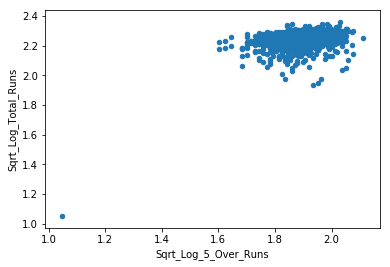

In [85]:
print(d5[['Sqrt_Log_5_Over_Runs','Sqrt_Log_Total_Runs']].corr())
print(d5[['5_Over_Runs','Total_Runs']].corr())
d5[['Sqrt_Log_5_Over_Runs','Sqrt_Log_Total_Runs']].plot(kind='scatter', x='Sqrt_Log_5_Over_Runs', y='Sqrt_Log_Total_Runs',logx=False, logy=False)

                5_Over_Wickets  Total_Runs
5_Over_Wickets        1.000000   -0.336044
Total_Runs           -0.336044    1.000000


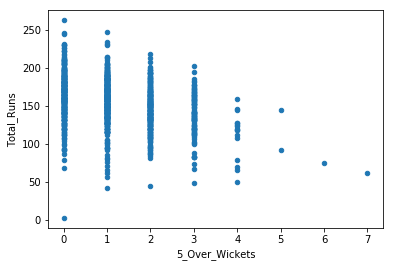

In [86]:
print(d5[['5_Over_Wickets','Total_Runs']].corr())
d5[['5_Over_Wickets','Total_Runs']].plot(kind='scatter', x='5_Over_Wickets', y='Total_Runs')

                     Prev_Run_Score_Rate  Total_Runs
Prev_Run_Score_Rate             1.000000   -0.015623
Total_Runs                     -0.015623    1.000000


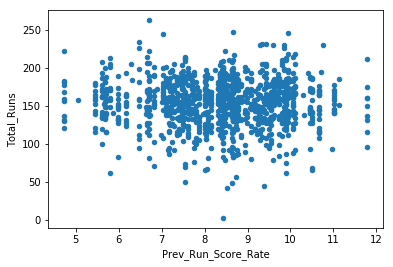

In [87]:
print(d5[['Prev_Run_Score_Rate','Total_Runs']].corr())
d5[['Prev_Run_Score_Rate','Total_Runs']].plot(kind='scatter', x='Prev_Run_Score_Rate', y='Total_Runs')

                       Prev_2_Run_Score_Rate  Total_Runs
Prev_2_Run_Score_Rate               1.000000    0.093578
Total_Runs                          0.093578    1.000000


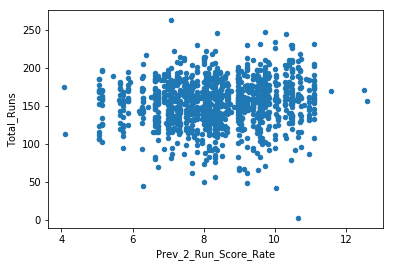

In [88]:
print(d5[['Prev_2_Run_Score_Rate','Total_Runs']].corr())
d5[['Prev_2_Run_Score_Rate','Total_Runs']].plot(kind='scatter', x='Prev_2_Run_Score_Rate', y='Total_Runs')

In [18]:
#'Log_5_Over_Runs','Log_Total_Runs','Sqrt_Log_Total_Runs','Sqrt_Log_5_Over_Runs'

In [89]:
dftest=d5[d5['Match_Year']>2018]
dftrain=d5[d5['Match_Year']<2019]
#dftest=d5[d5['Match_Year']>2017]
#dftrain=d5[d5['Match_Year']<2018]
drop_cols=['Match_City','Match_Teams', 'Match_Year','Total_Wickets','Batting_Team']
dftrain1=dftrain.drop(drop_cols,axis=1)
dftrain2=dftrain1[dftrain1['Toss_Won']!='No Info']
dftrain2.dropna(inplace=True)
dftest1=dftest.drop(drop_cols,axis=1)
dftest1.dropna(inplace=True)
X=dftrain2.drop(['Unnamed: 0','Sqrt_Log_5_Over_Runs','Total_Runs','IPL_Match_Id', 'Prev_3_Run_Score_Rate','Prev_3_Run_Concede_Rate','Log_5_Over_Runs','Log_Total_Runs','Sqrt_Log_Total_Runs'],axis=1)#'Prev_2_Run_Score_Rate','Prev_2_Run_Concede_Rate'], axis=1)
X_test=dftest1.drop(['Unnamed: 0','Sqrt_Log_5_Over_Runs','Total_Runs','IPL_Match_Id','Prev_3_Run_Score_Rate','Prev_3_Run_Concede_Rate','Log_5_Over_Runs','Log_Total_Runs','Sqrt_Log_Total_Runs'],axis=1)#,'Prev_2_Run_Score_Rate','Prev_2_Run_Concede_Rate'], axis=1)
#y=dftrain2['Sqrt_Log_Total_Runs']
#y_test=dftest1['Sqrt_Log_Total_Runs']
y=dftrain2['Total_Runs']
y_test=dftest1['Total_Runs']
X['Toss_Won']=X['Toss_Won'].astype('int')
X_test['Toss_Won']=X_test['Toss_Won'].astype('int')

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
X.columns

Index(['5_Over_Runs', '5_Over_Wickets', 'Batting_Team_Score',
       'Bowling_Team_Score', 'First_Innings', 'Match_Number', 'Over_1_1',
       'Over_1_2', 'Over_1_3', 'Over_1_4', 'Over_1_5', 'Over_1_6',
       'Over_1_extras', 'Over_1_wickets', 'Over_2_1', 'Over_2_2', 'Over_2_3',
       'Over_2_4', 'Over_2_5', 'Over_2_6', 'Over_2_extras', 'Over_2_wickets',
       'Over_3_1', 'Over_3_2', 'Over_3_3', 'Over_3_4', 'Over_3_5', 'Over_3_6',
       'Over_3_extras', 'Over_3_wickets', 'Over_4_1', 'Over_4_2', 'Over_4_3',
       'Over_4_4', 'Over_4_5', 'Over_4_6', 'Over_4_extras', 'Over_4_wickets',
       'Over_5_1', 'Over_5_2', 'Over_5_3', 'Over_5_4', 'Over_5_5', 'Over_5_6',
       'Over_5_extras', 'Over_5_wickets', 'Toss_Won', 'Home Ground',
       'Prev_Run_Score_Rate', 'Prev_Run_Concede_Rate', 'Prev_2_Run_Score_Rate',
       'Prev_2_Run_Concede_Rate'],
      dtype='object')

In [91]:
import sklearn
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [92]:
params = {'num_leaves': 30,#30
         'min_data_in_leaf': 5,#10
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,#0.01
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'r2',
         "lambda_l1": 0.1,
         "verbosity": -1}

In [93]:
lr = LinearRegression()
xg = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=800,
 max_depth=5,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

lg=lgb.LGBMRegressor(**params, n_estimators = 225, nthread = 4, n_jobs = -1)
rn=RANSACRegressor()
rf=RandomForestRegressor()
#svr = SVR(gamma='scale', C=100, epsilon=0.2, kernel='linear')
enet=ElasticNet()
ls=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, warm_start=False)
rdg=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()

In [94]:
len(X_test)

82

#### 9 out of 82 records have deviation less than 1 run.  11% records having deviation less than 1 run
#### 33 out of 82 records have deviation less than 10 runs , if it is modelled on Total_Runs and having 5_Over_Runs as feature


In [104]:
m4=lgb.LGBMRegressor(**params, n_estimators = 700, nthread = 4, n_jobs = -1)#225,#900,#850,1500 (9 records < 1) (33 records < 10)
#m4=xg #(9 records < 1)(34 records < 10)
#m4=lgb.LGBMRegressor(**params1, n_estimators = 650, nthread = 4, n_jobs = -1)#225,#900,#850
#m4=LinearRegression() #(1 records < 1)
#m4=rn #--> 15 #(2 records < 1)
#m4=rf # -->33 #(2 records < 1)
#m4=enet # --> 33 #(6 records < 1)
#m4=ls # --> 30 #(1 records < 1)
#m4=rdg # --> 30 #(1 records < 1)
#m4=dt # --> 20 #(1 records < 1)
m4.fit(X,y)
y_predlg=m4.predict(X_test)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
#preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
#actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
print(len(a[a['Diff']<10]))
print(len(a[a['Diff']<1]))
a['Diff'].mean()

32
7


18.49614049168246

In [95]:
#df = pd.DataFrame(X,columns=boston.feature_names)
#baseline = np.mean(cross_val_score(regression, df, y, scoring=‘r2’, cv=crossvalidation,
# n_jobs=1))
baseline=9
interactions = []
for feature_A in X.columns:
    for feature_B in X.columns:
        if feature_A > feature_B:
            print(feature_A + '-'+feature_B)
            X['interaction'] = X[feature_A] * X[feature_B]
            X_test['interaction'] = X_test[feature_A] * X_test[feature_B]
            #score = np.mean(cross_val_score(regression, df, y, scoring=‘r2’,cv=crossvalidation, n_jobs=1))
            m4.fit(X,y)
            y_predlg=m4.predict(X_test)
            preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
            actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
            #preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
            #actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
            preactdflg=preddflg.join(actdflg)
            preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
            a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
            #print(len(a[a['Diff']<10]))
            score=len(a[a['Diff']<1])
            print(score)
            
            #a['Diff'].mean()
            if score > baseline:
                interactions.append((feature_A, feature_B, round(score,3)))
#print ('Baseline R2: %.3f' % baseline)
#print ('Top 10 interactions: %s' % sorted(interactions, key=lambda(x):x[2],reverse=True)[:10])

5_Over_Wickets-5_Over_Runs
2
Batting_Team_Score-5_Over_Runs
6
Batting_Team_Score-5_Over_Wickets
6
Bowling_Team_Score-5_Over_Runs
8
Bowling_Team_Score-5_Over_Wickets
3
Bowling_Team_Score-Batting_Team_Score
5
First_Innings-5_Over_Runs
6
First_Innings-5_Over_Wickets
5
First_Innings-Batting_Team_Score
8
First_Innings-Bowling_Team_Score
4
Match_Number-5_Over_Runs
8
Match_Number-5_Over_Wickets
6
Match_Number-Batting_Team_Score
4
Match_Number-Bowling_Team_Score
5
Match_Number-First_Innings
4
Match_Number-Home Ground
8
Over_1_1-5_Over_Runs
9
Over_1_1-5_Over_Wickets
7
Over_1_1-Batting_Team_Score
5
Over_1_1-Bowling_Team_Score
4
Over_1_1-First_Innings
8
Over_1_1-Match_Number
10
Over_1_1-Home Ground
6
Over_1_2-5_Over_Runs
6
Over_1_2-5_Over_Wickets
6
Over_1_2-Batting_Team_Score
5
Over_1_2-Bowling_Team_Score
5
Over_1_2-First_Innings
5
Over_1_2-Match_Number
8
Over_1_2-Over_1_1
7
Over_1_2-Home Ground
10
Over_1_3-5_Over_Runs
9
Over_1_3-5_Over_Wickets
8
Over_1_3-Batting_Team_Score
11
Over_1_3-Bowling_Te

9
Over_3_4-Over_1_6
6
Over_3_4-Over_1_extras
4
Over_3_4-Over_1_wickets
5
Over_3_4-Over_2_1
8
Over_3_4-Over_2_2
7
Over_3_4-Over_2_3
7
Over_3_4-Over_2_4
7
Over_3_4-Over_2_5
7
Over_3_4-Over_2_6
6
Over_3_4-Over_2_extras
8
Over_3_4-Over_2_wickets
8
Over_3_4-Over_3_1
7
Over_3_4-Over_3_2
7
Over_3_4-Over_3_3
6
Over_3_4-Home Ground
7
Over_3_5-5_Over_Runs
5
Over_3_5-5_Over_Wickets
7
Over_3_5-Batting_Team_Score
8
Over_3_5-Bowling_Team_Score
5
Over_3_5-First_Innings
6
Over_3_5-Match_Number
7
Over_3_5-Over_1_1
7
Over_3_5-Over_1_2
6
Over_3_5-Over_1_3
8
Over_3_5-Over_1_4
3
Over_3_5-Over_1_5
3
Over_3_5-Over_1_6
6
Over_3_5-Over_1_extras
7
Over_3_5-Over_1_wickets
7
Over_3_5-Over_2_1
3
Over_3_5-Over_2_2
6
Over_3_5-Over_2_3
7
Over_3_5-Over_2_4
10
Over_3_5-Over_2_5
5
Over_3_5-Over_2_6
3
Over_3_5-Over_2_extras
7
Over_3_5-Over_2_wickets
11
Over_3_5-Over_3_1
6
Over_3_5-Over_3_2
7
Over_3_5-Over_3_3
8
Over_3_5-Over_3_4
7
Over_3_5-Home Ground
5
Over_3_6-5_Over_Runs
5
Over_3_6-5_Over_Wickets
4
Over_3_6-Batting_Te

7
Over_4_extras-Over_2_6
7
Over_4_extras-Over_2_extras
6
Over_4_extras-Over_2_wickets
6
Over_4_extras-Over_3_1
4
Over_4_extras-Over_3_2
6
Over_4_extras-Over_3_3
5
Over_4_extras-Over_3_4
8
Over_4_extras-Over_3_5
5
Over_4_extras-Over_3_6
9
Over_4_extras-Over_3_extras
8
Over_4_extras-Over_3_wickets
7
Over_4_extras-Over_4_1
11
Over_4_extras-Over_4_2
6
Over_4_extras-Over_4_3
7
Over_4_extras-Over_4_4
8
Over_4_extras-Over_4_5
7
Over_4_extras-Over_4_6
3
Over_4_extras-Home Ground
3
Over_4_wickets-5_Over_Runs
7
Over_4_wickets-5_Over_Wickets
7
Over_4_wickets-Batting_Team_Score
7
Over_4_wickets-Bowling_Team_Score
7
Over_4_wickets-First_Innings
5
Over_4_wickets-Match_Number
8
Over_4_wickets-Over_1_1
7
Over_4_wickets-Over_1_2
10
Over_4_wickets-Over_1_3
6
Over_4_wickets-Over_1_4
3
Over_4_wickets-Over_1_5
7
Over_4_wickets-Over_1_6
6
Over_4_wickets-Over_1_extras
5
Over_4_wickets-Over_1_wickets
6
Over_4_wickets-Over_2_1
8
Over_4_wickets-Over_2_2
12
Over_4_wickets-Over_2_3
11
Over_4_wickets-Over_2_4
6
Ov

7
Over_5_extras-Over_5_6
8
Over_5_extras-Home Ground
6
Over_5_wickets-5_Over_Runs
6
Over_5_wickets-5_Over_Wickets
6
Over_5_wickets-Batting_Team_Score
7
Over_5_wickets-Bowling_Team_Score
6
Over_5_wickets-First_Innings
6
Over_5_wickets-Match_Number
10
Over_5_wickets-Over_1_1
6
Over_5_wickets-Over_1_2
5
Over_5_wickets-Over_1_3
8
Over_5_wickets-Over_1_4
7
Over_5_wickets-Over_1_5
4
Over_5_wickets-Over_1_6
5
Over_5_wickets-Over_1_extras
9
Over_5_wickets-Over_1_wickets
8
Over_5_wickets-Over_2_1
8
Over_5_wickets-Over_2_2
7
Over_5_wickets-Over_2_3
5
Over_5_wickets-Over_2_4
6
Over_5_wickets-Over_2_5
5
Over_5_wickets-Over_2_6
5
Over_5_wickets-Over_2_extras
10
Over_5_wickets-Over_2_wickets
8
Over_5_wickets-Over_3_1
7
Over_5_wickets-Over_3_2
7
Over_5_wickets-Over_3_3
9
Over_5_wickets-Over_3_4
5
Over_5_wickets-Over_3_5
7
Over_5_wickets-Over_3_6
5
Over_5_wickets-Over_3_extras
7
Over_5_wickets-Over_3_wickets
8
Over_5_wickets-Over_4_1
4
Over_5_wickets-Over_4_2
7
Over_5_wickets-Over_4_3
4
Over_5_wickets

10
Prev_2_Run_Concede_Rate-Over_1_6
5
Prev_2_Run_Concede_Rate-Over_1_extras
6
Prev_2_Run_Concede_Rate-Over_1_wickets
6
Prev_2_Run_Concede_Rate-Over_2_1
4
Prev_2_Run_Concede_Rate-Over_2_2
5
Prev_2_Run_Concede_Rate-Over_2_3
9
Prev_2_Run_Concede_Rate-Over_2_4
6
Prev_2_Run_Concede_Rate-Over_2_5
8
Prev_2_Run_Concede_Rate-Over_2_6
6
Prev_2_Run_Concede_Rate-Over_2_extras
10
Prev_2_Run_Concede_Rate-Over_2_wickets
4
Prev_2_Run_Concede_Rate-Over_3_1
7
Prev_2_Run_Concede_Rate-Over_3_2
2
Prev_2_Run_Concede_Rate-Over_3_3
4
Prev_2_Run_Concede_Rate-Over_3_4
9
Prev_2_Run_Concede_Rate-Over_3_5
3
Prev_2_Run_Concede_Rate-Over_3_6
5
Prev_2_Run_Concede_Rate-Over_3_extras
7
Prev_2_Run_Concede_Rate-Over_3_wickets
7
Prev_2_Run_Concede_Rate-Over_4_1
6
Prev_2_Run_Concede_Rate-Over_4_2
7
Prev_2_Run_Concede_Rate-Over_4_3
4
Prev_2_Run_Concede_Rate-Over_4_4
7
Prev_2_Run_Concede_Rate-Over_4_5
5
Prev_2_Run_Concede_Rate-Over_4_6
2
Prev_2_Run_Concede_Rate-Over_4_extras
7
Prev_2_Run_Concede_Rate-Over_4_wickets
10
Prev_2

In [99]:
sorted(interactions, key=lambda x:x[2],reverse=True)[:10]
#sorted(interactions)

[('Over_5_5', 'Over_1_3', 13),
 ('Over_3_1', 'First_Innings', 12),
 ('Over_3_2', 'Over_2_3', 12),
 ('Over_4_wickets', 'Over_2_2', 12),
 ('Over_4_wickets', 'Over_4_4', 12),
 ('Over_5_wickets', 'Over_5_3', 12),
 ('Prev_Run_Concede_Rate', 'Bowling_Team_Score', 12),
 ('Over_1_3', 'Batting_Team_Score', 11),
 ('Over_1_5', 'First_Innings', 11),
 ('Over_2_2', 'Over_1_5', 11)]

In [100]:
#interactions

In [101]:
#'Toss_Won', 'Over_2_2', 13 (test set - 2019)
#'Over_5_5', 'Over_1_3', 13 (test set - 2019)
#['Over_5_extras', 'Toss_Won', 'Prev_2_Run_Concede_Rate'] 15 (test set - 2019)
#'Toss_Won', 'Over_5_6', 15 (test set - 2018 & 2019)
X['interaction']=X['Over_5_5']*X['Over_1_3']
X_test['interaction']=X_test['Over_5_5']*X_test['Over_1_3']
#X['interaction']=X['Over_5_extras']* X['Toss_Won']*X['Prev_2_Run_Concede_Rate']
#X_test['interaction']=X_test['Over_5_extras']* X_test['Toss_Won']*X_test['Prev_2_Run_Concede_Rate']

In [105]:
m4

LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       lambda_l1=0.1, learning_rate=0.01, max_depth=5, metric='r2',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=5,
       min_split_gain=0.0, n_estimators=700, n_jobs=-1, nthread=4,
       num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [103]:
m4=lgb.LGBMRegressor(**params, n_estimators = 700, nthread = 4, n_jobs = -1)#225,#900,#850,1500 (9 records < 1) (33 records < 10)
#m4=xg #(9 records < 1)(34 records < 10)
#m4=lgb.LGBMRegressor(**params1, n_estimators = 650, nthread = 4, n_jobs = -1)#225,#900,#850
#m4=LinearRegression() #(1 records < 1)
#m4=rn #--> 15 #(2 records < 1)
#m4=rf # -->33 #(2 records < 1)
#m4=enet # --> 33 #(6 records < 1)
#m4=ls # --> 30 #(1 records < 1)
#m4=rdg # --> 30 #(1 records < 1)
#m4=dt # --> 20 #(1 records < 1)
m4.fit(X,y)
y_predlg=m4.predict(X_test)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
#preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
#actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
print(len(a[a['Diff']<10]))
print(len(a[a['Diff']<1]))
a['Diff'].mean()

31
13


18.423265321319878

In [104]:
a1=dftest.join(a)
a1[['Match_City','Match_Teams', 'Match_Year','Match_Number','Batting_Team','First_Innings','5_Over_Runs','5_Over_Wickets','Total_Runs','Predicted_Score','Diff']][a1['Diff']<1]

,Match_City,Match_Teams,Match_Year,Match_Number,Batting_Team,First_Innings,5_Over_Runs,5_Over_Wickets,Total_Runs,Predicted_Score,Diff
1281,Mohali,Kings XI Punjab-Delhi Capitals,2019,13,Delhi Capitals,0,39,1,152,151.298061,0.701939
1284,Mumbai,Mumbai Indians-Chennai Super Kings,2019,15,Mumbai Indians,1,39,1,170,169.431342,0.568658
1300,Chennai,Chennai Super Kings-Kolkata Knight Riders,2019,23,Kolkata Knight Riders,1,24,4,108,107.362865,0.637135
1306,Kolkata,Kolkata Knight Riders-Delhi Capitals,2019,26,Kolkata Knight Riders,1,40,1,178,178.050895,0.050895
1308,Mumbai,Mumbai Indians-Rajasthan Royals,2019,27,Mumbai Indians,1,53,0,187,187.651987,0.651987
1310,Mohali,Kings XI Punjab-Royal Challengers Bangalore,2019,28,Kings XI Punjab,1,36,0,173,172.806114,0.193886
1313,Kolkata,Kolkata Knight Riders-Chennai Super Kings,2019,29,Chennai Super Kings,0,44,1,162,162.701061,0.701061
1318,Mohali,Kings XI Punjab-Rajasthan Royals,2019,32,Kings XI Punjab,1,34,0,182,181.576198,0.423802
1326,Jaipur,Rajasthan Royals-Mumbai Indians,2019,36,Mumbai Indians,1,38,1,161,160.003909,0.996091
1327,Jaipur,Rajasthan Royals-Mumbai Indians,2019,36,Rajasthan Royals,0,48,1,162,161.174509,0.825491


In [105]:
a1[['Predicted_Score','Actual_Score']].corr() #0.479194

,Predicted_Score,Actual_Score
Predicted_Score,1.000000,0.488398
Actual_Score,0.488398,1.000000


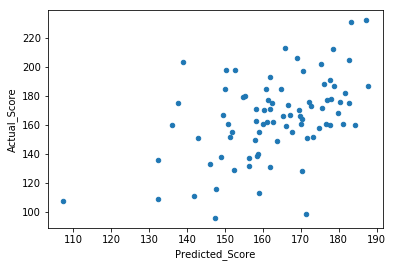

In [106]:
a.plot(x='Predicted_Score', y ='Actual_Score', kind='scatter')

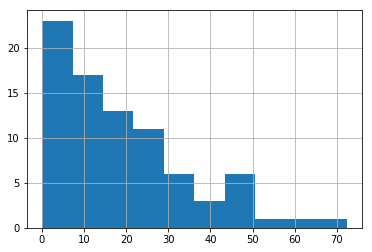

In [107]:
a['Diff'].hist()

#### The above interaction was checked for combination of two variables. Lets check if we can calculte for all set of combinations

In [108]:
len(X.columns)

53

In [114]:
X.columns

Index(['5_Over_Runs', '5_Over_Wickets', 'Batting_Team_Score',
       'Bowling_Team_Score', 'First_Innings', 'Match_Number', 'Over_1_1',
       'Over_1_2', 'Over_1_3', 'Over_1_4', 'Over_1_5', 'Over_1_6',
       'Over_1_extras', 'Over_1_wickets', 'Over_2_1', 'Over_2_2', 'Over_2_3',
       'Over_2_4', 'Over_2_5', 'Over_2_6', 'Over_2_extras', 'Over_2_wickets',
       'Over_3_1', 'Over_3_2', 'Over_3_3', 'Over_3_4', 'Over_3_5', 'Over_3_6',
       'Over_3_extras', 'Over_3_wickets', 'Over_4_1', 'Over_4_2', 'Over_4_3',
       'Over_4_4', 'Over_4_5', 'Over_4_6', 'Over_4_extras', 'Over_4_wickets',
       'Over_5_1', 'Over_5_2', 'Over_5_3', 'Over_5_4', 'Over_5_5', 'Over_5_6',
       'Over_5_extras', 'Over_5_wickets', 'Toss_Won', 'Home Ground',
       'Prev_Run_Score_Rate', 'Prev_Run_Concede_Rate', 'Prev_2_Run_Score_Rate',
       'Prev_2_Run_Concede_Rate', 'interaction'],
      dtype='object')

In [109]:
baseline=9
interactions=[]
params = {'num_leaves': 30,#30
         'min_data_in_leaf': 5,#10
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,#0.01
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'r2',
         "lambda_l1": 0.1,
         "verbosity": -1}
m4=lgb.LGBMRegressor(**params, n_estimators = 700, nthread = 4, n_jobs = -1)
i=1

In [110]:

for subset in valid_comblist1:
    subsetdftrain=X[subset]
    subsetdftest=X_test[subset]
    subsetdftrain['interaction']=subsetdftrain.product(axis=1)
    subsetdftest['interaction']=subsetdftest.product(axis=1)
    X['interaction']= subsetdftrain['interaction']
    X_test['interaction']= subsetdftest['interaction']
    m4.fit(X,y)
    y_predlg=m4.predict(X_test)
    preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
    actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
    #preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
    #actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
    preactdflg=preddflg.join(actdflg)
    preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
    a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
    #print(len(a[a['Diff']<10]))
    score=len(a[a['Diff']<1])
    print(str(i) + ' - ' + str(score))
    i=i+1        
    #a['Diff'].mean()
    if score > baseline:
        interactions.append((subset, round(score,3)))


c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1 - 3
2 - 7
3 - 7
4 - 4
5 - 6
6 - 5
7 - 7
8 - 5
9 - 7
10 - 5
11 - 7
12 - 8
13 - 3
14 - 5
15 - 4
16 - 5
17 - 8
18 - 6
19 - 6
20 - 8
21 - 8
22 - 5
23 - 8
24 - 6
25 - 6
26 - 6
27 - 8
28 - 5
29 - 8
30 - 6
31 - 7
32 - 7
33 - 4
34 - 7
35 - 7
36 - 8
37 - 5
38 - 4
39 - 5
40 - 5
41 - 6
42 - 8
43 - 5
44 - 7
45 - 9
46 - 6
47 - 5
48 - 3
49 - 6
50 - 6
51 - 10
52 - 9
53 - 4
54 - 8
55 - 8
56 - 8
57 - 8
58 - 8
59 - 5
60 - 5
61 - 6
62 - 3
63 - 8
64 - 10
65 - 6
66 - 8
67 - 7
68 - 8
69 - 6
70 - 6
71 - 6
72 - 3
73 - 5
74 - 6
75 - 9
76 - 4
77 - 6
78 - 6
79 - 6
80 - 5
81 - 4
82 - 7
83 - 5
84 - 3
85 - 6
86 - 6
87 - 9
88 - 5
89 - 6
90 - 4
91 - 3
92 - 6
93 - 6
94 - 6
95 - 8
96 - 11
97 - 9
98 - 7
99 - 7
100 - 5
101 - 7
102 - 6
103 - 6
104 - 9
105 - 5
106 - 10
107 - 8
108 - 8
109 - 6
110 - 9
111 - 3
112 - 6
113 - 7
114 - 6
115 - 6
116 - 4
117 - 4
118 - 9
119 - 6
120 - 6
121 - 2
122 - 7
123 - 6
124 - 4
125 - 7
126 - 6
127 - 5
128 - 3
129 - 7
130 - 8
131 - 9
132 - 5
133 - 4
134 - 5
135 - 4
136 - 6
137 - 7
138 - 6


1032 - 5
1033 - 7
1034 - 7
1035 - 7
1036 - 9
1037 - 6
1038 - 7
1039 - 4
1040 - 6
1041 - 6
1042 - 7
1043 - 6
1044 - 5
1045 - 8
1046 - 9
1047 - 6
1048 - 7
1049 - 5
1050 - 8
1051 - 4
1052 - 6
1053 - 8
1054 - 6
1055 - 8
1056 - 2
1057 - 7
1058 - 4
1059 - 8
1060 - 7
1061 - 7
1062 - 5
1063 - 7
1064 - 9
1065 - 7
1066 - 8
1067 - 5
1068 - 4
1069 - 5
1070 - 6
1071 - 7
1072 - 4
1073 - 5
1074 - 6
1075 - 6
1076 - 7
1077 - 6
1078 - 6
1079 - 9
1080 - 4
1081 - 8
1082 - 8
1083 - 5
1084 - 5
1085 - 8
1086 - 8
1087 - 6
1088 - 6
1089 - 7
1090 - 6
1091 - 9
1092 - 6
1093 - 5
1094 - 6
1095 - 7
1096 - 5
1097 - 6
1098 - 7
1099 - 10
1100 - 9
1101 - 3
1102 - 8
1103 - 4
1104 - 4
1105 - 4
1106 - 7
1107 - 3
1108 - 8
1109 - 10
1110 - 3
1111 - 5
1112 - 6
1113 - 10
1114 - 4
1115 - 8
1116 - 4
1117 - 7
1118 - 8
1119 - 8
1120 - 7
1121 - 6
1122 - 5
1123 - 5
1124 - 8
1125 - 5
1126 - 8
1127 - 5
1128 - 8
1129 - 8
1130 - 7
1131 - 4
1132 - 3
1133 - 6
1134 - 6
1135 - 6
1136 - 6
1137 - 8
1138 - 3
1139 - 8
1140 - 6
1141 - 6
1142 - 

1941 - 8
1942 - 7
1943 - 6
1944 - 6
1945 - 5
1946 - 8
1947 - 8
1948 - 5
1949 - 6
1950 - 6
1951 - 6
1952 - 7
1953 - 3
1954 - 5
1955 - 10
1956 - 5
1957 - 8
1958 - 6
1959 - 4
1960 - 8
1961 - 7
1962 - 7
1963 - 6
1964 - 8
1965 - 7
1966 - 8
1967 - 8
1968 - 6
1969 - 5
1970 - 6
1971 - 4
1972 - 5
1973 - 6
1974 - 7
1975 - 8
1976 - 7
1977 - 6
1978 - 8
1979 - 5
1980 - 7
1981 - 8
1982 - 6
1983 - 7
1984 - 7
1985 - 7
1986 - 10
1987 - 7
1988 - 5
1989 - 6
1990 - 8
1991 - 5
1992 - 4
1993 - 7
1994 - 10
1995 - 7
1996 - 6
1997 - 5
1998 - 7
1999 - 6
2000 - 6
2001 - 9
2002 - 9
2003 - 7
2004 - 7
2005 - 7
2006 - 4
2007 - 9
2008 - 9
2009 - 7
2010 - 8
2011 - 8
2012 - 8
2013 - 6
2014 - 7
2015 - 5
2016 - 9
2017 - 6
2018 - 6
2019 - 4
2020 - 9
2021 - 5
2022 - 8
2023 - 6
2024 - 8
2025 - 5
2026 - 9
2027 - 8
2028 - 5
2029 - 3
2030 - 4
2031 - 6
2032 - 7
2033 - 9
2034 - 7
2035 - 7
2036 - 6
2037 - 7
2038 - 6
2039 - 8
2040 - 6
2041 - 6
2042 - 7
2043 - 8
2044 - 8
2045 - 1
2046 - 2
2047 - 5
2048 - 7
2049 - 8
2050 - 6
2051 - 

2850 - 6
2851 - 5
2852 - 4
2853 - 7
2854 - 3
2855 - 3
2856 - 7
2857 - 8
2858 - 5
2859 - 9
2860 - 8
2861 - 4
2862 - 6
2863 - 8
2864 - 6
2865 - 9
2866 - 8
2867 - 4
2868 - 10
2869 - 5
2870 - 10
2871 - 3
2872 - 7
2873 - 6
2874 - 6
2875 - 6
2876 - 5
2877 - 6
2878 - 7
2879 - 6
2880 - 4
2881 - 7
2882 - 7
2883 - 4
2884 - 7
2885 - 6
2886 - 6
2887 - 7
2888 - 6
2889 - 3
2890 - 5
2891 - 7
2892 - 9
2893 - 6
2894 - 5
2895 - 7
2896 - 8
2897 - 6
2898 - 5
2899 - 8
2900 - 5
2901 - 8
2902 - 6
2903 - 7
2904 - 7
2905 - 7
2906 - 9
2907 - 6
2908 - 6
2909 - 6
2910 - 7
2911 - 7
2912 - 6
2913 - 8
2914 - 4
2915 - 5
2916 - 7
2917 - 4
2918 - 6
2919 - 7
2920 - 7
2921 - 6
2922 - 6
2923 - 6
2924 - 8
2925 - 4
2926 - 8
2927 - 5
2928 - 6
2929 - 7
2930 - 4
2931 - 6
2932 - 5
2933 - 6
2934 - 7
2935 - 4
2936 - 6
2937 - 2
2938 - 7
2939 - 6
2940 - 6
2941 - 7
2942 - 5
2943 - 5
2944 - 7
2945 - 7
2946 - 3
2947 - 8
2948 - 7
2949 - 10
2950 - 5
2951 - 9
2952 - 5
2953 - 6
2954 - 6
2955 - 6
2956 - 8
2957 - 3
2958 - 8
2959 - 8
2960 - 

3759 - 8
3760 - 9
3761 - 5
3762 - 7
3763 - 7
3764 - 5
3765 - 3
3766 - 7
3767 - 6
3768 - 9
3769 - 6
3770 - 5
3771 - 8
3772 - 6
3773 - 9
3774 - 3
3775 - 3
3776 - 7
3777 - 7
3778 - 3
3779 - 6
3780 - 11
3781 - 6
3782 - 7
3783 - 6
3784 - 3
3785 - 5
3786 - 5
3787 - 6
3788 - 7
3789 - 7
3790 - 6
3791 - 8
3792 - 3
3793 - 6
3794 - 6
3795 - 8
3796 - 9
3797 - 5
3798 - 5
3799 - 5
3800 - 5
3801 - 5
3802 - 6
3803 - 6
3804 - 5
3805 - 7
3806 - 6
3807 - 9
3808 - 5
3809 - 8
3810 - 7
3811 - 6
3812 - 6
3813 - 4
3814 - 5
3815 - 6
3816 - 6
3817 - 8
3818 - 8
3819 - 4
3820 - 6
3821 - 7
3822 - 7
3823 - 7
3824 - 8
3825 - 8
3826 - 7
3827 - 6
3828 - 4
3829 - 5
3830 - 4
3831 - 7
3832 - 5
3833 - 6
3834 - 3
3835 - 6
3836 - 9
3837 - 8
3838 - 5
3839 - 7
3840 - 5
3841 - 8
3842 - 5
3843 - 4
3844 - 9
3845 - 7
3846 - 4
3847 - 8
3848 - 5
3849 - 6
3850 - 7
3851 - 5
3852 - 6
3853 - 5
3854 - 6
3855 - 7
3856 - 7
3857 - 6
3858 - 7
3859 - 7
3860 - 6
3861 - 4
3862 - 4
3863 - 8
3864 - 7
3865 - 7
3866 - 7
3867 - 7
3868 - 6
3869 - 6


4669 - 6
4670 - 4
4671 - 6
4672 - 7
4673 - 6
4674 - 5
4675 - 5
4676 - 9
4677 - 7
4678 - 8
4679 - 8
4680 - 4
4681 - 4
4682 - 6
4683 - 5
4684 - 6
4685 - 6
4686 - 6
4687 - 5
4688 - 4
4689 - 8
4690 - 4
4691 - 6
4692 - 8
4693 - 7
4694 - 6
4695 - 7
4696 - 7
4697 - 6
4698 - 5
4699 - 8
4700 - 8
4701 - 8
4702 - 7
4703 - 7
4704 - 7
4705 - 4
4706 - 5
4707 - 7
4708 - 6
4709 - 6
4710 - 7
4711 - 5
4712 - 5
4713 - 7
4714 - 8
4715 - 9
4716 - 7
4717 - 7
4718 - 5
4719 - 4
4720 - 5
4721 - 6
4722 - 7
4723 - 7
4724 - 7
4725 - 8
4726 - 7
4727 - 5
4728 - 7
4729 - 6
4730 - 7
4731 - 4
4732 - 5
4733 - 4
4734 - 6
4735 - 5
4736 - 7
4737 - 6
4738 - 6
4739 - 8
4740 - 5
4741 - 9
4742 - 5
4743 - 4
4744 - 7
4745 - 9
4746 - 5
4747 - 6
4748 - 7
4749 - 9
4750 - 7
4751 - 9
4752 - 8
4753 - 5
4754 - 8
4755 - 7
4756 - 6
4757 - 3
4758 - 5
4759 - 4
4760 - 6
4761 - 6
4762 - 5
4763 - 5
4764 - 5
4765 - 8
4766 - 6
4767 - 10
4768 - 8
4769 - 6
4770 - 9
4771 - 6
4772 - 6
4773 - 8
4774 - 8
4775 - 5
4776 - 8
4777 - 6
4778 - 5
4779 - 8


5578 - 5
5579 - 5
5580 - 7
5581 - 5
5582 - 8
5583 - 6
5584 - 7
5585 - 4
5586 - 5
5587 - 7
5588 - 3
5589 - 7
5590 - 5
5591 - 6
5592 - 6
5593 - 7
5594 - 5
5595 - 8
5596 - 6
5597 - 7
5598 - 6
5599 - 7
5600 - 9
5601 - 8
5602 - 9
5603 - 5
5604 - 7
5605 - 8
5606 - 6
5607 - 3
5608 - 9
5609 - 7
5610 - 5
5611 - 5
5612 - 8
5613 - 8
5614 - 5
5615 - 7
5616 - 6
5617 - 9
5618 - 6
5619 - 6
5620 - 5
5621 - 6
5622 - 6
5623 - 5
5624 - 7
5625 - 7
5626 - 6
5627 - 8
5628 - 7
5629 - 6
5630 - 7
5631 - 7
5632 - 4
5633 - 8
5634 - 6
5635 - 7
5636 - 7
5637 - 8
5638 - 6
5639 - 5
5640 - 7
5641 - 7
5642 - 5
5643 - 7
5644 - 4
5645 - 6
5646 - 6
5647 - 2
5648 - 7
5649 - 7
5650 - 6
5651 - 8
5652 - 6
5653 - 7
5654 - 8
5655 - 6
5656 - 5
5657 - 7
5658 - 10
5659 - 4
5660 - 3
5661 - 7
5662 - 5
5663 - 5
5664 - 6
5665 - 7
5666 - 7
5667 - 8
5668 - 4
5669 - 7
5670 - 4
5671 - 9
5672 - 5
5673 - 5
5674 - 6
5675 - 6
5676 - 5
5677 - 6
5678 - 6
5679 - 7
5680 - 8
5681 - 6
5682 - 8
5683 - 4
5684 - 6
5685 - 7
5686 - 6
5687 - 8
5688 - 5


6486 - 4
6487 - 8
6488 - 3
6489 - 4
6490 - 4
6491 - 8
6492 - 5
6493 - 8
6494 - 8
6495 - 6
6496 - 5
6497 - 4
6498 - 4
6499 - 7
6500 - 6
6501 - 7
6502 - 8
6503 - 5
6504 - 5
6505 - 2
6506 - 7
6507 - 5
6508 - 5
6509 - 5
6510 - 6
6511 - 5
6512 - 6
6513 - 7
6514 - 8
6515 - 6
6516 - 4
6517 - 7
6518 - 4
6519 - 5
6520 - 6
6521 - 8
6522 - 5
6523 - 8
6524 - 6
6525 - 9
6526 - 7
6527 - 9
6528 - 7
6529 - 7
6530 - 4
6531 - 4
6532 - 8
6533 - 6
6534 - 8
6535 - 6
6536 - 7
6537 - 5
6538 - 4
6539 - 7
6540 - 5
6541 - 8
6542 - 8
6543 - 8
6544 - 6
6545 - 8
6546 - 7
6547 - 7
6548 - 6
6549 - 6
6550 - 6
6551 - 9
6552 - 7
6553 - 8
6554 - 7
6555 - 7
6556 - 7
6557 - 3
6558 - 6
6559 - 7
6560 - 9
6561 - 6
6562 - 5
6563 - 8
6564 - 5
6565 - 8
6566 - 6
6567 - 7
6568 - 5
6569 - 7
6570 - 7
6571 - 7
6572 - 6
6573 - 5
6574 - 5
6575 - 10
6576 - 4
6577 - 5
6578 - 4
6579 - 5
6580 - 4
6581 - 9
6582 - 6
6583 - 8
6584 - 6
6585 - 7
6586 - 8
6587 - 4
6588 - 7
6589 - 8
6590 - 6
6591 - 6
6592 - 7
6593 - 6
6594 - 4
6595 - 6
6596 - 4


7395 - 7
7396 - 5
7397 - 6
7398 - 8
7399 - 8
7400 - 5
7401 - 6
7402 - 6
7403 - 7
7404 - 8
7405 - 8
7406 - 6
7407 - 6
7408 - 7
7409 - 9
7410 - 6
7411 - 6
7412 - 6
7413 - 4
7414 - 7
7415 - 8
7416 - 6
7417 - 3
7418 - 6
7419 - 4
7420 - 6
7421 - 6
7422 - 8
7423 - 5
7424 - 6
7425 - 7
7426 - 8
7427 - 6
7428 - 4
7429 - 7
7430 - 8
7431 - 8
7432 - 7
7433 - 6
7434 - 9
7435 - 10
7436 - 7
7437 - 4
7438 - 6
7439 - 6
7440 - 6
7441 - 6
7442 - 8
7443 - 7
7444 - 5
7445 - 6
7446 - 6
7447 - 6
7448 - 6
7449 - 6
7450 - 8
7451 - 7
7452 - 7
7453 - 4
7454 - 5
7455 - 5
7456 - 10
7457 - 9
7458 - 8
7459 - 9
7460 - 7
7461 - 11
7462 - 6
7463 - 9
7464 - 9
7465 - 7
7466 - 6
7467 - 6
7468 - 4
7469 - 5
7470 - 5
7471 - 10
7472 - 6
7473 - 7
7474 - 8
7475 - 8
7476 - 6
7477 - 5
7478 - 7
7479 - 6
7480 - 5
7481 - 6
7482 - 6
7483 - 6
7484 - 8
7485 - 5
7486 - 7
7487 - 6
7488 - 6
7489 - 6
7490 - 7
7491 - 6
7492 - 5
7493 - 7
7494 - 7
7495 - 7
7496 - 7
7497 - 6
7498 - 5
7499 - 6
7500 - 5
7501 - 6
7502 - 9
7503 - 7
7504 - 7
7505 -

8305 - 7
8306 - 9
8307 - 2
8308 - 6
8309 - 6
8310 - 7
8311 - 6
8312 - 7
8313 - 8
8314 - 6
8315 - 6
8316 - 7
8317 - 5
8318 - 5
8319 - 9
8320 - 6
8321 - 8
8322 - 7
8323 - 7
8324 - 5
8325 - 4
8326 - 5
8327 - 8
8328 - 6
8329 - 8
8330 - 7
8331 - 5
8332 - 7
8333 - 5
8334 - 4
8335 - 7
8336 - 6
8337 - 5
8338 - 5
8339 - 7
8340 - 9
8341 - 9
8342 - 3
8343 - 9
8344 - 6
8345 - 6
8346 - 7
8347 - 7
8348 - 8
8349 - 5
8350 - 6
8351 - 6
8352 - 10
8353 - 8
8354 - 7
8355 - 5
8356 - 4
8357 - 5
8358 - 5
8359 - 7
8360 - 5
8361 - 7
8362 - 5
8363 - 9
8364 - 9
8365 - 7
8366 - 6
8367 - 6
8368 - 7
8369 - 6
8370 - 8
8371 - 8
8372 - 4
8373 - 5
8374 - 7
8375 - 7
8376 - 6
8377 - 5
8378 - 8
8379 - 7
8380 - 7
8381 - 7
8382 - 8
8383 - 8
8384 - 5
8385 - 6
8386 - 9
8387 - 5
8388 - 5
8389 - 7
8390 - 9
8391 - 4
8392 - 8
8393 - 7
8394 - 8
8395 - 8
8396 - 7
8397 - 5
8398 - 4
8399 - 5
8400 - 7
8401 - 4
8402 - 5
8403 - 6
8404 - 5
8405 - 7
8406 - 5
8407 - 7
8408 - 6
8409 - 7
8410 - 8
8411 - 8
8412 - 5
8413 - 8
8414 - 7
8415 - 8


9215 - 5
9216 - 6
9217 - 6
9218 - 7
9219 - 8
9220 - 7
9221 - 6
9222 - 5
9223 - 6
9224 - 6
9225 - 9
9226 - 3
9227 - 5
9228 - 8
9229 - 6
9230 - 5
9231 - 7
9232 - 6
9233 - 4
9234 - 8
9235 - 5
9236 - 5
9237 - 8
9238 - 7
9239 - 4
9240 - 5
9241 - 6
9242 - 7
9243 - 7
9244 - 5
9245 - 8
9246 - 5
9247 - 7
9248 - 8
9249 - 6
9250 - 8
9251 - 4
9252 - 8
9253 - 8
9254 - 8
9255 - 7
9256 - 8
9257 - 7
9258 - 5
9259 - 4
9260 - 9
9261 - 5
9262 - 8
9263 - 7
9264 - 5
9265 - 5
9266 - 5
9267 - 6
9268 - 5
9269 - 9
9270 - 7
9271 - 6
9272 - 7
9273 - 10
9274 - 7
9275 - 6
9276 - 5
9277 - 7
9278 - 6
9279 - 6
9280 - 3
9281 - 6
9282 - 7
9283 - 7
9284 - 7
9285 - 10
9286 - 8
9287 - 6
9288 - 4
9289 - 6
9290 - 5
9291 - 9
9292 - 5
9293 - 6
9294 - 5
9295 - 6
9296 - 7
9297 - 9
9298 - 6
9299 - 7
9300 - 8
9301 - 7
9302 - 7
9303 - 6
9304 - 6
9305 - 8
9306 - 9
9307 - 4
9308 - 9
9309 - 6
9310 - 8
9311 - 5
9312 - 4
9313 - 6
9314 - 5
9315 - 6
9316 - 4
9317 - 6
9318 - 7
9319 - 6
9320 - 6
9321 - 4
9322 - 7
9323 - 7
9324 - 7
9325 - 4

10112 - 9
10113 - 6
10114 - 3
10115 - 8
10116 - 5
10117 - 4
10118 - 6
10119 - 6
10120 - 8
10121 - 4
10122 - 8
10123 - 8
10124 - 6
10125 - 3
10126 - 6
10127 - 6
10128 - 5
10129 - 10
10130 - 7
10131 - 4
10132 - 8
10133 - 8
10134 - 7
10135 - 6
10136 - 6
10137 - 10
10138 - 4
10139 - 6
10140 - 5
10141 - 6
10142 - 3
10143 - 7
10144 - 4
10145 - 6
10146 - 6
10147 - 6
10148 - 8
10149 - 5
10150 - 6
10151 - 7
10152 - 8
10153 - 7
10154 - 6
10155 - 4
10156 - 7
10157 - 9
10158 - 9
10159 - 5
10160 - 7
10161 - 8
10162 - 6
10163 - 7
10164 - 6
10165 - 7
10166 - 4
10167 - 6
10168 - 7
10169 - 5
10170 - 6
10171 - 7
10172 - 6
10173 - 7
10174 - 7
10175 - 6
10176 - 7
10177 - 7
10178 - 5
10179 - 6
10180 - 6
10181 - 4
10182 - 7
10183 - 7
10184 - 7
10185 - 7
10186 - 5
10187 - 8
10188 - 7
10189 - 9
10190 - 9
10191 - 9
10192 - 7
10193 - 7
10194 - 4
10195 - 7
10196 - 9
10197 - 6
10198 - 9
10199 - 7
10200 - 7
10201 - 7
10202 - 5
10203 - 6
10204 - 8
10205 - 7
10206 - 5
10207 - 8
10208 - 7
10209 - 7
10210 - 8
10211 - 

10931 - 4
10932 - 5
10933 - 6
10934 - 5
10935 - 5
10936 - 9
10937 - 4
10938 - 4
10939 - 8
10940 - 6
10941 - 6
10942 - 8
10943 - 6
10944 - 7
10945 - 4
10946 - 7
10947 - 6
10948 - 6
10949 - 7
10950 - 8
10951 - 6
10952 - 9
10953 - 5
10954 - 3
10955 - 7
10956 - 9
10957 - 7
10958 - 9
10959 - 4
10960 - 8
10961 - 6
10962 - 6
10963 - 9
10964 - 5
10965 - 8
10966 - 9
10967 - 5
10968 - 7
10969 - 6
10970 - 4
10971 - 7
10972 - 6
10973 - 7
10974 - 7
10975 - 7
10976 - 9
10977 - 4
10978 - 7
10979 - 8
10980 - 5
10981 - 6
10982 - 9
10983 - 6
10984 - 5
10985 - 5
10986 - 4
10987 - 9
10988 - 9
10989 - 5
10990 - 5
10991 - 8
10992 - 5
10993 - 9
10994 - 6
10995 - 7
10996 - 6
10997 - 6
10998 - 6
10999 - 6
11000 - 7
11001 - 6
11002 - 7
11003 - 6
11004 - 6
11005 - 5
11006 - 7
11007 - 4
11008 - 6
11009 - 8
11010 - 7
11011 - 6
11012 - 5
11013 - 8
11014 - 10
11015 - 5
11016 - 5
11017 - 5
11018 - 7
11019 - 7
11020 - 2
11021 - 7
11022 - 6
11023 - 8
11024 - 6
11025 - 5
11026 - 6
11027 - 8
11028 - 4
11029 - 9
11030 - 4

11749 - 5
11750 - 7
11751 - 7
11752 - 6
11753 - 4
11754 - 9
11755 - 6
11756 - 6
11757 - 7
11758 - 4
11759 - 6
11760 - 8
11761 - 7
11762 - 5
11763 - 6
11764 - 5
11765 - 7
11766 - 4
11767 - 7
11768 - 4
11769 - 8
11770 - 5
11771 - 5
11772 - 7
11773 - 7
11774 - 4
11775 - 6
11776 - 7
11777 - 6
11778 - 8
11779 - 6
11780 - 6
11781 - 8
11782 - 6
11783 - 7
11784 - 6
11785 - 7
11786 - 6
11787 - 6
11788 - 8
11789 - 6
11790 - 7
11791 - 4
11792 - 8
11793 - 7
11794 - 5
11795 - 7
11796 - 4
11797 - 5
11798 - 7
11799 - 5
11800 - 6
11801 - 3
11802 - 7
11803 - 6
11804 - 4
11805 - 6
11806 - 7
11807 - 9
11808 - 5
11809 - 5
11810 - 6
11811 - 9
11812 - 4
11813 - 3
11814 - 7
11815 - 3
11816 - 5
11817 - 3
11818 - 6
11819 - 10
11820 - 6
11821 - 6
11822 - 5
11823 - 7
11824 - 5
11825 - 7
11826 - 6
11827 - 5
11828 - 4
11829 - 4
11830 - 9
11831 - 7
11832 - 8
11833 - 8
11834 - 6
11835 - 9
11836 - 7
11837 - 4
11838 - 6
11839 - 7
11840 - 5
11841 - 1
11842 - 9
11843 - 7
11844 - 5
11845 - 5
11846 - 6
11847 - 7
11848 - 9

12567 - 6
12568 - 8
12569 - 5
12570 - 5
12571 - 6
12572 - 8
12573 - 6
12574 - 5
12575 - 4
12576 - 6
12577 - 3
12578 - 6
12579 - 7
12580 - 8
12581 - 7
12582 - 5
12583 - 4
12584 - 5
12585 - 7
12586 - 5
12587 - 8
12588 - 4
12589 - 3
12590 - 6
12591 - 7
12592 - 8
12593 - 4
12594 - 6
12595 - 11
12596 - 4
12597 - 4
12598 - 4
12599 - 6
12600 - 4
12601 - 6
12602 - 7
12603 - 6
12604 - 4
12605 - 7
12606 - 6
12607 - 7
12608 - 5
12609 - 5
12610 - 6
12611 - 5
12612 - 4
12613 - 6
12614 - 6
12615 - 3
12616 - 3
12617 - 5
12618 - 6
12619 - 7
12620 - 6
12621 - 4
12622 - 4
12623 - 7
12624 - 6
12625 - 5
12626 - 9
12627 - 6
12628 - 6
12629 - 6
12630 - 7
12631 - 7
12632 - 5
12633 - 7
12634 - 4
12635 - 5
12636 - 4
12637 - 4
12638 - 6
12639 - 7
12640 - 6
12641 - 5
12642 - 6
12643 - 5
12644 - 5
12645 - 8
12646 - 7
12647 - 3
12648 - 7
12649 - 8
12650 - 7
12651 - 7
12652 - 6
12653 - 6
12654 - 8
12655 - 7
12656 - 7
12657 - 6
12658 - 4
12659 - 3
12660 - 8
12661 - 4
12662 - 7
12663 - 5
12664 - 5
12665 - 3
12666 - 1

13386 - 7
13387 - 4
13388 - 5
13389 - 6
13390 - 5
13391 - 6
13392 - 4
13393 - 6
13394 - 6
13395 - 4
13396 - 8
13397 - 5
13398 - 8
13399 - 7
13400 - 5
13401 - 6
13402 - 6
13403 - 4
13404 - 5
13405 - 6
13406 - 8
13407 - 4
13408 - 4
13409 - 3
13410 - 6
13411 - 3
13412 - 6
13413 - 4
13414 - 4
13415 - 4
13416 - 8
13417 - 9
13418 - 5
13419 - 6
13420 - 7
13421 - 5
13422 - 8
13423 - 4
13424 - 4
13425 - 5
13426 - 4
13427 - 4
13428 - 5
13429 - 6
13430 - 4
13431 - 6
13432 - 7
13433 - 7
13434 - 4
13435 - 7
13436 - 6
13437 - 7
13438 - 3
13439 - 7
13440 - 5
13441 - 6
13442 - 4
13443 - 7
13444 - 7
13445 - 7
13446 - 7
13447 - 4
13448 - 4
13449 - 4
13450 - 4
13451 - 4
13452 - 7
13453 - 7
13454 - 7
13455 - 4
13456 - 7
13457 - 4
13458 - 4
13459 - 4
13460 - 7
13461 - 7
13462 - 4
13463 - 4
13464 - 4
13465 - 5
13466 - 4
13467 - 6
13468 - 4
13469 - 7
13470 - 7
13471 - 4
13472 - 4
13473 - 4
13474 - 4
13475 - 4
13476 - 4
13477 - 7
13478 - 4
13479 - 4
13480 - 7
13481 - 6
13482 - 8
13483 - 6
13484 - 6
13485 - 4


14205 - 8
14206 - 7
14207 - 7
14208 - 7
14209 - 7
14210 - 9
14211 - 7
14212 - 7
14213 - 3
14214 - 6
14215 - 4
14216 - 6
14217 - 6
14218 - 1
14219 - 4
14220 - 2
14221 - 5
14222 - 7
14223 - 6
14224 - 6
14225 - 4
14226 - 8
14227 - 7
14228 - 6
14229 - 5
14230 - 6
14231 - 5
14232 - 6
14233 - 5
14234 - 9
14235 - 5
14236 - 6
14237 - 6
14238 - 7
14239 - 7
14240 - 8
14241 - 4
14242 - 4
14243 - 7
14244 - 6
14245 - 4
14246 - 7
14247 - 5
14248 - 7
14249 - 4
14250 - 6
14251 - 7
14252 - 4
14253 - 5
14254 - 6
14255 - 8
14256 - 6
14257 - 3
14258 - 6
14259 - 6
14260 - 5
14261 - 5
14262 - 5
14263 - 7
14264 - 6
14265 - 7
14266 - 8
14267 - 8
14268 - 4
14269 - 8
14270 - 4
14271 - 8
14272 - 8
14273 - 7
14274 - 5
14275 - 7
14276 - 7
14277 - 6
14278 - 6
14279 - 8
14280 - 5
14281 - 4
14282 - 6
14283 - 4
14284 - 5
14285 - 6
14286 - 7
14287 - 4
14288 - 6
14289 - 4
14290 - 4
14291 - 4
14292 - 5
14293 - 9
14294 - 7
14295 - 5
14296 - 7
14297 - 7
14298 - 5
14299 - 4
14300 - 7
14301 - 5
14302 - 7
14303 - 6
14304 - 6


15023 - 6
15024 - 6
15025 - 8
15026 - 6
15027 - 3
15028 - 6
15029 - 5
15030 - 7
15031 - 3
15032 - 5
15033 - 6
15034 - 6
15035 - 5
15036 - 5
15037 - 4
15038 - 5
15039 - 7
15040 - 9
15041 - 4
15042 - 6
15043 - 10
15044 - 6
15045 - 6
15046 - 7
15047 - 10
15048 - 9
15049 - 5
15050 - 8
15051 - 8
15052 - 8
15053 - 9
15054 - 7
15055 - 6
15056 - 9
15057 - 8
15058 - 6
15059 - 8
15060 - 6
15061 - 5
15062 - 6
15063 - 8
15064 - 4
15065 - 5
15066 - 9
15067 - 7
15068 - 9
15069 - 6
15070 - 6
15071 - 8
15072 - 6
15073 - 5
15074 - 6
15075 - 7
15076 - 5
15077 - 6
15078 - 6
15079 - 5
15080 - 6
15081 - 5
15082 - 5
15083 - 6
15084 - 6
15085 - 5
15086 - 8
15087 - 4
15088 - 6
15089 - 5
15090 - 6
15091 - 4
15092 - 4
15093 - 5
15094 - 3
15095 - 6
15096 - 7
15097 - 8
15098 - 8
15099 - 6
15100 - 7
15101 - 4
15102 - 5
15103 - 8
15104 - 8
15105 - 8
15106 - 4
15107 - 3
15108 - 4
15109 - 4
15110 - 3
15111 - 5
15112 - 7
15113 - 5
15114 - 7
15115 - 6
15116 - 7
15117 - 7
15118 - 7
15119 - 4
15120 - 4
15121 - 4
15122 - 

15842 - 6
15843 - 7
15844 - 6
15845 - 6
15846 - 8
15847 - 7
15848 - 6
15849 - 8
15850 - 7
15851 - 7
15852 - 4
15853 - 12
15854 - 6
15855 - 5
15856 - 6
15857 - 9
15858 - 6
15859 - 5
15860 - 7
15861 - 6
15862 - 5
15863 - 5
15864 - 7
15865 - 5
15866 - 3
15867 - 6
15868 - 5
15869 - 6
15870 - 9
15871 - 6
15872 - 8
15873 - 5
15874 - 7
15875 - 7
15876 - 7
15877 - 6
15878 - 5
15879 - 7
15880 - 8
15881 - 8
15882 - 7
15883 - 3
15884 - 5
15885 - 4
15886 - 7
15887 - 3
15888 - 7
15889 - 7
15890 - 5
15891 - 6
15892 - 4
15893 - 5
15894 - 8
15895 - 7
15896 - 7
15897 - 10
15898 - 6
15899 - 7
15900 - 4
15901 - 6
15902 - 10
15903 - 7
15904 - 9
15905 - 8
15906 - 9
15907 - 6
15908 - 5
15909 - 7
15910 - 5
15911 - 6
15912 - 7
15913 - 5
15914 - 8
15915 - 5
15916 - 8
15917 - 4
15918 - 8
15919 - 7
15920 - 8
15921 - 7
15922 - 8
15923 - 11
15924 - 4
15925 - 8
15926 - 5
15927 - 6
15928 - 5
15929 - 6
15930 - 8
15931 - 4
15932 - 7
15933 - 4
15934 - 9
15935 - 5
15936 - 5
15937 - 6
15938 - 6
15939 - 4
15940 - 5
15941 

In [ ]:
for subset in valid_comblist1[71968:80000]:
    subsetdftrain=X[subset]
    subsetdftest=X_test[subset]
    subsetdftrain['interaction']=subsetdftrain.product(axis=1)
    subsetdftest['interaction']=subsetdftest.product(axis=1)
    X['interaction']= subsetdftrain['interaction']
    X_test['interaction']= subsetdftest['interaction']
    m4.fit(X,y)
    y_predlg=m4.predict(X_test)
    preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
    actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
    #preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
    #actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
    preactdflg=preddflg.join(actdflg)
    preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
    a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
    #print(len(a[a['Diff']<10]))
    score=len(a[a['Diff']<1])
    print(str(i) + ' - ' + str(score))
    i=i+1        
    #a['Diff'].mean()
    if score > baseline:
        interactions.append((subset, round(score,3)))


c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


71968 - 5
71969 - 9
71970 - 5
71971 - 9
71972 - 9
71973 - 9
71974 - 8
71975 - 9
71976 - 8
71977 - 8
71978 - 8
71979 - 8
71980 - 6
71981 - 8
71982 - 8
71983 - 6
71984 - 7
71985 - 7
71986 - 11
71987 - 7
71988 - 9
71989 - 5
71990 - 11
71991 - 8
71992 - 9
71993 - 10
71994 - 9
71995 - 8
71996 - 10
71997 - 8
71998 - 5
71999 - 7
72000 - 8
72001 - 6
72002 - 9
72003 - 7
72004 - 6
72005 - 6
72006 - 10
72007 - 8
72008 - 6
72009 - 5
72010 - 3
72011 - 8
72012 - 10
72013 - 10
72014 - 7
72015 - 5
72016 - 7
72017 - 7
72018 - 7
72019 - 9
72020 - 6
72021 - 8
72022 - 8
72023 - 7
72024 - 9
72025 - 7
72026 - 7
72027 - 4
72028 - 6
72029 - 6
72030 - 7
72031 - 7
72032 - 9
72033 - 7
72034 - 6
72035 - 8
72036 - 8
72037 - 7
72038 - 6
72039 - 4
72040 - 8
72041 - 10
72042 - 7
72043 - 5
72044 - 8
72045 - 5
72046 - 8
72047 - 10
72048 - 10
72049 - 9
72050 - 6
72051 - 8
72052 - 4
72053 - 8
72054 - 7
72055 - 6
72056 - 5
72057 - 9
72058 - 9
72059 - 7
72060 - 9
72061 - 5
72062 - 5
72063 - 8
72064 - 6
72065 - 9
72066 - 3


72799 - 7
72800 - 3
72801 - 6
72802 - 6
72803 - 4
72804 - 4
72805 - 3
72806 - 9
72807 - 7
72808 - 9
72809 - 4
72810 - 9
72811 - 4
72812 - 7
72813 - 6
72814 - 4
72815 - 3
72816 - 6
72817 - 7
72818 - 6
72819 - 8
72820 - 9
72821 - 7
72822 - 4
72823 - 8
72824 - 6
72845 - 5
72846 - 8
72847 - 7
72848 - 6
72849 - 8
72850 - 10
72851 - 7
72852 - 6
72853 - 6
72854 - 7
72855 - 4
72856 - 4
72857 - 7
72858 - 8
72859 - 6
72860 - 6
72861 - 6
72862 - 6
72863 - 8
72864 - 6
72865 - 4
72866 - 9
72867 - 3
72868 - 8
72869 - 6
72870 - 6
72871 - 7
72872 - 6
72873 - 11
72874 - 6
72875 - 7
72876 - 9
72877 - 7
72878 - 9
72879 - 6
72880 - 8
72881 - 7
72882 - 6
72883 - 8
72884 - 8
72885 - 7
72886 - 8
72887 - 6
72888 - 5
72889 - 6
72890 - 5
72891 - 9
72892 - 10
72893 - 8
72894 - 11
72895 - 3
72896 - 10
72897 - 5
72898 - 3
72899 - 4
72900 - 7
72901 - 9
72902 - 7
72903 - 8
72904 - 5
72905 - 3
72906 - 7
72907 - 7
72908 - 7
72909 - 6
72910 - 6
72911 - 7
72912 - 7
72913 - 6
72914 - 7
72915 - 3
72916 - 6
72917 - 7
72918

73671 - 9
73672 - 6
73673 - 5
73674 - 5
73675 - 5
73676 - 7
73677 - 8
73678 - 6
73679 - 7
73680 - 5
73681 - 4
73682 - 7
73683 - 4
73684 - 4
73685 - 7
73686 - 7
73687 - 7
73688 - 4
73689 - 4
73690 - 2
73691 - 4
73692 - 6
73693 - 5
73694 - 7
73695 - 7
73696 - 8
73697 - 5
73698 - 8
73699 - 3
73700 - 5
73701 - 7
73702 - 4
73703 - 5
73704 - 7
73705 - 2
73706 - 7
73707 - 4
73708 - 8
73709 - 9
73710 - 7
73711 - 6
73712 - 6
73713 - 4
73714 - 6
73715 - 8
73716 - 8
73717 - 7
73718 - 7
73719 - 3
73720 - 6
73721 - 6
73722 - 6
73723 - 7
73724 - 8
73725 - 8
73726 - 8
73727 - 9
73728 - 6
73729 - 8
73730 - 8
73731 - 6
73732 - 7
73733 - 8
73734 - 6
73735 - 6
73736 - 8
73737 - 7
73738 - 5
73739 - 6
73740 - 9
73741 - 6
73742 - 8
73743 - 6
73744 - 3
73745 - 7
73746 - 7
73747 - 8
73748 - 7
73749 - 5
73750 - 10
73751 - 7
73752 - 8
73753 - 6
73754 - 1
73755 - 9
73756 - 6
73757 - 6
73758 - 3
73759 - 8
73760 - 6
73761 - 6
73762 - 7
73763 - 9
73764 - 5
73765 - 3
73766 - 7
73767 - 6
73768 - 4
73769 - 6
73770 - 9

In [111]:
len(interactions)

275

In [112]:
len(X_test)

82

In [114]:
for  q in interactions:
    if(q[1]>11):
        print(q[0], q[1])


['Bowling_Team_Score', 'Over_1_1', 'Over_2_3'] 12
['Over_1_1', 'Over_1_6', 'Over_4_3'] 12
['Over_1_1', 'Over_2_3', 'Over_5_2'] 12
['Over_2_4', 'Over_5_2', 'Over_5_4'] 12
['Over_3_3', 'Over_5_2', 'Over_5_6'] 12
['Over_4_4', 'Over_4_5', 'Over_4_extras'] 12


In [48]:
for  q in interactions:
    if(q[1]>12):
        print(q[0], q[1])


['5_Over_Runs', 'Bowling_Team_Score', 'Over_4_wickets'] 13
['5_Over_Runs', 'Over_5_2', 'Over_5_5'] 13
['5_Over_Runs', 'Toss_Won', 'Prev_2_Run_Score_Rate'] 13
['Match_Number', 'Over_1_4', 'Over_3_5'] 13
['Over_1_4', 'Over_3_3', 'Prev_2_Run_Concede_Rate'] 13
['Over_1_5', 'Over_3_4', 'Prev_2_Run_Score_Rate'] 13
['Over_1_wickets', 'Over_5_4', 'Prev_2_Run_Score_Rate'] 13
['Over_2_5', 'Over_3_4', 'Over_3_6'] 13
['Over_3_3', 'Over_5_5', 'Over_5_wickets'] 13
['Over_4_4', 'Over_5_4', 'Over_5_wickets'] 13
['Over_5_1', 'Over_5_5', 'interaction'] 13
['Over_5_extras', 'Toss_Won', 'Prev_2_Run_Concede_Rate'] 15


In [54]:
ddc=pd.DataFrame(data=[[1,2,3],[4,4,6],[7,8,9]], columns=['col1','col2', 'col3'])
ddc['col4']=ddc.product(axis=1)
#for i in ddc.columns:
#    ddc['col4']=
ddc

,col1,col2,col3,col4
0,1,2,3,6
1,4,4,6,96
2,7,8,9,504


In [44]:
#sqrt_log
v=100
u=np.sqrt(np.log1p(v))
print(u)
print(np.expm1(u**2))

2.148283155648077
99.99999999999993


In [61]:
params = {'num_leaves': 30,#30
         'min_data_in_leaf': 5,#10
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,#0.01
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'r2',
         "lambda_l1": 0.1,
         "verbosity": -1}

In [100]:
#X_red=X[['Sqrt_Log_5_Over_Runs']]
#X_test_red=X_test[['Sqrt_Log_5_Over_Runs']]
#X_red=X[['Sqrt_Log_5_Over_Runs','5_Over_Wickets', 'Batting_Team_Score', 'Bowling_Team_Score','First_Innings', 'Match_Number','Toss_Won','Home Ground']]
#X_test_red=X_test[['Sqrt_Log_5_Over_Runs','5_Over_Wickets', 'Batting_Team_Score', 'Bowling_Team_Score','First_Innings', 'Match_Number','Toss_Won','Home Ground']]
X_red=X[['Batting_Team_Score', 'Bowling_Team_Score','First_Innings', 'Match_Number', 'Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets','Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6','Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3','Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets','Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6','Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3','Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets','Toss_Won', 'Home Ground', 'Prev_2_Run_Score_Rate', 'Sqrt_Log_5_Over_Runs']]
X_test_red=X_test[['Batting_Team_Score', 'Bowling_Team_Score','First_Innings', 'Match_Number', 'Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets','Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6','Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3','Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets','Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6','Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3','Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets','Toss_Won', 'Home Ground', 'Prev_2_Run_Score_Rate', 'Sqrt_Log_5_Over_Runs']]


In [101]:
len(X_test_red)

82

In [115]:
m4=lgb.LGBMRegressor(**params, n_estimators = 1200, nthread = 4, n_jobs = -1)#225,#900,#850,1500 (9 records < 1) (33 records < 10)
#m4=xg #(9 records < 1)(34 records < 10)
#m4=lgb.LGBMRegressor(**params1, n_estimators = 650, nthread = 4, n_jobs = -1)#225,#900,#850
#m4=LinearRegression() #(1 records < 1)
#m4=rn #--> 15 #(2 records < 1)
#m4=rf # -->33 #(2 records < 1)
#m4=enet # --> 33 #(6 records < 1)
#m4=ls # --> 30 #(1 records < 1)
#m4=rdg # --> 30 #(1 records < 1)
#m4=dt # --> 20 #(1 records < 1)
#m4.fit(X,y)
m4.fit(X_red,y)
#y_predlg=m4.predict(X_test)
y_predlg=m4.predict(X_test_red)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual'])
preddflg['Predicted_Score']=preddflg['Predicted'].apply(lambda a : np.expm1(a**2))
actdflg['Actual_Score']=actdflg['Actual'].apply(lambda a : np.expm1(a**2))
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
print(len(a[a['Diff']<10]))
print(len(a[a['Diff']<1]))
a['Diff'].mean()

28
6


20.17907863190947

In [116]:
a[['Predicted_Score','Actual_Score']].corr()

,Predicted_Score,Actual_Score
Predicted_Score,1.000000,0.423991
Actual_Score,0.423991,1.000000


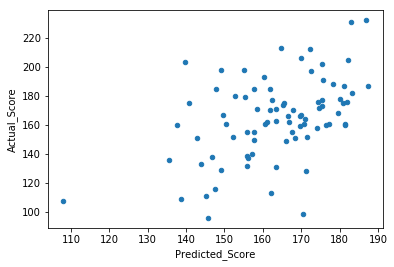

In [121]:
a.plot(x='Predicted_Score', y ='Actual_Score', kind='scatter')

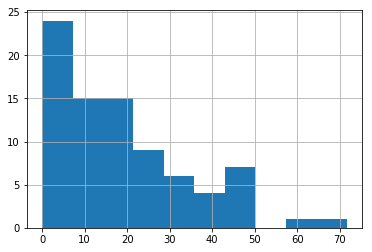

In [122]:
a['Diff'].hist()

In [123]:
a1=dftest.join(a)
a1[['Match_City','Match_Teams', 'Match_Year','Match_Number','Batting_Team','First_Innings','5_Over_Runs','5_Over_Wickets','Total_Runs','Predicted_Score','Diff']][a1['Diff']<1]

,Match_City,Match_Teams,Match_Year,Match_Number,Batting_Team,First_Innings,5_Over_Runs,5_Over_Wickets,Total_Runs,Predicted_Score,Diff
1281,Mohali,Kings XI Punjab-Delhi Capitals,2019,13,Delhi Capitals,0,39,1,152,152.140090,0.140090
1292,Hyderabad,Sunrisers Hyderabad-Mumbai Indians,2019,19,Mumbai Indians,1,28,2,136,135.601292,0.398708
1300,Chennai,Chennai Super Kings-Kolkata Knight Riders,2019,23,Kolkata Knight Riders,1,24,4,108,108.018412,0.018412
1305,Jaipur,Rajasthan Royals-Chennai Super Kings,2019,25,Chennai Super Kings,0,24,3,155,155.762786,0.762786
1308,Mumbai,Mumbai Indians-Rajasthan Royals,2019,27,Mumbai Indians,1,53,0,187,187.324829,0.324829
1326,Jaipur,Rajasthan Royals-Mumbai Indians,2019,36,Mumbai Indians,1,38,1,161,160.667174,0.332826
1327,Jaipur,Rajasthan Royals-Mumbai Indians,2019,36,Rajasthan Royals,0,48,1,162,161.153893,0.846107
1328,Delhi,Delhi Capitals-Kings XI Punjab,2019,37,Kings XI Punjab,1,46,2,163,163.471071,0.471071
1329,Delhi,Delhi Capitals-Kings XI Punjab,2019,37,Delhi Capitals,0,52,1,166,166.532247,0.532247


#### Checking Log Transformation

In [236]:

dftest=d5[d5['Match_Year']>2018]
dftrain=d5[d5['Match_Year']<2019]
drop_cols=['Match_City','Match_Teams', 'Match_Year','Total_Wickets','Batting_Team']
dftrain1=dftrain.drop(drop_cols,axis=1)
dftrain2=dftrain1[dftrain1['Toss_Won']!='No Info']
dftrain2.dropna(inplace=True)
dftest1=dftest.drop(drop_cols,axis=1)
dftest1.dropna(inplace=True)
X=dftrain2.drop(['Unnamed: 0','Total_Runs','Combined_Score','IPL_Match_Id', 'Prev_3_Run_Score_Rate','Prev_3_Run_Concede_Rate'],axis=1)#'Prev_2_Run_Score_Rate','Prev_2_Run_Concede_Rate'], axis=1)
X_test=dftest1.drop(['Unnamed: 0','Total_Runs','Combined_Score','IPL_Match_Id','Prev_3_Run_Score_Rate','Prev_3_Run_Concede_Rate'],axis=1)#,'Prev_2_Run_Score_Rate','Prev_2_Run_Concede_Rate'], axis=1)
dftrain2['Log_Total_Runs']= dftrain2['Total_Runs'].apply(lambda z:np.sqrt(z))
dftest1['Log_Total_Runs']= dftest1['Total_Runs'].apply(lambda z:np.sqrt(z))
y=dftrain2['Log_Total_Runs']
y_test=dftest1['Log_Total_Runs']
X['Toss_Won']=X['Toss_Won'].astype('int')
X_test['Toss_Won']=X_test['Toss_Won'].astype('int')
#### Train Model

m4=lgb.LGBMRegressor(**params, n_estimators = 1000, nthread = 4, n_jobs = -1)#225,#900,#850,1500 (9 records < 1) (33 records < 10)
m4.fit(X,y)
y_predlg=m4.predict(X_test)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Log_Score'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Log_Score'])
preddflg['Predicted_Score']=preddflg['Predicted_Log_Score'].apply(lambda a : a**2) #np.expm1(a))
actdflg['Actual_Score']=actdflg['Actual_Log_Score'].apply(lambda a : a**2)
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
len(a[a['Diff']<10])
#a['Diff'].mean()

c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


31

#### Modelling to be done on Total_Runs instead of taking log transformation or square root transformation

### Feature Importance

In [112]:
X1=X.reset_index()
y1=y.reset_index()
y_newvalues=y1['Total_Runs'].values
X_new=X1.drop(['index'],axis=1)
#X_new=X1.drop(['index','Dump_Month','runtime_category_short','runtime_category_usual'],axis=1)

X_newvalues=X_new.values
#X1, y1 contain index values

In [113]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_recall_curve

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[304]	valid_0's rmse: 16.6087	valid_1's rmse: 27.7455


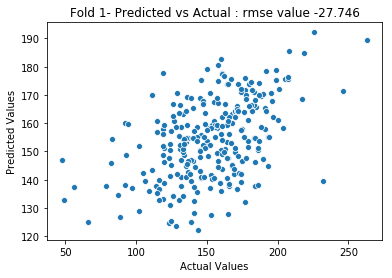

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[249]	valid_0's rmse: 17.701	valid_1's rmse: 26.8093


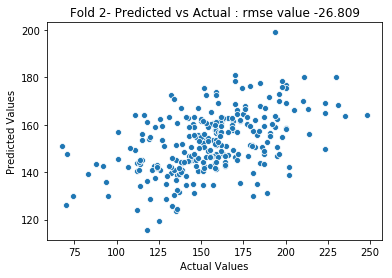

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[192]	valid_0's rmse: 19.6028	valid_1's rmse: 26.2233


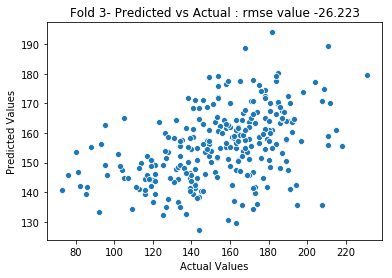

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[152]	valid_0's rmse: 20.8911	valid_1's rmse: 26.252


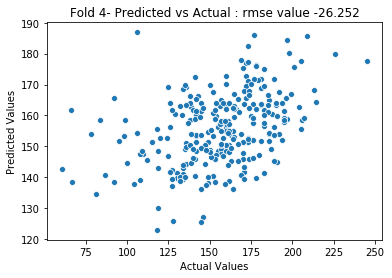

26.764615240575907


c:\users\ravi_\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


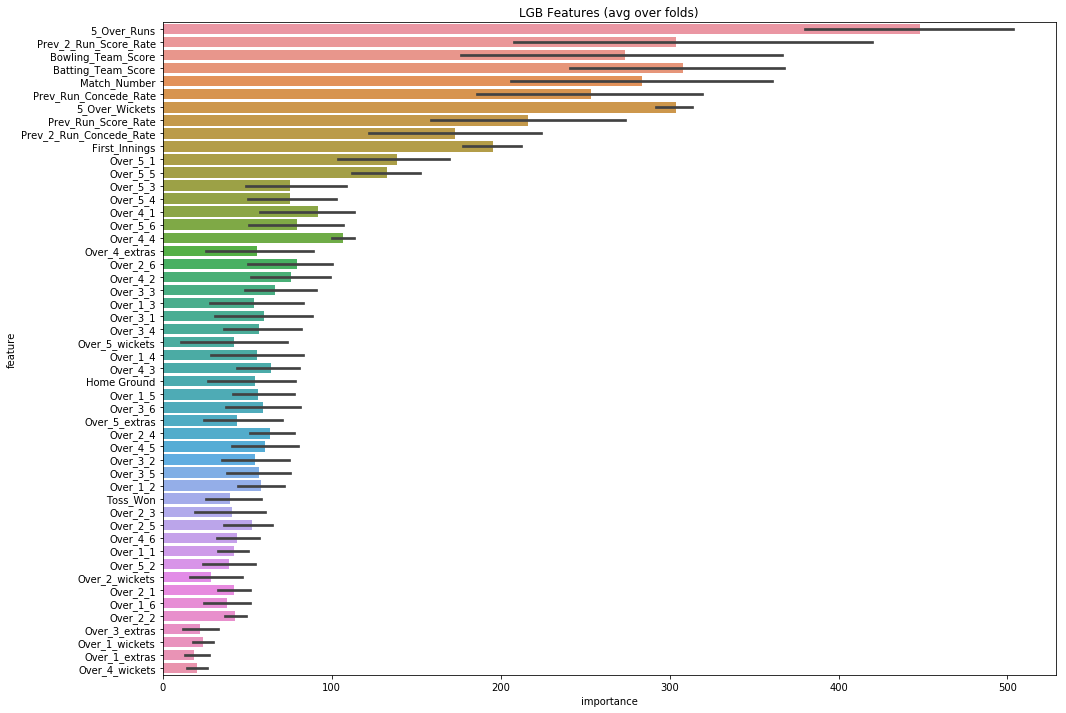

In [114]:
n_fold = 4
ax_list=[]
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
params = {'num_leaves': 30,#30
         'min_data_in_leaf': 5,#10
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,#0.01
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'r2',
         "lambda_l1": 0.1,
         "verbosity": -1}#, #0.2
         #"lambda_l1":0.01,#added
         #"max_bin":30}# added
        # "verbosity": -1}
#model1 = LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1 = lgb.LGBMRegressor(n_estimators = 1500, nthread = 4, n_jobs = -1)
validation_rmse=[]
test_rmse=[]
feature_importance = pd.DataFrame()

for fold_n, (train_index, valid_index) in enumerate(folds.split(X_newvalues)):#[:3000])):
    X1_train, X1_valid = X_newvalues[train_index], X_newvalues[valid_index]
    y1_train, y1_valid = y_newvalues[train_index],y_newvalues[valid_index]
    model1 = lgb.LGBMRegressor(**params, n_estimators = 1500, nthread = 4, n_jobs = -1)
    #model1 = LGBMRegressor()
    #model1 = LGBMRegressor(n_estimators = 20000, nthread = 4, n_jobs = -1)
    model1.fit(X1_train, y1_train, 
        eval_set=[(X1_train, y1_train), (X1_valid, y1_valid)], eval_metric='rmse',
        verbose=-1, early_stopping_rounds=500)
    y_pred_valid = model1.predict(X1_valid)
    ax = sns.scatterplot(x=y1_valid, y=y_pred_valid)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title('Fold ' + str(fold_n+1) +  '- Predicted vs Actual : rmse value -'+ str(round(np.sqrt(mean_squared_error(y1_valid,y_pred_valid)),3)))
    plt.show()

    #y_pred = model1.predict(X_newvalues[3000:], num_iteration=model1.best_iteration_)
    validation_rmse.append(mean_squared_error(y1_valid,y_pred_valid))
    #test_rmse.append(mean_squared_error(y_new[3000:],y_pred))
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = X_new.columns
    fold_importance["importance"] = model1.feature_importances_
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)


print(np.sqrt(np.mean(validation_rmse)))
#print(np.sqrt(np.mean(np.abs(test_rmse))))    
cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
plt.title('LGB Features (avg over folds)');

#### The below code reduces the training feature set to 10 columns ('5_Over_Runs', '5_Over_Wickets', 'First_Innings', 'Match_Number','Toss_Won', 'Home Ground', 'Prev_Run_Score_Rate','Prev_Run_Concede_Rate', 'Prev_2_Run_Score_Rate','Prev_2_Run_Concede_Rate')  to demonstrate usefulness of the above features


In [121]:
X_reduced=X.drop(['Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets',
       'Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6',
       'Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3',
       'Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets',
       'Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6',
       'Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3',
       'Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets','Batting_Team_Score',
       'Bowling_Team_Score'], axis=1)

X_test_reduced=X_test.drop(['Over_1_1', 'Over_1_2', 'Over_1_3','Over_1_4', 'Over_1_5', 'Over_1_6', 'Over_1_extras', 'Over_1_wickets',
       'Over_2_1', 'Over_2_2', 'Over_2_3', 'Over_2_4', 'Over_2_5', 'Over_2_6',
       'Over_2_extras', 'Over_2_wickets', 'Over_3_1', 'Over_3_2', 'Over_3_3',
       'Over_3_4', 'Over_3_5', 'Over_3_6', 'Over_3_extras', 'Over_3_wickets',
       'Over_4_1', 'Over_4_2', 'Over_4_3', 'Over_4_4', 'Over_4_5', 'Over_4_6',
       'Over_4_extras', 'Over_4_wickets', 'Over_5_1', 'Over_5_2', 'Over_5_3',
       'Over_5_4', 'Over_5_5', 'Over_5_6', 'Over_5_extras', 'Over_5_wickets','Batting_Team_Score',
       'Bowling_Team_Score'], axis=1)

In [122]:
X_reduced.columns

Index(['5_Over_Runs', '5_Over_Wickets', 'First_Innings', 'Match_Number',
       'Toss_Won', 'Home Ground', 'Prev_Run_Score_Rate',
       'Prev_Run_Concede_Rate', 'Prev_2_Run_Score_Rate',
       'Prev_2_Run_Concede_Rate', 'interaction'],
      dtype='object')

#### The above reduced set, results in 29 records less than 10 runs and 2 records less than 1 run. The root mean squared deviation observed is 20.11

In [123]:
m4=lgb.LGBMRegressor(**params, n_estimators = 1300, nthread = 4, n_jobs = -1)#225
#m4=LinearRegression()
#m4=rn #--> 24
#m4=rf # -->34
#m4=enet # --> 40
#m4=ls # --> 39
#m4=rdg # --> 38
#m4=dt # --> 18
m4.fit(X_reduced,y)
y_predlg=m4.predict(X_test_reduced)
preddflg=pd.DataFrame(data=y_predlg, index=X_test.index, columns=['Predicted_Score'])
actdflg=pd.DataFrame(data=y_test.values, index=X_test.index, columns=['Actual_Score'])
#preddflr['Predicted_Score']=preddflr['Predicted_log_Score'].apply(lambda a : np.expm1(a))
#actdflr['Actual_Score']=actdflr['Actual_log_Score'].apply(lambda a : np.expm1(a))
preactdflg=preddflg.join(actdflg)
preactdflg['Diff']=np.sqrt((preactdflg['Actual_Score']-preactdflg['Predicted_Score'])**2)
a=preactdflg[['Actual_Score','Predicted_Score','Diff']]
print(len(a[a['Diff']<10]))
print(len(a[a['Diff']<1]))
a['Diff'].mean()

28
5


19.261639733805215

#### Note ,if the columns are dropped and only a reduced set of columns considered - '5_Over_Runs', '5_Over_Wickets', 'First_Innings', 'Match_Number','Toss_Won', 'Home Ground', 'Prev_Run_Score_Rate','Prev_Run_Concede_Rate', 'Prev_2_Run_Score_Rate','Prev_2_Run_Concede_Rate'  - 2 number of records have devaition less than 1. 
With the total feature set, the number of predictions with deviation less than 1 increases to 9 (450% increase).
The root mean squared deviation falls to 18.39 from 20.11 (8.5% decrease)